# **Acetaminophen Attenuates Perception of Auditory Stimuli**
#### *Lindsay Warrenburg*
#### *3/32/20*
Previous research has shown that acetaminophen may make you less empathic to others and that acetaminophen can blunt your emotional responses to picture stimuli. Researchers have also found that participants who ingested acetaminophen made attenuated emotional judgments of pleasant and unpleasant pictures from the IAPS.

#### The goal of the current study was to test whether the emotional blunting effects of acetaminophen extend to the auditory and musical domains.
* **Subgoal 1:** Test whether there is a difference in attenuation among *natural sounds* (like waves or growls), *music*, and *speech*.
* **Subgoal 2:** Test whether acetaminophen blunts *perceived emotion* and *induced emotion* to different extents.



# **Background** 
### Design
We (Lindsay Warrenburg and Baldwin Way) used a randomized, double-blind, parallel-group, placebo-controlled design to test these hypotheses. The study consisted of two blocks of trial: one for perceived emotion and one for induced emotion. These blocks were counterbalanced across participants. During the drug uptake period, participants completed a number of questionnaires relating to their musical experience, current mood, personality traits, socio-economic status, height and weight, other drugs they may have taken, and so on.

***Perceived Emotion Block***

The goal of the perceived emotion block was to judge the extent to which a sound conveys a certain affect. For the natural sounds stimuli, we used clips from the International Affective Digital Sounds (IADS). For speech stimuli, we used the Crowd-Sourced Emotional Multimodal Actors Dataset (CREMA-D). And for music stimuli, I used excerpts from film soundtracks, curated by Eerola & Vuoskoski (2011).
* In order to assess the valence of the perceived emotion in the stimuli, we asked *“To what extent does this audio file sound positive?” and “To what extent does this audio file sound negative?’*
* In order to assess the arousal of the perceived emotion in the stimuli, we asked *“To what extent does this audio file sound energetic/arousing?”*
* All three questions utilized an 11-point Likert scale.
* We also asked participants to identify which emotions the audio file represents by checking the appropriate emotions from a list.
    * Participants could select as many or as few emotions as they liked. 
    * Once they chose the list of emotion terms, they were asked to choose which emotions (if any) strongly apply to the music. 
    * By asking participants to choose emotion terms that strongly apply, a three-level response gradient is available for analysis (i.e. does not apply, applies, strongly applies). 

***Induced Emotion Block***

In the section on induced emotion, the stimuli were taken from the same databases as before. The stimuli were different from the ones in the Perceived Emotion section. No speech samples were used because the database instructions explicitly state that they should be used only in studies regarding perceived emotion. Participants were asked 
* *“To what extent does this audio file make you feel a positive emotional reaction?”* (on an 11-point Likert scale)
* *“To what extent does this audio file make you feel a negative emotional reaction?”* (on an 11-point Likert scale)
* Once again, participants were asked to identify which emotions the audio file makes them feel by checking the appropriate emotions from a list. They were also asked to choose which emotions strongly apply.

### Participants
* 244 participants took part in the experiment. 
* A power analysis indicated that 200 participants are needed in order to show a reliable effect, if it is there. 

### Validation of Stimuli
* We tested the validity of the stimuli -- namely, whether a happy song tended to be perceived as happy, that angry speech was perceived as angry, etc. 
* Wefound that the stimuli all behaved as predicted. 

# **Executive Summary**
### Perceived Emotion
1. The results were consistent with the hypothesis that, **compared to a placebo, acetaminophen blunts people’s perception of positive and negative emotions in sound stimuli.** 
    For example, on average, those who took a placebo rated emotional sounds as representing positive emotions at an intensity of 3.99 (out of 10), whereas those who took acetaminophen rated an intensity of positive emotions of 3.58. 

2. There was **no difference in arousal ratings between drug and placebo conditions.**

*Chart showing the mean ratings of **perceived emotion** in the drug and placebo conditions*

|  | Positive Emotion Ratings | Negative Emotion Ratings | Arousal Ratings |
|------|------|------|------|
| Placebo | 3.94* | 3.86* | 4.40 |
| Acetaminophen | 3.60* | 3.65* | 4.33 |

### Induced Emotion
1. Unlike the findings in the study regarding picture stimuli, there was **no difference in the intensity of positive or negative emotions experienced by listeners in the drug and placebo conditions.**

*Chart showing the mean ratings of **induced emotion** in the drug and placebo conditions*

|  | Positive Emotion Ratings | Negative Emotion Ratings |
|------|------|------|
| Placebo | 3.74 | 3.56 |
| Acetaminophen | 3.64 | 3.64 |

# **Initialize Workspace**

In [1]:
# basic coding/ML tools
import numpy as np, pandas as pd, os, sys, scipy, xlrd, urllib, pandas_profiling, itertools, re, warnings
from jupyter_contrib_nbextensions.application import main
from ipywidgets import interact
from pandas.api.types import CategoricalDtype
from scipy import stats
from scipy.stats import ttest_ind
from fancyimpute import KNN

# ML tools
import sklearn, statsmodels.api as sm, statsmodels.formula.api as smf, cvxopt
from xgboost import XGBRegressor, XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer, confusion_matrix, plot_confusion_matrix, classification_report, multilabel_confusion_matrix
from imblearn.over_sampling import SMOTE

# visualization tools
import matplotlib.pyplot as plt, qgrid, seaborn as sns, IPython.display
from IPython.display import Image, HTML
from plotnine import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)

# View tab (Taken from Martin: https://stackoverflow.com/users/2575273/martin)
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))
files = os.listdir(os.curdir)

# set directory
os.chdir("/Users/home/Desktop/Tylenol/Analysis")
print(os.getcwd())

# only get warnings once
warnings.filterwarnings(action='ignore')

Using TensorFlow backend.


/Users/home/Desktop/Tylenol/Analysis


# **Goal 1: Long Form Analysis**
The initial Qualtrics data was pre-processed in a separate R script. For this part of the analysis, we will build on those dataframes and perform the following tasks:
1. Examination of Missing Data
2. Checking for Duplicates
3. Adding High-Level Summary Features
4. Looking at Mean Differences between Drug and Placebo
    * Overall means
    * Stimulus type (music, natural sounds, and speech)
    * Emotion type (positive, negative, neutral)
    * Arousal and valence levels
    
**We will do this separately for *induced* emotion data and *perceived* emotion data**

## **1a. Induced Emotion Ratings**
Read in the data.

In [2]:
inducedLong = pd.read_csv('Fixed Induced.csv')
print("original inducedLong shape:", inducedLong.shape)
    # original inducedLong shape: (4806, 33)

View(inducedLong.head().T)

original inducedLong shape: (4806, 33)


### Missing Data
We will delete observations with no ID or without a drug/placebo indication. We cannot use these observations for analysis.

In [3]:
# examine
null = inducedLong[inducedLong.isnull().any(axis=1)]
print("null shape:", null.shape) # (4557, 33)
null.head(5).T

pd.DataFrame(inducedLong.isnull().sum())

# delete 'Other' column
inducedLong = inducedLong.drop(['Other'], axis=1)

# drop rows where there's no ID or drug/placebo information
inducedLong = inducedLong.dropna(subset=['FixedID', 'DrugCode', 'DrugPlacebo'], how='any')

print("new inducedLong shape:", inducedLong.shape)
View(pd.DataFrame(inducedLong.isnull().mean()*100))
    # new inducedLong shape: (4554, 32)

null shape: (4557, 33)
new inducedLong shape: (4554, 32)


### Check for Duplicates
Duplicates would indicate an error with the participant ID number fed into the surveys on Qualtrics. These would lead to biased data, so we get rid of them. 

In [4]:
# Check number of induced stimuli
print("Number of Induced Stimuli: ", len(inducedLong['Stimulus'].unique()), "\n")
    # Number of Induced Stimuli:  18

# Check max ID number
maxid = int(inducedLong['FixedID'].max())
    
# make dataframe checking the number of perceived/induced stimuli per person
participants = pd.DataFrame()
participants['Potential'] = pd.Series(range(1, maxid+1))
participants = participants.set_index('Potential')
participants['Induced'] = inducedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])

# where are the errors?
iError = list(participants[participants['Induced'] > len(inducedLong['Stimulus'].unique())].index)
print("induced errors in stimuli: ", iError, "\n")

View(inducedLong[inducedLong['FixedID'].isin(iError)])

# delete all IDs who are in error
    # it must be due to some kind of coding mistake or mistake with Qualtrics entries
drop = inducedLong[inducedLong['FixedID'].isin(iError)].index
inducedLong.drop(drop, inplace=True)

# check
print("fixed inducedLong shape:", inducedLong.shape, "\n")
    # fixed inducedLong shape: (4338, 32) 

participants['InducedFixed'] = inducedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
iErrorCheck = list(participants[participants['InducedFixed'] > len(inducedLong['Stimulus'].unique())].index)
print("induced errors in stimuli: ", iErrorCheck, "\n")
View(participants)

Number of Induced Stimuli:  18 

induced errors in stimuli:  [55, 91, 92, 117, 133, 172] 

fixed inducedLong shape: (4338, 32) 

induced errors in stimuli:  [] 



### Add summary columns
We want to differentiate blunting effects between ***Positive*** and ***Negative*** stimuli, across ***Music***, ***Speech***, and ***Natural Sounds***, and by ***Arousal and Valence* (Circumplex model from Russell et al., 1989)** scores.

We will add a new column to summarize each of these features based on emotional theory and *a priori* stimulus analysis.

In [5]:
# PosNeg: Positive or Negative Emotions
posneg = [
    (inducedLong['Stimulus'].str.contains('Negative|Sad|Fear', regex=True) == True),
    (inducedLong['Stimulus'].str.contains('Positive|Happy|Tender', regex=True) == True)]
choices = ['Negative', 'Positive']
inducedLong['PosNeg'] = np.select(posneg, choices, default='Neutral')

# SoundType: Music, Speech, Natural Sounds
sound = [
    (inducedLong['Stimulus'].str.contains('Music', regex=True) == True),
    (inducedLong['Stimulus'].str.contains('Speech', regex=True) == True)]
choices = ['Music', 'Speech']
inducedLong['SoundType'] = np.select(sound, choices, default='Natural Sounds')
    # note though: no speech in induced

# Russell: Circumplex model info
russell = [
    (inducedLong['Stimulus'].str.contains('Negative-Valence Low|Sad', regex=True) == True),
    (inducedLong['Stimulus'].str.contains('Negative-Valence High|Fear', regex=True) == True),
    (inducedLong['Stimulus'].str.contains('Positive-Valence Low|Tender', regex=True) == True),
    (inducedLong['Stimulus'].str.contains('Positive-Valence High|Happy', regex=True) == True)]
choices = ['Neg-Valence Low-Arousal', 'Neg-Valence High-Arousal', 'Pos-Valence Low-Arousal', 'Pos-Valence High-Arousal']
inducedLong['Russell'] = np.select(russell, choices, default='Neutral')

# Crosstabs
pd.crosstab(index = inducedLong['Stimulus'], columns = inducedLong['PosNeg'])
pd.crosstab(index = inducedLong['Stimulus'], columns = inducedLong['Russell'])
pd.crosstab(index = inducedLong['Stimulus'], columns = inducedLong['SoundType'])

SoundType                                Music  Natural Sounds
Stimulus                                                      
Fear Music 1                               241               0
Fear Music 2                               241               0
Happy Music 1                              241               0
Happy Music 2                              241               0
Negative-Valence High-Arousal Human          0             241
Negative-Valence High-Arousal Non-human      0             241
Negative-Valence Low-Arousal Human           0             241
Negative-Valence Low-Arousal Non-human       0             241
Neutral Human                                0             241
Neutral Non-human                            0             241
Positive-Valence High-Arousal Human          0             241
Positive-Valence High-Arousal Non-human      0             241
Positive-Valence Low-Arousal Human           0             241
Positive-Valence Low-Arousal Non-human       0             241
Sad Music 1                                241               0
Sad Music 2                                241               0
Tender Music 1                             241               0
Tender Music 2                             241               0

### Comparing Means Between Drug/Placebo
Now we can compare means in ***induced*** emotion ratings in drug and placebo conditions.

First, we prepare the data.

In [6]:
# Change values for easy interpretation
inducedLong['DrugPlacebo'].replace(0, "Placebo", inplace=True)
inducedLong['DrugPlacebo'].replace(1, "Drug", inplace=True)

# Make arrays for t-tests
placebo = inducedLong[inducedLong['DrugPlacebo']=="Placebo"]
drug = inducedLong[inducedLong['DrugPlacebo']=="Drug"]

inducedLong.sample(2)

FixedID DrugCode DrugPlacebo    Locus  \
2493     94.0      27E        Drug  Induced   
2093    225.0     27D2        Drug  Induced   

                                     Stimulus  Positive  Negative  \
2493  Negative-Valence High-Arousal Non-human       0.0       6.0   
2093                           Tender Music 2       9.0       0.0   

           Arousal  Familiarity  Anger  ...  Surprised  Sympathetic  Tender  \
2493  Not Measured          0.0      0  ...          1            0       0   
2093  Not Measured          2.0      0  ...          0            0       0   

      Transcendent  Tension  Wonder  Neutral    PosNeg       SoundType  \
2493             0        0       0        0  Negative  Natural Sounds   
2093             0        0       0        0  Positive           Music   

                       Russell  
2493  Neg-Valence High-Arousal  
2093   Pos-Valence Low-Arousal  

[2 rows x 35 columns]

#### *Overall Means*
We examine the overall mean scores for *positive emotion ratings* and *negative emotion ratings* for participants who took the drug vs. participants who took the placebo.

**We then compare the means using t-tests.**

In [7]:
# Positive Emotion Ratings
print("Induced Emotion Overall Means -- Positive")
print(inducedLong.groupby(['DrugPlacebo'])['Positive'].mean().round(2), "\n")
    # Induced Emotion Overall Means -- Positive
    # Drug       3.64
    # Placebo    3.72
t, p = ttest_ind(placebo.dropna()['Positive'], drug.dropna()['Positive'])
print("t = " + str(t.round(2)))
print("p = " + str(p.round(2)), "\n")
    # t = 0.74
    # p = 0.46 

# Negative Emotion Ratings
print("Induced Emotion Overall Means -- Negative")
print(inducedLong.groupby(['DrugPlacebo'])['Negative'].mean().round(2), "\n")
    # Induced Emotion Overall Means -- Negative
    # Drug       3.64
    # Placebo    3.56
t, p = ttest_ind(placebo.dropna()['Negative'], drug.dropna()['Negative'])
print("t = " + str(t.round(2)))
print("p = " + str(p.round(2)), "\n")
    # t = -0.78
    # p = 0.43 

Induced Emotion Overall Means -- Positive
DrugPlacebo
Drug       3.64
Placebo    3.72
Name: Positive, dtype: float64 

t = 0.74
p = 0.46 

Induced Emotion Overall Means -- Negative
DrugPlacebo
Drug       3.64
Placebo    3.56
Name: Negative, dtype: float64 

t = -0.78
p = 0.43 



#### **Conclusion: There is no difference in induced emotion ratings for positive emotions or negative emotions between drug and placebo conditions.**

#### *Stimulus Type (Music, Natural Sounds)*
Although there were no differences in the overall means between drug and placebo conditions, we will look at the mean induced emotion ratings across different stimulus types.

We will *not* conduct t-tests to prevent any potential problems of multiple tests.

In [8]:
# Positive Emotion Ratings
print("Induced Emotion Stimulus Type -- Positive")
print(inducedLong.groupby(['DrugPlacebo', 'SoundType'])['Positive'].mean().round(2), "\n")
    # Induced Emotion Stimulus Type -- Positive
    # DrugPlacebo  SoundType     
    # Drug         Music             4.72
    #              Natural Sounds    2.78
    # Placebo      Music             4.57
    #              Natural Sounds    3.04

# Negative Emotion Ratings
print("Induced Emotion Stimulus Type -- Negative")
print(inducedLong.groupby(['DrugPlacebo', 'SoundType'])['Negative'].mean().round(2))
    # Induced Emotion Stimulus Type -- Negative
    # DrugPlacebo  SoundType     
    # Drug         Music             3.14
    #              Natural Sounds    4.04
    # Placebo      Music             3.16
    #              Natural Sounds    3.89

Induced Emotion Stimulus Type -- Positive
DrugPlacebo  SoundType     
Drug         Music             4.72
             Natural Sounds    2.78
Placebo      Music             4.57
             Natural Sounds    3.04
Name: Positive, dtype: float64 

Induced Emotion Stimulus Type -- Negative
DrugPlacebo  SoundType     
Drug         Music             3.14
             Natural Sounds    4.04
Placebo      Music             3.16
             Natural Sounds    3.89
Name: Negative, dtype: float64


#### *Emotion Type (Positive, Negative, Neutral)*
Next, we will look at the induced emotion ratings for positive stimuli, negative stimuli, and netural stimuli in both drug and placebo conditions.

In [9]:
# Positive Emotion Ratings
print("Induced Emotion Emotion Type -- Positive")
print(inducedLong.groupby(['DrugPlacebo', 'PosNeg'])['Positive'].mean().round(2), "\n")
    # Induced Emotion Emotion Type -- Positive
    # DrugPlacebo  PosNeg  
    # Drug         Negative    1.65
    #              Neutral     1.29
    #              Positive    6.22
    # Placebo      Negative    1.76
    #              Neutral     1.52
    #              Positive    6.23

# Negative Emotion Ratings
print("Induced Emotion Emotion Type -- Negative")
print(inducedLong.groupby(['DrugPlacebo', 'PosNeg'])['Negative'].mean().round(2))
    # Induced Emotion Emotion Type -- Negative
    # DrugPlacebo  PosNeg  
    # Drug         Negative    5.88
    #              Neutral     3.85
    #              Positive    1.35
    # Placebo      Negative    5.78
    #              Neutral     3.60
    #              Positive    1.33

Induced Emotion Emotion Type -- Positive
DrugPlacebo  PosNeg  
Drug         Negative    1.65
             Neutral     1.29
             Positive    6.22
Placebo      Negative    1.76
             Neutral     1.52
             Positive    6.23
Name: Positive, dtype: float64 

Induced Emotion Emotion Type -- Negative
DrugPlacebo  PosNeg  
Drug         Negative    5.88
             Neutral     3.85
             Positive    1.35
Placebo      Negative    5.78
             Neutral     3.60
             Positive    1.33
Name: Negative, dtype: float64


#### *Circumplex Type (Arousal and Valence Info)*
Finally, we'll look at induced emotion ratings for different types of emotional stimuli:
* Negative Valence, High Arousal
* Negative Valence, Low Arousal
* Neutral
* Positive Valence, Low Arousal
* Positive Valence, High Arousal

In [10]:
# Positive Emotion Ratings
print("Induced Emotion Circumplex -- Positive")
print(inducedLong.groupby(['DrugPlacebo', 'Russell'])['Positive'].mean().round(2), "\n")
    # Induced Emotion Circumplex -- Positive
    # DrugPlacebo  Russell                 
    # Drug         Neg-Valence High-Arousal    1.43
    #              Neg-Valence Low-Arousal     1.86
    #              Neutral                     1.29
    #              Pos-Valence High-Arousal    6.84
    #              Pos-Valence Low-Arousal     5.60
    # Placebo      Neg-Valence High-Arousal    1.56
    #              Neg-Valence Low-Arousal     1.97
    #              Neutral                     1.52
    #              Pos-Valence High-Arousal    6.90
    #              Pos-Valence Low-Arousal     5.56

# Negative Emotion Ratings
print("Induced Emotion Circumplex -- Negative")    
print(inducedLong.groupby(['DrugPlacebo', 'Russell'])['Negative'].mean().round(2))
    # Induced Emotion Circumplex -- Negative
    # DrugPlacebo  Russell                 
    # Drug         Neg-Valence High-Arousal    6.41
    #              Neg-Valence Low-Arousal     5.36
    #              Neutral                     3.85
    #              Pos-Valence High-Arousal    1.05
    #              Pos-Valence Low-Arousal     1.66
    # Placebo      Neg-Valence High-Arousal    6.27
    #              Neg-Valence Low-Arousal     5.30
    #              Neutral                     3.60
    #              Pos-Valence High-Arousal    0.99
    #              Pos-Valence Low-Arousal     1.67

Induced Emotion Circumplex -- Positive
DrugPlacebo  Russell                 
Drug         Neg-Valence High-Arousal    1.43
             Neg-Valence Low-Arousal     1.86
             Neutral                     1.29
             Pos-Valence High-Arousal    6.84
             Pos-Valence Low-Arousal     5.60
Placebo      Neg-Valence High-Arousal    1.56
             Neg-Valence Low-Arousal     1.97
             Neutral                     1.52
             Pos-Valence High-Arousal    6.90
             Pos-Valence Low-Arousal     5.56
Name: Positive, dtype: float64 

Induced Emotion Circumplex -- Negative
DrugPlacebo  Russell                 
Drug         Neg-Valence High-Arousal    6.41
             Neg-Valence Low-Arousal     5.36
             Neutral                     3.85
             Pos-Valence High-Arousal    1.05
             Pos-Valence Low-Arousal     1.66
Placebo      Neg-Valence High-Arousal    6.27
             Neg-Valence Low-Arousal     5.30
             Neutral           

### Summary
**There did not seem to be any significant differences in *induced* emotion ratings in drug vs. placebo conditions.**

Before examining *perceived* emotions, we'll clean up the data and look at the pandas Profile Report.

In [11]:
# change columns back
inducedLong['DrugPlacebo'].replace("Placebo", 0, inplace=True)
inducedLong['DrugPlacebo'].replace("Drug", 1, inplace=True)

# summarize
# pandas_profiling.ProfileReport(inducedLong)
inducedLong.head(2)

FixedID DrugCode  DrugPlacebo    Locus      Stimulus  Positive  Negative  \
5      7.0       7J            0  Induced  Fear Music 1       8.0       0.0   
6      9.0       9J            0  Induced  Fear Music 1       4.0       6.0   

        Arousal  Familiarity  Anger  ...  Surprised  Sympathetic  Tender  \
5  Not Measured          1.0      0  ...          1            0       0   
6  Not Measured          1.0      0  ...          0            0       0   

   Transcendent  Tension  Wonder  Neutral    PosNeg  SoundType  \
5             0        2       2        0  Negative      Music   
6             0        0       0        0  Negative      Music   

                    Russell  
5  Neg-Valence High-Arousal  
6  Neg-Valence High-Arousal  

[2 rows x 35 columns]

## **1b. Perceived Emotion Ratings**
Read in the data.

In [12]:
perceivedLong = pd.read_csv('Fixed Perceived.csv')
print("original perceivedLong shape:", perceivedLong.shape)
    # original perceivedLong shape: (9842, 33)
    
View(perceivedLong.head().T)

original perceivedLong shape: (9842, 33)


### Missing Data
We will delete observations with no ID or without a drug/placebo indication. We cannot use these observations for analysis.

In [13]:
# examine
null = perceivedLong[perceivedLong.isnull().any(axis=1)]
print("null shape:", null.shape) 
    # (9287, 33)
# null.head(5).T

pd.DataFrame(perceivedLong.isnull().sum())

# delete 'Other' column
perceivedLong = perceivedLong.drop(['Other'], axis=1)

# drop rows where there's no ID or drug/placebo information
perceivedLong = perceivedLong.dropna(subset=['FixedID', 'DrugCode', 'DrugPlacebo'], how='any')

print("new perceivedLong shape:", perceivedLong.shape)
View(pd.DataFrame(perceivedLong.isnull().mean()*100))
    # new perceivedLong shape: (9250, 32)

null shape: (9287, 33)
new perceivedLong shape: (9250, 32)


### Check for Duplicates
Duplicates would indicate an error with the participant ID number fed into the surveys on Qualtrics. These would lead to biased data, so we get rid of them. 

In [14]:
# Check number of perceived stimuli
print("Number of Perceived Stimuli: ", len(perceivedLong['Stimulus'].unique()), "\n")
    # Number of Perceived Stimuli:  37

# Check max ID number
maxid = int(perceivedLong['FixedID'].max())
    
# make dataframe checking the number of perceived/induced stimuli per person
participants = pd.DataFrame()
participants['Potential'] = pd.Series(range(1, maxid+1))
participants = participants.set_index('Potential')
participants['Perceived'] = perceivedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])

# where are the errors?
pError = list(participants[participants['Perceived'] > len(perceivedLong['Stimulus'].unique())].index)
print("perceived errors in stimuli: ", pError, "\n")

View(perceivedLong[perceivedLong['FixedID'].isin(pError)])

# delete all IDs who are in error
    # it must be due to some kind of coding mistake or mistake with Qualtrics entries
drop = perceivedLong[perceivedLong['FixedID'].isin(pError)].index
perceivedLong.drop(drop, inplace=True)

# check
print("fixed perceivedLong shape:", perceivedLong.shape, "\n")
    # fixed perceivedLong shape: (8880, 32)

participants['PerceivedFixed'] = perceivedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
pErrorCheck = list(participants[participants['PerceivedFixed'] > len(perceivedLong['Stimulus'].unique())].index)
print("perceived errors in stimuli: ", pErrorCheck)
View(participants)

Number of Perceived Stimuli:  37 

perceived errors in stimuli:  [55, 91, 92, 117, 275] 

fixed perceivedLong shape: (8880, 32) 

perceived errors in stimuli:  []


### Add summary columns
We want to differentiate blunting effects between ***Positive*** and ***Negative*** stimuli, across ***Music***, ***Speech***, and ***Natural Sounds***, and by ***Arousal and Valence*** scores.

We will add a new column to summarize each of these features based on emotional theory and *a priori* stimulus analysis.

In [15]:
# PosNeg: Positive or Negative Emotions
posneg = [
    (perceivedLong['Stimulus'].str.contains('Negative|Sad|Fear', regex=True) == True),
    (perceivedLong['Stimulus'].str.contains('Positive|Happy|Tender', regex=True) == True)]
choices = ['Negative', 'Positive']
perceivedLong['PosNeg'] = np.select(posneg, choices, default='Neutral')

# SoundType: Music, Speech, Natural Sounds
sound = [
    (perceivedLong['Stimulus'].str.contains('Music', regex=True) == True),
    (perceivedLong['Stimulus'].str.contains('Speech', regex=True) == True)]
choices = ['Music', 'Speech']
perceivedLong['SoundType'] = np.select(sound, choices, default='Natural Sounds')

# Russell: Circumplex model info
russell = [
    (perceivedLong['Stimulus'].str.contains('Negative-Valence Low|Sad', regex=True) == True),
    (perceivedLong['Stimulus'].str.contains('Negative-Valence High|Fear', regex=True) == True),
    (perceivedLong['Stimulus'].str.contains('Positive-Valence Low|Tender', regex=True) == True),
    (perceivedLong['Stimulus'].str.contains('Positive-Valence High|Happy', regex=True) == True)]
choices = ['Neg-Valence Low-Arousal', 'Neg-Valence High-Arousal', 'Pos-Valence Low-Arousal', 'Pos-Valence High-Arousal']
perceivedLong['Russell'] = np.select(russell, choices, default='Neutral')

# Crosstabs
pd.crosstab(index = perceivedLong['Stimulus'], columns = perceivedLong['PosNeg'])
pd.crosstab(index = perceivedLong['Stimulus'], columns = perceivedLong['Russell'])
pd.crosstab(index = perceivedLong['Stimulus'], columns = perceivedLong['SoundType'])

SoundType                                Music  Natural Sounds  Speech
Stimulus                                                              
Fear Music 1                               240               0       0
Fear Music 2                               240               0       0
Fear Music 3                               240               0       0
Fear Speech 1                                0               0     240
Fear Speech 2                                0               0     240
Fear Speech 3                                0               0     240
Happy Music 1                              240               0       0
Happy Music 2                              240               0       0
Happy Music 3                              240               0       0
Happy Speech 1                               0               0     240
Happy Speech 2                               0               0     240
Happy Speech 3                               0               0     240
Negative-Valence High-Arousal Human          0             240       0
Negative-Valence High-Arousal Non-human      0             240       0
Negative-Valence Low-Arousal Human           0             240       0
Negative-Valence Low-Arousal Non-human       0             240       0
Neutral Human                                0             240       0
Neutral Non-human                            0             240       0
Neutral Speech 1                             0               0     240
Neutral Speech 2                             0               0     240
Neutral Speech 3                             0               0     240
Positive-Valence High-Arousal Human          0             240       0
Positive-Valence High-Arousal Non-human      0             240       0
Positive-Valence Low-Arousal Human           0             240       0
Positive-Valence Low-Arousal Non-human       0             240       0
Sad Music 1                                240               0       0
Sad Music 2                                240               0       0
Sad Music 3                                240               0       0
Sad Speech 1                                 0               0     240
Sad Speech 2                                 0               0     240
Sad Speech 3                                 0               0     240
Tender Music 1                             240               0       0
Tender Music 2                             240               0       0
Tender Music 3                             240               0       0
Tender Music 4                             240               0       0
Tender Music 5                             240               0       0
Tender Music 6                             240               0       0

### Comparing Means Between Drug/Placebo
Now we can compare means in ***perceived*** emotion ratings in drug and placebo conditions.

We prep the data like we did above.

In [16]:
# Change values for easy interpretation
perceivedLong['DrugPlacebo'].replace(0, "Placebo", inplace=True)
perceivedLong['DrugPlacebo'].replace(1, "Drug", inplace=True)

# Make arrays for t-tests
placebo = perceivedLong[perceivedLong['DrugPlacebo']=="Placebo"]
drug = perceivedLong[perceivedLong['DrugPlacebo']=="Drug"]

perceivedLong.sample(2)

FixedID DrugCode DrugPlacebo      Locus        Stimulus  Positive  \
4058     69.0       2E     Placebo  Perceived   Fear Speech 1       0.0   
4979    192.0     25K2        Drug  Perceived  Happy Speech 1      10.0   

      Negative  Arousal  Familiarity  Anger  ... Surprised   Sympathetic  \
4058      10.0     10.0          0.0      0  ...         1  Not Measured   
4979       0.0     10.0          0.0      0  ...         0  Not Measured   

      Tender  Transcendent       Tension        Wonder  Neutral    PosNeg  \
4058       0  Not Measured  Not Measured  Not Measured        0  Negative   
4979       0  Not Measured  Not Measured  Not Measured        0  Positive   

     SoundType                   Russell  
4058    Speech  Neg-Valence High-Arousal  
4979    Speech  Pos-Valence High-Arousal  

[2 rows x 35 columns]

#### *Overall Means*
We examine the overall mean scores for *positive emotion ratings*, *negative emotion ratings*, and *arousal ratings* for participants who took the drug vs. participants who took the placebo.

**We then compare the means using t-tests.**

In [17]:
# Positive Emotion Ratings
print("Perceived Emotion Overall Means -- Positive")
print(perceivedLong.groupby(['DrugPlacebo'])['Positive'].mean().round(2), "\n")
    # Perceived Emotion Overall Means -- Positive
    # Drug       3.60
    # Placebo    3.94
t, p = ttest_ind(placebo.dropna()['Positive'], drug.dropna()['Positive'])
print("t = " + str(t.round(2)))
print("p = " + str(p.round(2)), "\n")
    # t = 4.33
    # p = 0.0 
    
# Negative Emotion Ratings
print("Perceived Emotion Overall Means -- Negative")
print(perceivedLong.groupby(['DrugPlacebo'])['Negative'].mean().round(2), "\n")
    # Perceived Emotion Overall Means -- Negative
    # Drug       3.65
    # Placebo    3.86
t, p = ttest_ind(placebo.dropna()['Negative'], drug.dropna()['Negative'])
print("t = " + str(t.round(2)))
print("p = " + str(p.round(2)), "\n")
    # t = 2.85
    # p = 0.0 

# Arousal Ratings
print("Perceived Emotion Overall Means -- Arousal")
print(perceivedLong.groupby(['DrugPlacebo'])['Arousal'].mean().round(2), "\n")
    # Perceived Emotion Overall Means -- Arousal
    # Drug       4.33
    # Placebo    4.40
t, p = ttest_ind(placebo.dropna()['Arousal'], drug.dropna()['Arousal'])
print("t = " + str(t.round(2)))
print("p = " + str(p.round(2)), "\n")
    # t = 1.06
    # p = 0.29 

Perceived Emotion Overall Means -- Positive
DrugPlacebo
Drug       3.60
Placebo    3.94
Name: Positive, dtype: float64 

t = 4.33
p = 0.0 

Perceived Emotion Overall Means -- Negative
DrugPlacebo
Drug       3.65
Placebo    3.86
Name: Negative, dtype: float64 

t = 2.85
p = 0.0 

Perceived Emotion Overall Means -- Arousal
DrugPlacebo
Drug       4.33
Placebo    4.40
Name: Arousal, dtype: float64 

t = 1.06
p = 0.29 



#### ***Conclusion:***
#### **The results are consistent with the hypothesis that, compared to a placebo, acetaminophen blunts people’s perception of positive and negative emotions in sound stimuli (both *p*s < 0.05)** 

* On average, those who took a placebo rated emotional sounds as representing *positive* emotions at an intensity of 3.94 (on a 0-10 scale), whereas those who took acetaminophen rated an intensity of positive emotions of 3.60. 
* Those who took a placebo rated emotional sounds as representing *negative* emotions at an intensity of 3.86 (on a 0-10 scale), whereas those who took acetaminophen rated an intensity of positive emotions of 3.65.

#### **The results are *not* consistent with the hypothesis that, compared to a placebo, acetaminophen blunts people’s perception of arousal in sound stimuli.**


#### *Stimulus Type (Music, Speech, Natural Sounds)*
We can examine to see whether the blunting effect of acetaminophen on perceived emotions is similar across different stimulus types.

We will *not* conduct t-tests on this data in order to prevent any potential problems of multiple tests.

In [18]:
# Positive Emotion Ratings
print("Perceived Emotion Stimulus Type -- Positive")
print(perceivedLong.groupby(['DrugPlacebo', 'SoundType'])['Positive'].mean().round(2), "\n")
    # Perceived Emotion Stimulus Type -- Positive
    # DrugPlacebo  SoundType     
    # Drug         Music             4.61
    #              Natural Sounds    3.44
    #              Speech            2.47
    # Placebo      Music             4.95
    #              Natural Sounds    3.65
    #              Speech            2.90

# Negative Emotion Ratings
print("Perceived Emotion Stimulus Type -- Negative")
print(perceivedLong.groupby(['DrugPlacebo', 'SoundType'])['Negative'].mean().round(2), "\n")
    # Perceived Emotion Stimulus Type -- Negative
    # DrugPlacebo  SoundType     
    # Drug         Music             3.18
    #              Natural Sounds    3.73
    #              Speech            4.17
    # Placebo      Music             3.39
    #              Natural Sounds    3.93
    #              Speech            4.41
    
# Arousal Ratings
print("Perceived Emotion Stimulus Type -- Arousal")
print(perceivedLong.groupby(['DrugPlacebo', 'SoundType'])['Arousal'].mean().round(2))
    # Perceived Emotion Stimulus Type -- Arousal
    # DrugPlacebo  SoundType     
    # Drug         Music             4.79
    #              Natural Sounds    4.65
    #              Speech            3.48
    # Placebo      Music             4.92
    #              Natural Sounds    4.69
    #              Speech            3.52

Perceived Emotion Stimulus Type -- Positive
DrugPlacebo  SoundType     
Drug         Music             4.61
             Natural Sounds    3.44
             Speech            2.47
Placebo      Music             4.95
             Natural Sounds    3.65
             Speech            2.90
Name: Positive, dtype: float64 

Perceived Emotion Stimulus Type -- Negative
DrugPlacebo  SoundType     
Drug         Music             3.18
             Natural Sounds    3.73
             Speech            4.17
Placebo      Music             3.39
             Natural Sounds    3.93
             Speech            4.41
Name: Negative, dtype: float64 

Perceived Emotion Stimulus Type -- Arousal
DrugPlacebo  SoundType     
Drug         Music             4.79
             Natural Sounds    4.65
             Speech            3.48
Placebo      Music             4.92
             Natural Sounds    4.69
             Speech            3.52
Name: Arousal, dtype: float64


#### *Graph Stimulus Type:* **Positive**
A graph will help showcase the attentuating effect of acetaminophen on perceived positive emotions.

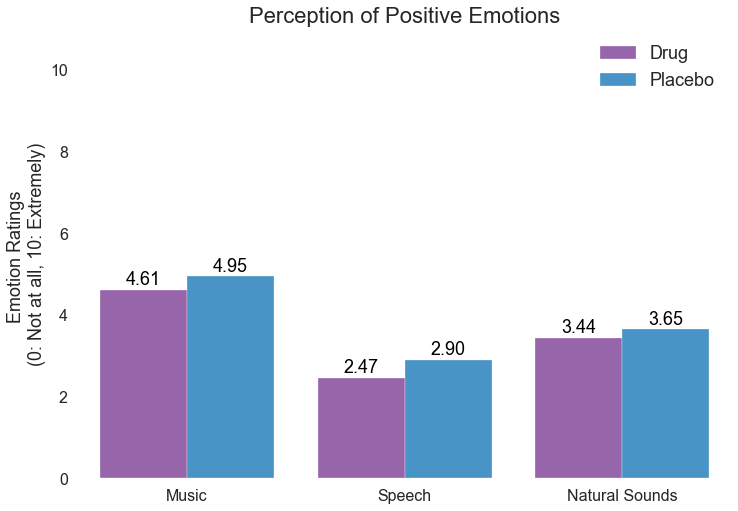

In [19]:
# dimensions
colors = ["#9b59b6", "#3498db"]
dimensions = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensions)

# plot
ax = sns.barplot(x="SoundType", y="Positive", hue="DrugPlacebo", data=perceivedLong, 
                 palette=colors, ci = None)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('')
plt.ylabel('Emotion Ratings \n(0: Not at all, 10: Extremely)', fontsize = 18)
plt.ylim(0,11)
plt.title('Perception of Positive Emotions', size = 22)
plt.legend(prop={'size': 18})

# annotate
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=18, color='black', xytext=(0, 10),
                textcoords='offset points')

**The above graph shows that acetaminophen attenuated the perception of positive emotion similarly in music, natural sounds, and speech stimuli.**

#### *Graph Stimulus Type:* **Negative**
Now we can look at the attentuating effect of acetaminophen on perceived negative emotions.

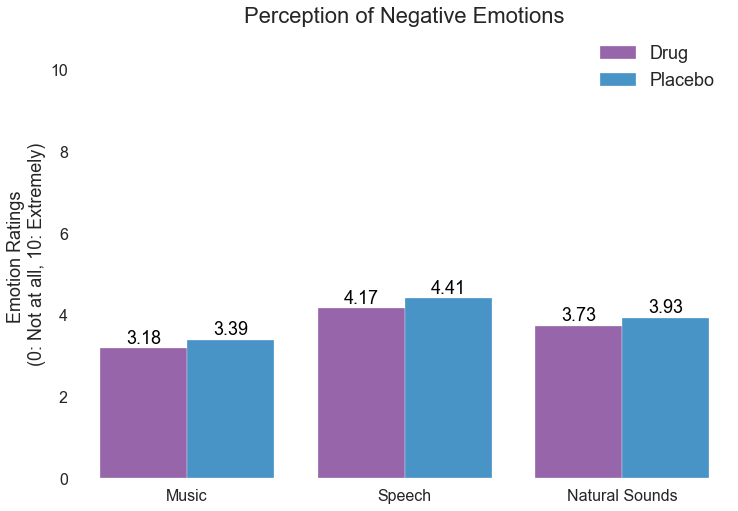

In [20]:
# dimensions
colors = ["#9b59b6", "#3498db"]
dimensions = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensions)

# plot
ax = sns.barplot(x="SoundType", y="Negative", hue="DrugPlacebo", data=perceivedLong, 
                 palette=colors, ci = None)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('')
plt.ylabel('Emotion Ratings \n(0: Not at all, 10: Extremely)', fontsize = 18)
plt.ylim(0,11)
plt.title('Perception of Negative Emotions', size = 22)
plt.legend(prop={'size': 18})

# annotate
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=18, color='black', xytext=(0, 10),
                textcoords='offset points')

**The graph shows that acetaminophen also attenuated the perception of negative emotion similarly in music, natural sounds, and speech stimuli.**

**Comparing this graph to the graph above on positive emotions, we can see that the blunting effect of acetaminophen was similar across ratings of positive and negative emotions.**

#### *Emotion Type (Positive, Negative, Neutral)*
Now we check whether acetaminophen blunts perceived emotion ratings for positive stimuli, negative stimuli, and netural stimuli.

In [21]:
# Positive Emotion Ratings
print("Perceived Emotion Emotion Type -- Positive")
print(perceivedLong.groupby(['DrugPlacebo', 'PosNeg'])['Positive'].mean().round(2), "\n")
    # Perceived Emotion Emotion Type -- Positive
    # DrugPlacebo  PosNeg  
    # Drug         Negative    1.35
    #              Neutral     1.87
    #              Positive    6.36
    # Placebo      Negative    1.65
    #              Neutral     2.33
    #              Positive    6.72
        
# Negative Emotion Ratings
print("Perceived Emotion Emotion Type -- Negative")
print(perceivedLong.groupby(['DrugPlacebo', 'PosNeg'])['Negative'].mean().round(2), "\n")
    # Perceived Emotion Emotion Type -- Negative
    # DrugPlacebo  PosNeg  
    # Drug         Negative    6.23
    #              Neutral     2.68
    #              Positive    1.40
    # Placebo      Negative    6.44
    #              Neutral     3.03
    #              Positive    1.55
        
# Arousal Ratings
print("Perceived Emotion Emotion Type -- Arousal")
print(perceivedLong.groupby(['DrugPlacebo', 'PosNeg'])['Arousal'].mean().round(2))
    # Perceived Emotion Emotion Type -- Arousal
    # DrugPlacebo  PosNeg  
    # Drug         Negative    4.40
    #              Neutral     1.72
    #              Positive    5.07
    # Placebo      Negative    4.39
    #              Neutral     1.76
    #              Positive    5.23

Perceived Emotion Emotion Type -- Positive
DrugPlacebo  PosNeg  
Drug         Negative    1.35
             Neutral     1.87
             Positive    6.36
Placebo      Negative    1.65
             Neutral     2.33
             Positive    6.72
Name: Positive, dtype: float64 

Perceived Emotion Emotion Type -- Negative
DrugPlacebo  PosNeg  
Drug         Negative    6.23
             Neutral     2.68
             Positive    1.40
Placebo      Negative    6.44
             Neutral     3.03
             Positive    1.55
Name: Negative, dtype: float64 

Perceived Emotion Emotion Type -- Arousal
DrugPlacebo  PosNeg  
Drug         Negative    4.40
             Neutral     1.72
             Positive    5.07
Placebo      Negative    4.39
             Neutral     1.76
             Positive    5.23
Name: Arousal, dtype: float64


#### *Circumplex Type (Arousal and Valence Info)*
And finally, we can look to see whether the drug attenuation affects perceived emotion ratings for different types of emotional stimuli:
* Negative Valence, High Arousal
* Negative Valence, Low Arousal
* Neutral
* Positive Valence, Low Arousal
* Positive Valence, High Arousal


In [22]:
# Positive Emotion Ratings
print("Perceived Emotion Circumplex -- Positive")
print(perceivedLong.groupby(['DrugPlacebo', 'Russell'])['Positive'].mean().round(2), "\n")
    # Perceived Emotion Circumplex -- Positive
    # DrugPlacebo  Russell                 
    # Drug         Neg-Valence High-Arousal    1.08
    #              Neg-Valence Low-Arousal     1.61
    #              Neutral                     1.87
    #              Pos-Valence High-Arousal    7.19
    #              Pos-Valence Low-Arousal     5.55
    # Placebo      Neg-Valence High-Arousal    1.34
    #              Neg-Valence Low-Arousal     1.97
    #              Neutral                     2.33
    #              Pos-Valence High-Arousal    7.55
    #              Pos-Valence Low-Arousal     5.90

# Negative Emotion Ratings
print("Perceived Emotion Circumplex -- Negative")    
print(perceivedLong.groupby(['DrugPlacebo', 'Russell'])['Negative'].mean().round(2), "\n")
    # Perceived Emotion Circumplex -- Negative
    # DrugPlacebo  Russell                 
    # Drug         Neg-Valence High-Arousal    6.78
    #              Neg-Valence Low-Arousal     5.69
    #              Neutral                     2.68
    #              Pos-Valence High-Arousal    1.07
    #              Pos-Valence Low-Arousal     1.73
    # Placebo      Neg-Valence High-Arousal    6.93
    #              Neg-Valence Low-Arousal     5.94
    #              Neutral                     3.03
    #              Pos-Valence High-Arousal    1.20
    #              Pos-Valence Low-Arousal     1.89

# Arousal Ratings
print("Perceived Emotion Circumplex -- Arousal")        
print(perceivedLong.groupby(['DrugPlacebo', 'Russell'])['Arousal'].mean().round(2))
    # Perceived Emotion Circumplex -- Arousal
    # DrugPlacebo  Russell                 
    # Drug         Neg-Valence High-Arousal    5.54
    #              Neg-Valence Low-Arousal     3.25
    #              Neutral                     1.72
    #              Pos-Valence High-Arousal    6.68
    #              Pos-Valence Low-Arousal     3.47
    # Placebo      Neg-Valence High-Arousal    5.46
    #              Neg-Valence Low-Arousal     3.32
    #              Neutral                     1.76
    #              Pos-Valence High-Arousal    6.75
    #              Pos-Valence Low-Arousal     3.74

Perceived Emotion Circumplex -- Positive
DrugPlacebo  Russell                 
Drug         Neg-Valence High-Arousal    1.08
             Neg-Valence Low-Arousal     1.61
             Neutral                     1.87
             Pos-Valence High-Arousal    7.19
             Pos-Valence Low-Arousal     5.55
Placebo      Neg-Valence High-Arousal    1.34
             Neg-Valence Low-Arousal     1.97
             Neutral                     2.33
             Pos-Valence High-Arousal    7.55
             Pos-Valence Low-Arousal     5.90
Name: Positive, dtype: float64 

Perceived Emotion Circumplex -- Negative
DrugPlacebo  Russell                 
Drug         Neg-Valence High-Arousal    6.78
             Neg-Valence Low-Arousal     5.69
             Neutral                     2.68
             Pos-Valence High-Arousal    1.07
             Pos-Valence Low-Arousal     1.73
Placebo      Neg-Valence High-Arousal    6.93
             Neg-Valence Low-Arousal     5.94
             Neutral       

#### *Graph Circumplex:* **Positive**
Once again, a graph will help visualize this effect.

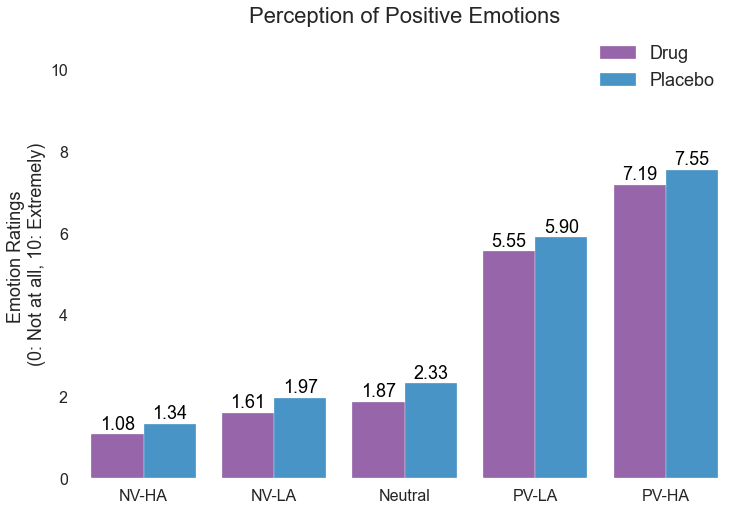

In [23]:
# change labels for easy interpretation
perceivedLong['Russell'].replace("Neg-Valence High-Arousal", "NV-HA", inplace=True)
perceivedLong['Russell'].replace("Pos-Valence High-Arousal", "PV-HA", inplace=True)
perceivedLong['Russell'].replace("Neg-Valence Low-Arousal", "NV-LA", inplace=True)
perceivedLong['Russell'].replace("Pos-Valence Low-Arousal", "PV-LA", inplace=True)

# dimensions
colors = ["#9b59b6", "#3498db"]
dimensions = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensions)

# plot
ax = sns.barplot(x="Russell", y="Positive", hue="DrugPlacebo", data=perceivedLong, 
                 palette=colors, ci = None, order = ['NV-HA', 'NV-LA', 'Neutral', 'PV-LA', 'PV-HA'])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('')
plt.ylabel('Emotion Ratings \n(0: Not at all, 10: Extremely)', fontsize = 18)
plt.ylim(0,11)
plt.title('Perception of Positive Emotions', size = 22)
plt.legend(prop={'size': 18})

# annotate
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=18, color='black', xytext=(0, 10),
                textcoords='offset points')

**Acetaminophen attenuated the perception of positive emotion similarly in stimuli classified as *negative valence-high arousal*, *negative valence-low arousal*, *neutral*, *positive valence-low arousal*, and *positive valence-high arousal*.**

#### *Graph Circumplex:* **Negative**
And our last graph.

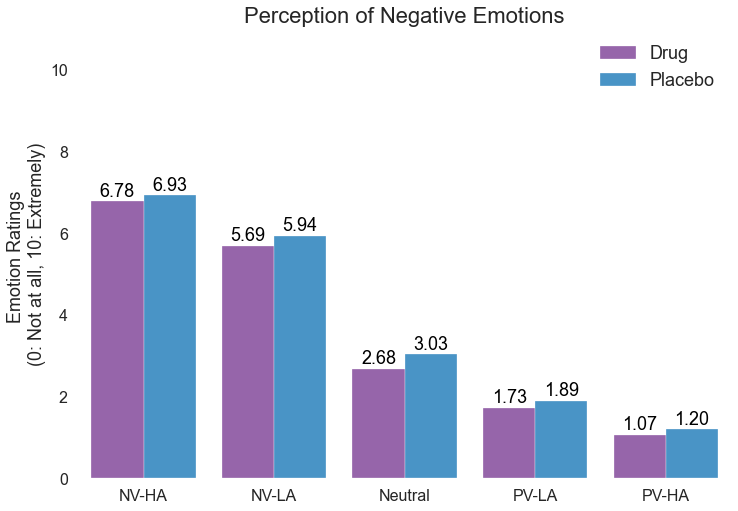

In [24]:
# dimensions
colors = ["#9b59b6", "#3498db"]
dimensions = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensions)

# plot
ax = sns.barplot(x="Russell", y="Negative", hue="DrugPlacebo", data=perceivedLong, 
                 palette=colors, ci = None, order = ['NV-HA', 'NV-LA', 'Neutral', 'PV-LA', 'PV-HA'])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('')
plt.ylabel('Emotion Ratings \n(0: Not at all, 10: Extremely)', fontsize = 18)
plt.ylim(0,11)
plt.title('Perception of Negative Emotions', size = 22)
plt.legend(prop={'size': 18})

# annotate
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=18, color='black', xytext=(0, 10),
                textcoords='offset points')

**The above graph shows, once again, that acetaminophen blunts the perception of negative emotion similarly in stimuli classified as *negative valence-high arousal*, *negative valence-low arousal*, *neutral*, *positive valence-low arousal*, and *positive valence-high arousal*.**

**Furthermore, the attenuating effect of acetaminophen was similar across ratings of positive and negative perceived emotions.**

### Summary
We will make some small changes with the dataframe for future use and summarize the findings with a pandas profile.


In [25]:
# change columns back
perceivedLong['DrugPlacebo'].replace("Placebo", 0, inplace=True)
perceivedLong['DrugPlacebo'].replace("Drug", 1, inplace=True)
perceivedLong['Russell'].replace("NV-HA", "Neg-Valence High-Arousal", inplace=True)
perceivedLong['Russell'].replace("PV-HA", "Pos-Valence High-Arousal", inplace=True)
perceivedLong['Russell'].replace("NV-LA", "Neg-Valence Low-Arousal", inplace=True)
perceivedLong['Russell'].replace("PV-LA", "Pos-Valence Low-Arousal", inplace=True)

# summarize
# pandas_profiling.ProfileReport(perceivedLong)
perceivedLong.head(2)

FixedID DrugCode  DrugPlacebo      Locus      Stimulus  Positive  Negative  \
8      8.0       8J            1  Perceived  Fear Music 1       NaN       NaN   
9      4.0       4J            1  Perceived  Fear Music 1       3.0       6.0   

   Arousal  Familiarity  Anger  ... Surprised   Sympathetic  Tender  \
8      NaN          NaN      0  ...         0  Not Measured       0   
9      9.0          0.0      0  ...         0  Not Measured       0   

   Transcendent       Tension        Wonder  Neutral    PosNeg SoundType  \
8  Not Measured  Not Measured  Not Measured        0  Negative     Music   
9  Not Measured  Not Measured  Not Measured        0  Negative     Music   

                    Russell  
8  Neg-Valence High-Arousal  
9  Neg-Valence High-Arousal  

[2 rows x 35 columns]

## **1c. Questionnaires**
We follow the same data prep steps for the questionnaires, but we won't test any differences in emotion ratings across demographic and psychographic conditions. We'll leave that to the regression analysis.

In [26]:
questionnaires = pd.read_csv('Fixed Questionnaires.csv')
print("original questionnaires shape:", questionnaires.shape)
    # original questionnaires shape: (262, 64)

View(questionnaires.head(2).T)

original questionnaires shape: (262, 64)


### Missing Data

In [27]:
# examine
null = pd.DataFrame(questionnaires.isnull().mean()*100)
View(null)

# drop rows where there's no ID or drug/placebo information
questionnaires = questionnaires.dropna(subset=['SubjectID', 'DrugCode', 'DrugPlacebo'], how='any')

print("new questionnaires shape:", questionnaires.shape, "\n")
null = pd.DataFrame(questionnaires.isnull().mean()*100)
View(null)
    # new questionnaires shape: (250, 64)
    
# look at columns with missing values
notnull = null[null[0] != 0]
print(len(notnull), "columns contain null values \n")
    # 59 columns contain null values 

# which columns have > 10% missing? drop them.
missing = null[null[0] >= 10]
delete = list(missing.index)
print("these columns have more than 10% of their values as null/missing:")
print(delete, "\n")
    # ['WhenLastExerciseHrs', 'MedsInfo', 'MarijuanaInSystem', 'CigarettesInSystem', 'OMSI']
    
questionnaires = questionnaires.drop(delete, axis=1)
print("final questionnaires shape:", questionnaires.shape)
    # final questionnaires shape: (250, 59)
View(pd.DataFrame(questionnaires.isnull().sum()))

new questionnaires shape: (250, 64) 

59 columns contain null values 

these columns have more than 10% of their values as null/missing:
['WhenLastExerciseHrs', 'MedsInfo', 'MarijuanaInSystem', 'CigarettesInSystem', 'OMSI'] 

final questionnaires shape: (250, 59)


### Check for duplicates

In [28]:
questionnaires = questionnaires.rename(columns={"SubjectID": "FixedID"})

# Check max ID number
maxid = int(questionnaires['FixedID'].max())
    
# make dataframe checking the number of people per questionnaire
participants = pd.DataFrame()
participants['Potential'] = pd.Series(range(1, maxid+1))
participants = participants.set_index('Potential')
participants['Questionnaire'] = questionnaires[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])

# where are the errors? there should only be one person per questionnaire
qError = list(participants[participants['Questionnaire'] > 1].index)
print("questionnaire errors in participants: ", qError, "\n")

View(questionnaires[questionnaires['FixedID'].isin(qError)])

# delete all IDs who are in error
    # it must be due to some kind mistake with the Qualtrics entries
drop = questionnaires[questionnaires['FixedID'].isin(qError)].index
questionnaires.drop(drop, inplace=True)

# check
print("fixed questionnaires shape:", questionnaires.shape, "\n")
    # fixed questionnaires shape: (240, 59)

participants['QuestionnaireFixed'] = questionnaires[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
qErrorCheck = list(participants[participants['QuestionnaireFixed'] > 1].index)
print("questionnaires errors in stimuli: ", qErrorCheck, "\n")
View(participants)

questionnaire errors in participants:  [91, 92, 117, 144, 193] 

fixed questionnaires shape: (240, 59) 

questionnaires errors in stimuli:  [] 



# **2. Imputation of Missing Values**
Before we can run a regression analysis, we need to perform some standard feature engineering, such as imputation of missing values, the creation of a single dataframe, and eliminating erroneous data.

In order to tell how we should impute the missing values with the least amount of bias, we need to plot the features that include missing data. The steps are as follows:
1. Find the columns that contain missing data
2. Look at the distributions of these columns
3. Impute using the appropriate method based on the distribution type of the data.

## **2a. Induced Emotion Ratings**
### Graph Features

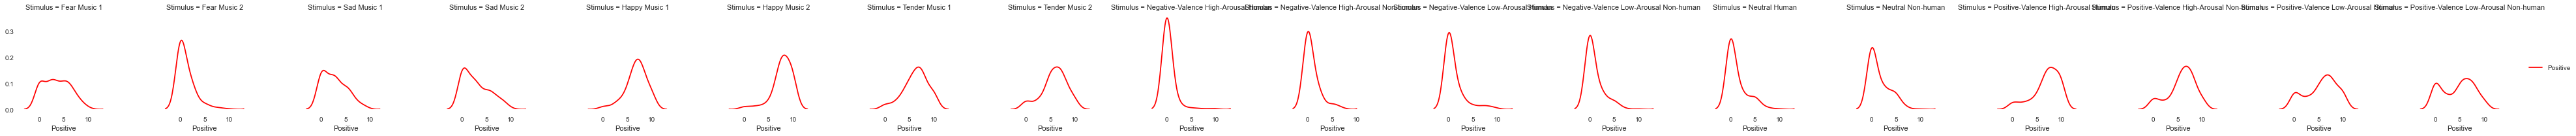

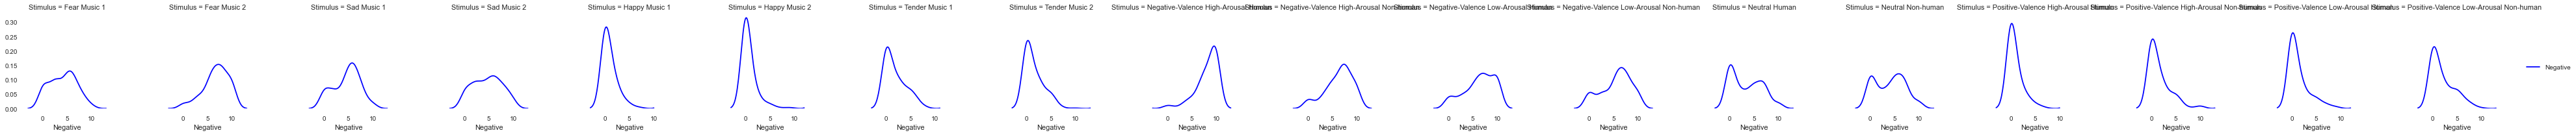

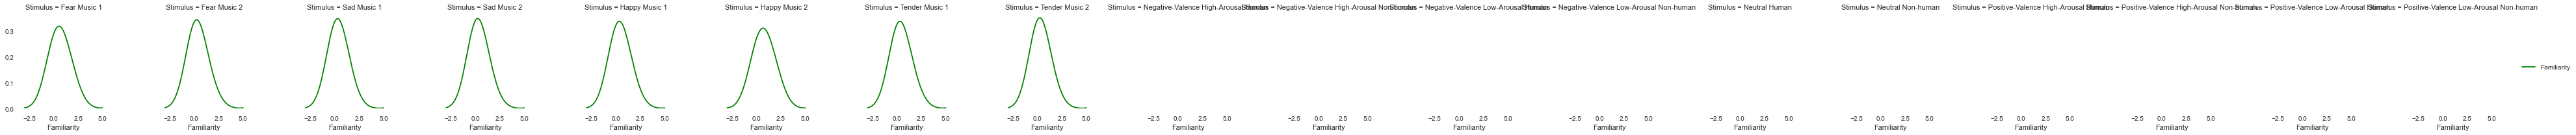

In [29]:
View(pd.DataFrame(inducedLong.isnull().sum()))

# there are only missing values are these three columns:
    # Positive	4.57%
    # Negative	4.57%
    # Familiarity	2.06%
    
# look at distributions to see if we should impute by mean or median
g = sns.FacetGrid(inducedLong, col="Stimulus")
g.map(sns.distplot, "Positive", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "red", label = "Positive")
g.add_legend();

g = sns.FacetGrid(inducedLong, col="Stimulus")
g.map(sns.distplot, "Negative", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "blue", label = "Negative")
g.add_legend();

g = sns.FacetGrid(inducedLong, col="Stimulus")
g.map(sns.distplot, "Familiarity", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "green", label = "Familiarity")
g.add_legend();

*(Note that it was an intentional choice of the researchers to avoid taking familiarity ratings for the natural sounds stimuli)*


**Because the data are skewed, it's best to use the median for imputation purposes.**

**We'll impute the values based on their closest neighbors--namely, we'll use the median rating of the feature for *each individual stimulus* to avoid bias.**

### Impute.

In [30]:
### impute missing values based on neighbors ###
# median is best for all three
View(inducedLong.groupby(['Stimulus'])['Positive', 'Negative', 'Familiarity'].median())

# impute missing values with median values for the same feature (e.g., Positive) 
# and stimulus (e.g., Fear Music 1)

colList = ['Positive', 'Negative', 'Familiarity']
for i, column in enumerate(colList):
    inducedLong[column] = inducedLong.groupby(["Stimulus"], sort = False)[column].apply(lambda x: x.fillna(x.median()))

# check and reset index
View(pd.DataFrame(inducedLong.isnull().mean()*100))
    # no more missing values

inducedLong.reset_index(inplace = True, drop = True) 

## **2b. Perceived Emotion Ratings**
We repeat the same process for the perceived emotion ratings.

### Graph Features

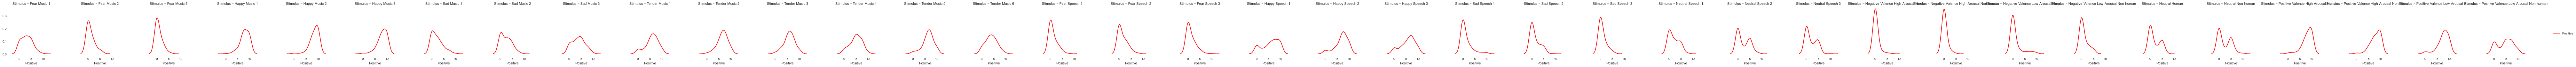

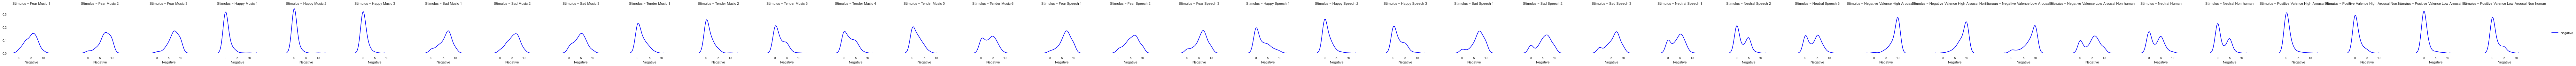

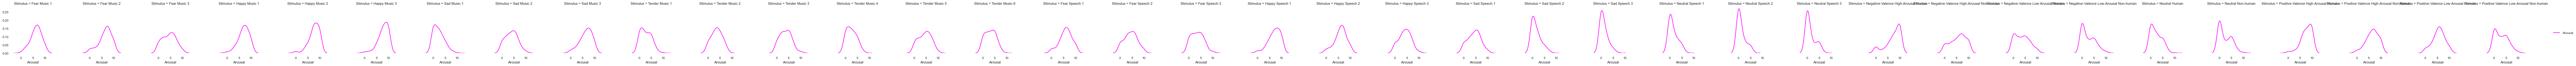

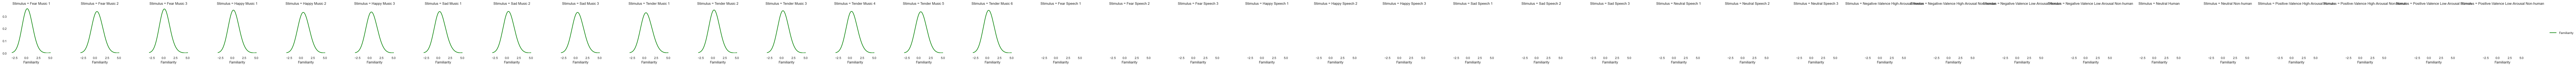

In [31]:
View(pd.DataFrame(perceivedLong.isnull().sum()))

# there are only missing values are these four columns:
    # Positive	11.048649%
    # Negative	11.048649%
    # Arousal	11.048649%
    # Familiarity	4.108108%
    
# look at distributions to see if we should impute by mean or median
g = sns.FacetGrid(perceivedLong, col="Stimulus")
g.map(sns.distplot, "Positive", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "red", label = "Positive")
g.add_legend();

g = sns.FacetGrid(perceivedLong, col="Stimulus")
g.map(sns.distplot, "Negative", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "blue", label = "Negative")
g.add_legend();

g = sns.FacetGrid(perceivedLong, col="Stimulus")
g.map(sns.distplot, "Arousal", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "magenta", label = "Arousal")
g.add_legend();

g = sns.FacetGrid(perceivedLong, col="Stimulus")
g.map(sns.distplot, "Familiarity", hist = False, norm_hist = True, kde_kws={"bw":1}, color = "green", label = "Familiarity")
g.add_legend();

**Once again, we'll impute the values based on their closest neighbors--namely, we'll use the median rating of the feature for *each individual stimulus* to avoid bias.**
### Impute

In [32]:
### impute missing values based on neighbors ###
# median is best for all four
View(perceivedLong.groupby(['Stimulus'])['Positive', 'Negative', 'Arousal', 'Familiarity'].median())

# impute missing values with median values for the same feature (e.g., Positive) 
# and stimulus (e.g., Fear Music 1)

colList = ['Positive', 'Negative', 'Arousal', 'Familiarity']
for i, column in enumerate(colList):
    perceivedLong[column] = perceivedLong.groupby(["Stimulus"], sort = False)[column].apply(lambda x: x.fillna(x.median()))

# check and reset index
View(pd.DataFrame(perceivedLong.isnull().mean()*100))
    # no more missing values

perceivedLong.reset_index(inplace = True, drop = True) 

## **2c. Combine dataframes**
Now we need to create a single dataframe for the regression analysis.

In [33]:
# check shapes
print("perceivedLong shape:", perceivedLong.shape)
print("inducedLong shape:", inducedLong.shape)
print("questionnaires shape:", questionnaires.shape, "\n")
    # perceivedLong shape: (8880, 35)
    # inducedLong shape: (4338, 35)
    # questionnaires shape: (240, 59) 

# make sure column names are the same for perceived and induced (both already long)
print(perceivedLong.columns == inducedLong.columns, "\n")

# perceived and induced -- just need to rbind
pi = pd.concat([perceivedLong, inducedLong])
print("perceived/induced shape:", pi.shape), "\n"
View(pi.sample(5))
    # perceived/induced shape: (13218, 35)

# combine perceived/induced with questionnaires
long = pi.merge(questionnaires, on=['FixedID', 'DrugCode', 'DrugPlacebo'], how='left')
print("long shape:", long.shape)
View(long.sample(20))
    # long shape: (13218, 91)


perceivedLong shape: (8880, 35)
inducedLong shape: (4338, 35)
questionnaires shape: (240, 59) 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

perceived/induced shape: (13218, 35)
long shape: (13218, 91)


### Double check about duplicates or participant ID numbers

In [34]:
participants = pd.DataFrame()
participants['Potential'] = pd.Series(range(1, 281))
participants = participants.set_index('Potential')
participants['Perceived'] = perceivedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
participants['Induced'] = inducedLong[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
participants['Questionnaire'] = questionnaires[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
participants['P/I'] = pi[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
participants['Long'] = long[['FixedID','DrugCode']].groupby(['FixedID']).agg(['count'])
participants['CheckPI'] = participants['Perceived'] + participants['Induced'] == participants['P/I']
participants['CheckLong'] = participants['P/I'] == participants['Long']
View(participants)

# check to see why they are false
participants.loc[(participants.CheckPI == False) | (participants.CheckLong == False)]

View(participants)
View(pd.DataFrame(long['FixedID'].value_counts()))

**All of the data seem to be okay! The only data that are still missing are due to:**
* ID numbers in my hypothetical list that didn't correspond to any real participant ID
* Participants who only completed one block of the study (perceived emotion or induced emotion) but not the other one (technical errors, left early, etc.)
* People who completed the pre-test questionnaires but did not complete either stimulus block (perceived or induced emotion). These cases were dropped, as their data won't help the analysis.

# **3. Feature Engineering**
Many of the features--especially in the questionnaire data--need to be transformed before they can be used in any statistical analysis. Some of the categorical columns should be coded on an ordinal, instead of nominal, scale. Others contain messy data that need to be cleaned up using regular expressions. 

*In this section, we will use **feature engineering** to perform the necessary tasks to produce a suitable dataframe for analysis.*

In [35]:
model = long.replace("Not Measured", np.nan)
numericCols = list(model.columns[(model.dtypes.values != np.dtype('object'))])
categoricalCols = list(model.columns[(model.dtypes.values == np.dtype('object'))])

print("shape of model dataframe: ", model.shape)
print("number of numeric columns: ", len(numericCols))
print("number of categorical columns: ", len(categoricalCols))
print("number of numeric + categorical columns: ", len(numericCols) + len(categoricalCols))

shape of model dataframe:  (13218, 91)
number of numeric columns:  65
number of categorical columns:  26
number of numeric + categorical columns:  91


We can see here that the dataframe currently has 65 numeric columns and 26 categorical columns. We will deal with the numeric columns first, follwed by the categorical columns.

## **3a. Numeric Column Wrangling**
The FixedID column (the participant IDs) are currently numeric. Since the "difference" between persons 1 and 2 should be the same as between persons 1 and 244, the feature should be categorical rather than numeric.

### Turn IDs into a Categorical Variable

In [36]:
# participants are not ordered in any way
model['FixedID'] = model['FixedID'].astype(str)

## **3b. Categorical Column Wrangling**
**There are several different ways we need to transform the categorical features. Below, we will perform the following operations:**
* Drop theoretically redundant features
* Re-label binary variables as 0 and 1
* Convert ordinal variables from nominal Likert scales to numeric values (e.g., 1-7)
* Transforming uncategorized variables (that require unique transformations)
* One-hot encode certain nominal variables

First, we will examine the unique values in each categorical column.

In [37]:
for i, column in enumerate(categoricalCols):
    print(column, "unique values:")
    print(model[column].unique(), "\n")

DrugCode unique values:
['8J' '4J' '6J' '7J' '9J' '3J' '12J' '13J' '2J' '10J' '5J' '11J' '14J'
 '1J' '16J' '18J' '19J' '17J' '15J' '20J' '22J' '21J' '23J' '30J' '29J'
 '28J' '27J' '25J' '24J' '26J' '2K' '1K' '5K' '3K' '4K' '9K' '11K' '6K'
 '8K' '7K' '14K' '12K' '18K' '16K' '32J' '13K' '17K' '15K' '24K' '25K'
 '26K' '19K' '22K' '21K' '31K' '32K' '29K' '28K' '2E' '27K' '4E' '1E'
 '23K' '3E' '12E' '10E' '8E' '9E' '11E' '7E' '6E' '14E' '16E' '15E' '17E'
 '13E' '21E' '22E' '19E' '18E' '20E' '26E' '27E' '30K' '30E' '32E' '31E'
 '1D' '28E' '2D' '6D' '4D' '7D' '3D' '5D' '10D' '8D' '11D' '13D' '16D'
 '14D' '20D' '15D' '19D' '17D' '22D' '21D' '26D' '24D' '25D' '23D' '27D'
 '30D' '32D' '28D' '29D' '1J2' '31D' '8J2' '4J2' '5J2' '6J2' '7J2' '3J2'
 '9J2' '14J2' '10J2' '12J2' '11J2' '18J2' '16J2' '17J2' '15J2' '20J2'
 '22J2' '19J2' '13J2' '21J2' '2J2' '24J2' '23J2' '28J2' '26J2' '25J2'
 '29J2' '27J2' '3K2' '4K2' '31J2' '30J2' '2K2' '1K2' '10K2' '6K2' '7K2'
 '9K2' '12K2' '8K2' '11K2' '13K2' '14K2' '16

### Drop Redundant Features
Features that are theoretically identical to another feature should be dropped from the analysis, in order to prevent multicollinearity.

#### *DrugCode*

In [38]:
# DrugCode gives the exact same info as the FixedID column 
dropCols = ['DrugCode']
model = model.drop(columns=dropCols)
model.shape
    # (13218, 90)

(13218, 90)

### Binary Variables
Variables with only two values (for example, ***Yes*** vs. ***No*** responses) should be recoded as 0 and 1.

#### *Locus (Perceived Emotion vs. Induced Emotion)*

In [39]:
print(model.Locus.value_counts(normalize=True).round(2)*100)
    # Perceived    67.0
    # Induced      33.0

model.Locus = model.Locus.replace(to_replace=['Perceived','Induced'], value=[0, 1])
    # Perceived = 0
    # Induced = 1

Perceived    67.0
Induced      33.0
Name: Locus, dtype: float64


#### *TakeMedsRecentlyYN*

In [40]:
print(model.TakeMedsRecentlyYN.value_counts(normalize=True).round(2)*100)
    # no     59.0
    # yes    41.0

model.TakeMedsRecentlyYN = model.TakeMedsRecentlyYN.replace(to_replace=['no','yes'], value=[0, 1])
    # no = 0
    # yes = 1

no     59.0
yes    41.0
Name: TakeMedsRecentlyYN, dtype: float64


#### *BirthControlYN*

In [41]:
print(model.BirthControlYN.value_counts(normalize=True).round(2)*100)
    # no     79.0
    # yes    21.0

model.BirthControlYN = model.BirthControlYN.replace(to_replace=['no','yes'], value=[0, 1])
    # no = 0
    # yes = 1

no     79.0
yes    21.0
Name: BirthControlYN, dtype: float64


#### *ArthritisYN*

In [42]:
print(model.ArthritisYN.value_counts(normalize=True).round(2)*100)
    # no     94.0
    # yes     6.0

model.ArthritisYN = model.ArthritisYN.replace(to_replace=['no','yes'], value=[0, 1])
    # no = 0
    # yes = 1

no     94.0
yes     6.0
Name: ArthritisYN, dtype: float64


#### *ImmuneDisordersYN*

In [43]:
print(model.ImmuneDisordersYN.value_counts(normalize=True).round(2)*100)
    # no     100.0
    # yes      0.0

model.ImmuneDisordersYN = model.ImmuneDisordersYN.replace(to_replace=['no','yes'], value=[0, 1])
    # no = 0
    # yes = 1

no     100.0
yes      0.0
Name: ImmuneDisordersYN, dtype: float64


#### *EndocrineDisordersYN*

In [44]:
print(model.EndocrineDisordersYN.value_counts(normalize=True).round(2)*100)
    # no     99.0
    # yes     1.0

model.EndocrineDisordersYN = model.EndocrineDisordersYN.replace(to_replace=['no','yes'], value=[0, 1])
    # no = 0
    # yes = 1

no     99.0
yes     1.0
Name: EndocrineDisordersYN, dtype: float64


#### *DiabeticYN*

In [45]:
print(model.DiabeticYN.value_counts(normalize=True).round(2)*100)
    # no             100.0
    # yes, type 1      0.0

model.DiabeticYN = model.DiabeticYN.replace(to_replace=['no','yes, type 1'], value=[0, 1])
    # no = 0
    # yes, type 1 = 1

no             100.0
yes, type 1      0.0
Name: DiabeticYN, dtype: float64


### Ordinal Variables
**Variables on Likert scales should be recoded as ordinal values, as there is an inherent order to these responses.**


For example, for the question ***When you take Tylenol, how effective is it at reducing your pain?***, the possible responses were: 
* I have never taken Tylenol
* Not effective at all
* Slightly effective
* Moderately effective
* Very effective
* Extremely effective

In this case, we can see that ***Not effective at all*** is less than ***Slightly effective***, and, in turn, ***Slightly effective*** is less than ***Moderately effective*** and so on. By transforming these variables to ordinal, we can capture this difference in any statistical analysis. 

Without recoding, it would be difficult to compare ***Extremely effective*** vs. ***Not effective at all***, for instance.

#### *MedsEffectiveness*

In [46]:
print(model.MedsEffectiveness.unique())
    # 'never taken' (1), 'not at all' (2), 'almost never' (3), 'slightly' (4), 
    # 'moderately' (5), 'very' (6), 'extremely' (7)
    

model.MedsEffectiveness = model.MedsEffectiveness.replace(to_replace=['never taken', 'not at all', 'almost never', 'slightly',
                                                                     'moderately', 'very', 'extremely'], 
                                                          value=[1, 2, 3, 4, 5, 6, 7])


['slightly' 'never taken' 'moderately' 'very' nan 'not at all' 'extremely']


#### *Politics*

In [47]:
print(model.Politics.unique())
    # 'very liberal' (1), 'liberal' (2), 'somewhat liberal' (3) , 'moderate' (4), 
    # 'somewhat conservative' (5), 'conservative' (6), 'very conservative' (7)

model.Politics = model.Politics.replace(to_replace=['very liberal', 'liberal', 'somewhat liberal', 'moderate',
                                                    'somewhat conservative', 'conservative', 'very conservative'], 
                                        value=[1, 2, 3, 4, 5, 6, 7])

['conservative' 'somewhat liberal' 'somewhat conservative' 'liberal'
 'moderate' 'very liberal' 'very conservative' nan]


#### *HowMuchLastEat*

In [48]:
print(model.HowMuchLastEat.unique())
    # 'snack' (1), 'light meal' (2), 'full meal' (3)

model.HowMuchLastEat = model.HowMuchLastEat.replace(to_replace=['snack', 'light meal', 'full meal'], value=[1, 2, 3])


['snack' 'full meal' 'light meal' nan]


#### *CigarettesPerDay*

In [49]:
print(model.CigarettesPerDay.unique())
    # '0' (1), '1-10' (2), '11-20' (3)

model.CigarettesPerDay = model.CigarettesPerDay.replace(to_replace=['0', '1-10', '11-20'], value=[1, 2, 3])


['0' nan '1-10' '11-20']


#### *FrequencyTakeMeds*

In [50]:
print(model.FrequencyTakeMeds.unique())
    # 'never taken' (1), 'less than once a year' (2), 'at least once a year' (3), 'several times a year' (4), 
    # 'at least once a month' (5), 'several times a month' (6), 'at least once a week' (7), 
    # 'several times a week' (8), 'almost everyday' (9)

model.FrequencyTakeMeds = model.FrequencyTakeMeds.replace(to_replace=['never taken', 'less than once a year', 
                                                                      'at least once a year', 'several times a year',
                                                                      'at least once a month', 'several times a month', 
                                                                      'at least once a week', 'several times a week',
                                                                      'almost everyday'], 
                                                          value=[1, 2, 3, 4, 5, 6, 7, 8, 9])


['several times a month' 'never taken' 'at least once a month'
 'less than once a year' 'at least once a year' 'several times a year'
 'at least once a week' 'almost everyday' 'several times a week' nan]


#### *WhenLastSick*

In [51]:
print(model.WhenLastSick.unique())
    # 'a year or more ago' (1), 'a few months ago' (2), 'a month ago' (3), 'a couple of weeks ago' (4),
    # 'a week ago' (5), 'a couple of days ago' (6), 'today' (7)

model.WhenLastSick = model.WhenLastSick.replace(to_replace=['a year or more ago', 'a few months ago', 
                                                            'a month ago', 'a couple of weeks ago',
                                                            'a week ago', 'a couple of days ago', 'today'], 
                                                value=[1, 2, 3, 4, 5, 6, 7])



['a few months ago' 'a year or more ago' 'a month ago'
 'a couple of weeks ago' 'a week ago' 'a couple of days ago' nan 'today']


#### *MarijuanaFrequency*

In [52]:
print(model.MarijuanaFrequency.unique())
    # 'never' (1), 'at least once a year' (2), 'several times a year' (3), 'at least once a month' (4),
    # 'several times a month' (5), 'at least once a week' (6), 'several times a week' (7), 'almost every day' (8)

model.MarijuanaFrequency = model.MarijuanaFrequency.replace(to_replace=['never', 'at least once a year', 
                                                                        'several times a year', 'at least once a month',
                                                                        'several times a month', 'at least once a week', 
                                                                        'several times a week', 'almost every day'], 
                                                            value=[1, 2, 3, 4, 5, 6, 7, 8])


['never' 'several times a week' 'almost every day' 'at least once a month'
 nan 'at least once a year' 'several times a year' 'several times a month'
 'at least once a week']


#### *YearUniversity*

In [53]:
print(model.YearUniversity.unique())
    # 1, 2, 3, 4, 5, (and None)

model.YearUniversity = model.YearUniversity.replace(to_replace=['None', '1', '2', '3', '4', '5'], value=[np.nan, 1, 2, 3, 4, 5])


['1' '2' '3' 'None' '5' '4' nan]


### Transforming Uncategorized Variables
There are additional variables that do not fit any of these categories that we need to transform.

#### *Russell --> HighLow*

In [54]:
print("Russell unique values: \n", model.Russell.value_counts(normalize=True).round(2)*100, "\n")
    # 'Neg-Valence High-Arousal', 'Pos-Valence High-Arousal',
    # 'Neg-Valence Low-Arousal', 'Pos-Valence Low-Arousal', 
    # 'Neutral'

# Change into an arousal column (high arousal/low arousal/neutral) to prevent multicollinearity with the PosNeg feature
    # 'Neg-Valence High-Arousal' --> 'High' 
    # 'Pos-Valence High-Arousal' --> 'High' 
    # 'Neg-Valence Low-Arousal' --> 'Low' 
    # 'Pos-Valence Low-Arousal' --> 'Low' 
    # 'Neutral' --> 'Neutral' 
    
model['HighLow'] = model.Russell.replace(to_replace=['Neg-Valence High-Arousal', 'Pos-Valence High-Arousal', 
                                                     'Neg-Valence Low-Arousal', 'Pos-Valence Low-Arousal', 'Neutral'], 
                                         value=["High", "High", "Low", "Low", "Neutral"])

# drop original column
model = model.drop(['Russell'], axis=1)

# check
print("HighLow unique values: \n", model.HighLow.value_counts(normalize=True).round(2)*100)

Russell unique values: 
 Pos-Valence High-Arousal    22.0
Neg-Valence Low-Arousal     22.0
Neg-Valence High-Arousal    22.0
Pos-Valence Low-Arousal     22.0
Neutral                     13.0
Name: Russell, dtype: float64 

HighLow unique values: 
 High       44.0
Low        44.0
Neutral    13.0
Name: HighLow, dtype: float64


#### *PreferredMeds*

In [55]:
# Reduce categories
print(model.PreferredMeds.value_counts(normalize=True).round(2)*100)
    # Ibuprofen                        60.0 --> 'Ibuprofen'
    # Acetaminophen                    15.0 --> 'Acetaminophen'
    # Unknown                          9.0 --> 'Other'
    # More Than One Type                6.0 --> 'Other'
    # Naproxen Sodium                   4.0 --> 'Other'
    # Do Not Take Meds                  3.0 --> 'None'
    # Acetylsalicylic Acid              1.0 --> 'Other'
    # Pseudoephedrine Hydrochloride     0.0 --> 'Other'
    # Calcium Carbonate                 0.0 --> 'Other'
    # Baclofen                          0.0 --> 'Other'
    # Marijuana                         0.0 --> 'Other'

model.PreferredMeds = model.PreferredMeds.replace(to_replace=['Ibuprofen', 'Acetaminophen', 'Unknown', 'More Than One Type',
                                                              'Naproxen Sodium', 'Do Not Take Meds ', 'Acetylsalicylic Acid', 
                                                              "Pseudoephedrine Hydrochloride", "Calcium Carbonate", 
                                                              "Baclofen", "Marijuana"], 
                                                  value=["Ibuprofen", "Acetaminophen", "Other", "Other", "Other",
                                                         "None", "Other", "Other", "Other", "Other", "Other"])


Ibuprofen                        60.0
Acetaminophen                    15.0
Unknown                           9.0
More Than One Type                6.0
Naproxen Sodium                   4.0
Do Not Take Meds                  3.0
Acetylsalicylic Acid              1.0
Pseudoephedrine Hydrochloride     0.0
Marijuana                         0.0
Calcium Carbonate                 0.0
Baclofen                          0.0
Name: PreferredMeds, dtype: float64


#### *LastAlcoholDays*

In [56]:
print(model.LastAlcoholDays.unique())
    # ['5' '4' '7' '182.5' 'Never' '6' nan '2' '14' '3' '0.416666666666667' '1'
    #  '30' '34' '10' '9' '365' '28' '24' '21' '270' '11' '60' '1.5'
    #  '0.583333333333333' '0.5' '90' '23' '15' '0.625' '0.833333333333333'
    #  '2.5' '300' '8' '0.666666666666667' '240' '0.75' '20' '17'
    #  '0.708333333333333' '0.333333333333333']

# Get rid of "Never"
model['LastAlcoholDays'] = pd.to_numeric(model['LastAlcoholDays'], errors='coerce')

['5' '4' '7' '182.5' 'Never' '6' nan '2' '14' '3' '0.416666666666667' '1'
 '30' '34' '10' '9' '365' '28' '24' '21' '270' '11' '60' '1.5'
 '0.583333333333333' '0.5' '90' '23' '15' '0.625' '0.833333333333333'
 '2.5' '300' '8' '0.666666666666667' '240' '0.75' '20' '17'
 '0.708333333333333' '0.333333333333333']


### One-Hot Encoding of Nominal Variables

In [57]:
# Stimulus
print("Stimulus: ", model.Stimulus.unique(), "\n")
    # music stimuli
        #  'Fear Music 1', 'Fear Music 2', 'Fear Music 3', 
        #  'Happy Music 1', 'Happy Music 2', 'Happy Music 3',
        #  'Sad Music 1', 'Sad Music 2', 'Sad Music 3'
        #  'Tender Music 1', 'Tender Music 2', 'Tender Music 3', 'Tender Music 4', 'Tender Music 5', 'Tender Music 6',

    # speech stimuli
        #  'Fear Speech 1', 'Fear Speech 2', 'Fear Speech 3', 
        #  'Happy Speech 1', 'Happy Speech 2', 'Happy Speech 3',
        #  'Sad Speech 1', 'Sad Speech 2', 'Sad Speech 3', 
        #  'Neutral Speech 1', 'Neutral Speech 2', 'Neutral Speech 3',

    # natural sounds stimuli
        #  'Negative-Valence High-Arousal Human', 'Negative-Valence High-Arousal Non-human',
        #  'Negative-Valence Low-Arousal Human', 'Negative-Valence Low-Arousal Non-human', 
        #  'Neutral Human', 'Neutral Non-human', 
        #  'Positive-Valence High-Arousal Human', 'Positive-Valence High-Arousal Non-human',
        #  'Positive-Valence Low-Arousal Human', 'Positive-Valence Low-Arousal Non-human'

# PosNeg
print("PosNeg: ", model.PosNeg.unique(), "\n")
    # 'Negative', 'Positive', 'Neutral'

# HighLow
print("HighLow: ", model.HighLow.unique(), "\n")
    # 'High', 'Low', 'Neutral'

# SoundType
print("SoundType: ", model.SoundType.unique(), "\n")
    # 'Music', 'Speech', 'Natural Sounds'

# Gender
print("Gender: ", model.Gender.unique(), "\n")
    # 'female', 'male', 'prefer not to answer', nan

# PoliticalParty
print("PoliticalParty: ", model.PoliticalParty.unique(), "\n")
    # 'republican', 'democrat', 'libertarian', 'other', nan

# PreferredMeds
print("PreferredMeds: ", model.PreferredMeds.unique(), "\n")
    # 'Ibuprofen', 'Do Not Take Meds', 'Acetaminophen', 'Other', nan

# Race
print("Race: ", model.Race.unique())
    # 'White', 'Asian', 'Black', 'Hispanic', 'Other',
    # 'White and Hispanic', 'White and Asian', 'White and Black', 'Black and Hispanic', 
    # 'Hispanic and Asian', 'Black and Other', nan

model = pd.get_dummies(model, columns=['Stimulus', 'PosNeg', 'HighLow', 'SoundType', 'Gender', 'PoliticalParty', 'PreferredMeds', 'Race'])

Stimulus:  ['Fear Music 1' 'Fear Music 2' 'Fear Music 3' 'Happy Music 1'
 'Happy Music 2' 'Happy Music 3' 'Sad Music 1' 'Sad Music 2' 'Sad Music 3'
 'Tender Music 1' 'Tender Music 2' 'Tender Music 3' 'Tender Music 4'
 'Tender Music 5' 'Tender Music 6' 'Fear Speech 1' 'Fear Speech 2'
 'Fear Speech 3' 'Happy Speech 1' 'Happy Speech 2' 'Happy Speech 3'
 'Sad Speech 1' 'Sad Speech 2' 'Sad Speech 3' 'Neutral Speech 1'
 'Neutral Speech 2' 'Neutral Speech 3'
 'Negative-Valence High-Arousal Human'
 'Negative-Valence High-Arousal Non-human'
 'Negative-Valence Low-Arousal Human'
 'Negative-Valence Low-Arousal Non-human' 'Neutral Human'
 'Neutral Non-human' 'Positive-Valence High-Arousal Human'
 'Positive-Valence High-Arousal Non-human'
 'Positive-Valence Low-Arousal Human'
 'Positive-Valence Low-Arousal Non-human'] 

PosNeg:  ['Negative' 'Positive' 'Neutral'] 

HighLow:  ['High' 'Low' 'Neutral'] 

SoundType:  ['Music' 'Speech' 'Natural Sounds'] 

Gender:  ['female' 'male' 'prefer not to answer' 

#### *Race*
Instead of having separate categories for one-hot encoded multiple racial identities, like ***White and Hispanic***, we will transform these columns so that if a person identifies with a single race, the value will be ***1*** and if they do not, the value will be ***0***. 

So, each person will have the following one-hot encoded variables:
* Race_Asian
* Race_Black
* Race_Hispanic
* Race_Other
* Race_White

If a person identifies as ***Asian***, they will have the following values:
* ***Race_Asian = 1***
* Race_Black = 0
* Race_Hispanic = 0
* Race_Other = 0
* Race_White = 0

If a person identifies as ***White and Asian***, they will have the following values:
* ***Race_Asian = 1***
* Race_Black = 0
* Race_Hispanic = 0
* Race_Other = 0
* ***Race_White = 1***

In [58]:
### race transformation -- recode multiple races into single race columns ###
for i, row in model.iterrows():
    
    # Race_Black and Hispanic
    if model.loc[i, 'Race_Black and Hispanic'] == 1:
        
        # Adding count (1) to Race_Black if it is at 0 -- otherwise keep the '1' (don't want '2s')
        if model.loc[i, 'Race_Black'] == 0:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black'] + 1
        else:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black']
        
        # Adding count (1) to Race_Hispanic if it is at 0 -- otherwise keep the '1' (don't want '2s')
        if model.loc[i, 'Race_Hispanic'] == 0:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic'] + 1
        else:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic']
            
    # Race_Black and Other
    if model.loc[i, 'Race_Black and Other'] == 1:
        
        # Adding count (1) to Race_Black if it is at 0
        if model.loc[i, 'Race_Black'] == 0:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black'] + 1
        else:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black']
        
        # Adding count (1) to Race_Other if it is at 0
        if model.loc[i, 'Race_Other'] == 0:
            model.loc[i, 'Race_Other'] = model.loc[i, 'Race_Other'] + 1
        else:
            model.loc[i, 'Race_Other'] = model.loc[i, 'Race_Other']
    
    # Race_Hispanic and Asian
    if model.loc[i, 'Race_Hispanic and Asian'] == 1:
        
        # Adding count (1) to Race_Hispanic if it is at 0
        if model.loc[i, 'Race_Hispanic'] == 0:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic'] + 1
        else:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic']
        
        # Adding count (1) to Race_Asian if it is at 0
        if model.loc[i, 'Race_Asian'] == 0:
            model.loc[i, 'Race_Asian'] = model.loc[i, 'Race_Asian'] + 1
        else:
            model.loc[i, 'Race_Asian'] = model.loc[i, 'Race_Asian']
            
    # Race_White and Asian
    if model.loc[i, 'Race_White and Asian'] == 1:
        
        # Adding count (1) to Race_White if it is at 0
        if model.loc[i, 'Race_White'] == 0:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White'] + 1
        else:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White']
        
        # Adding count (1) to Race_Asian if it is at 0
        if model.loc[i, 'Race_Asian'] == 0:
            model.loc[i, 'Race_Asian'] = model.loc[i, 'Race_Asian'] + 1
        else:
            model.loc[i, 'Race_Asian'] = model.loc[i, 'Race_Asian']
            
    # Race_White and Black
    if model.loc[i, 'Race_White and Black'] == 1:
        
        # Adding count (1) to Race_White if it is at 0
        if model.loc[i, 'Race_White'] == 0:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White'] + 1
        else:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White']
        
        # Adding count (1) to Race_Black if it is at 0
        if model.loc[i, 'Race_Black'] == 0:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black'] + 1
        else:
            model.loc[i, 'Race_Black'] = model.loc[i, 'Race_Black']
            
    # Race_White and Hispanic
    if model.loc[i, 'Race_White and Hispanic'] == 1:
        
        # Adding count (1) to Race_White if it is at 0
        if model.loc[i, 'Race_White'] == 0:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White'] + 1
        else:
            model.loc[i, 'Race_White'] = model.loc[i, 'Race_White']
        
        # Adding count (1) to Race_Hispanic if it is at 0
        if model.loc[i, 'Race_Hispanic'] == 0:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic'] + 1
        else:
            model.loc[i, 'Race_Hispanic'] = model.loc[i, 'Race_Hispanic'] 

model = model.drop(columns=['Race_Black and Hispanic', 'Race_Black and Other', 'Race_Hispanic and Asian', 
                            'Race_White and Asian', 'Race_White and Black', 'Race_White and Hispanic'])   
        
# check
colList = ['Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']
for column in colList:
    print("---- %s ---" % column)
    print(model[column].value_counts(normalize=True).round(2)*100, "\n")
    
    # it worked!

---- Race_Asian ---
0    79.0
1    21.0
Name: Race_Asian, dtype: float64 

---- Race_Black ---
0    92.0
1     8.0
Name: Race_Black, dtype: float64 

---- Race_Hispanic ---
0    95.0
1     5.0
Name: Race_Hispanic, dtype: float64 

---- Race_Other ---
0    99.0
1     1.0
Name: Race_Other, dtype: float64 

---- Race_White ---
1    67.0
0    33.0
Name: Race_White, dtype: float64 



#### *LastTimeTookMeds*
This column is very messy. 
* There are nonsensical values, like *15 NA* and *_years*. 
* There are also values on all different scales, like *>1 years*, *215 days*, and *5 minutes*.

**Here, we will transform the values so that the LastTimeTookMeds values are all measured in *days*.**

In [59]:
print("before transformation: ", model.LastTimeTookMeds.unique(), "\n")
    # before transformation:  ['4 years' '10 years' '1 years' ' weeks' ' never' '1 months' '3 weeks'
    #  '6 months' '3 days' '3 years' '2 days' '>1 weeks' ' months' '>1 years'
    #  '3 months' '>1 months' '48 hours' '2 months' nan '1 weeks' '5 months'
    #  '2 weeks' '24 hours' '2.5 weeks' '36 hours' ' unknown' '5 minutes'
    #  '215 days' '2 years' '4 months' '40. hours' '15 NA' '0 NA' ' years'
    #  '3.5 months' '6 years' '1 hours' '5 days' '20 hours' '4 days' '8 months'
    #  '8 NA' '4 weeks' '1 days' '5 years'] 

# replace unhelpful characters
model['LastTimeTookMeds'] = model['LastTimeTookMeds'].str.replace(">|NA", "")
model['LastTimeTookMeds'] = model['LastTimeTookMeds'].replace(r'^.*NA.*$', np.nan, regex=True)

# replace uncertainties with a nan
model['LastTimeTookMeds'] = model['LastTimeTookMeds'].str.replace("unknown|never", "")

# replace beginning whitespace (e.g., ' months') with 1 (e.g., '1 months')
model['LastTimeTookMeds'] = model['LastTimeTookMeds'].replace(r'^ .*', '1' + model['LastTimeTookMeds'].astype(str), regex=True)

# separate numbers and text
model[['LastTimeTookMeds_Num','LastTimeTookMeds_Text']] = model['LastTimeTookMeds'].str.split(expand=True)
model['LastTimeTookMeds_Num'] = model['LastTimeTookMeds_Num'].astype(float)

### change to days for now ###
model['LastTimeTookMeds'] = model['LastTimeTookMeds_Num']

# minute
minute = model[model['LastTimeTookMeds_Text'].str.contains('minute') == True].index
model.loc[minute,'LastTimeTookMeds'] = model.loc[minute,'LastTimeTookMeds_Num']/1440

# hour
hour = model[model['LastTimeTookMeds_Text'].str.contains('hour') == True].index
model.loc[hour,'LastTimeTookMeds'] = model.loc[hour,'LastTimeTookMeds_Num']/24

# week
week = model[model['LastTimeTookMeds_Text'].str.contains('week') == True].index
model.loc[week,'LastTimeTookMeds'] = model.loc[week,'LastTimeTookMeds_Num']*7

# month
month = model[model['LastTimeTookMeds_Text'].str.contains('month') == True].index
model.loc[month,'LastTimeTookMeds'] = model.loc[month,'LastTimeTookMeds_Num']*30

# year
year = model[model['LastTimeTookMeds_Text'].str.contains('year') == True].index
model.loc[year,'LastTimeTookMeds'] = model.loc[year,'LastTimeTookMeds_Num']*365

model = model.drop(columns=['LastTimeTookMeds_Text', 'LastTimeTookMeds_Num'])

print("after transformation: ", model.LastTimeTookMeds.unique())
    # 
    
model.head(5)

before transformation:  ['4 years' '10 years' '1 years' ' weeks' ' never' '1 months' '3 weeks'
 '6 months' '3 days' '3 years' '2 days' '>1 weeks' ' months' '>1 years'
 '3 months' '>1 months' '48 hours' '2 months' nan '1 weeks' '5 months'
 '2 weeks' '24 hours' '2.5 weeks' '36 hours' ' unknown' '5 minutes'
 '215 days' '2 years' '4 months' '40. hours' '15 NA' '0 NA' ' years'
 '3.5 months' '6 years' '1 hours' '5 days' '20 hours' '4 days' '8 months'
 '8 NA' '4 weeks' '1 days' '5 years'] 

after transformation:  [1.46000000e+03 3.65000000e+03 3.65000000e+02 7.00000000e+00
 1.00000000e+00 3.00000000e+01 2.10000000e+01 1.80000000e+02
 3.00000000e+00 1.09500000e+03 2.00000000e+00 9.00000000e+01
 6.00000000e+01            nan 1.50000000e+02 1.40000000e+01
 1.75000000e+01 1.50000000e+00 3.47222222e-03 2.15000000e+02
 7.30000000e+02 1.20000000e+02 1.66666667e+00 1.50000000e+01
 0.00000000e+00 1.05000000e+02 2.19000000e+03 4.16666667e-02
 5.00000000e+00 8.33333333e-01 4.00000000e+00 2.40000000e+02


FixedID  DrugPlacebo  Locus  Positive  Negative  Arousal  Familiarity  \
0     8.0            1      0       3.0       5.0      7.0          0.0   
1     4.0            1      0       3.0       6.0      9.0          0.0   
2     6.0            1      0       2.0       8.0     10.0          0.0   
3     7.0            0      0       3.0       3.0      8.0          1.0   
4     9.0            0      0       4.0       6.0      6.0          0.0   

   Anger  Anxious  Bored  ...  PoliticalParty_republican  \
0      0      NaN      0  ...                          1   
1      0      NaN      0  ...                          0   
2      0      NaN      0  ...                          0   
3      0      NaN      0  ...                          1   
4      0      NaN      0  ...                          0   

   PreferredMeds_Acetaminophen  PreferredMeds_Do Not Take Meds  \
0                            0                               0   
1                            0                               1   
2                            0                               0   
3                            1                               0   
4                            0                               0   

   PreferredMeds_Ibuprofen  PreferredMeds_Other  Race_Asian  Race_Black  \
0                        1                    0           0           0   
1                        0                    0           1           0   
2                        1                    0           0           0   
3                        0                    0           0           0   
4                        0                    1           1           0   

   Race_Hispanic  Race_Other  Race_White  
0              0           0           1  
1              0           0           0  
2              0           0           1  
3              0           0           1  
4              0           0           0  

[5 rows x 144 columns]

### Check Transformations

In [60]:
model.reset_index(inplace = True, drop = True)
numericCols = list(model.columns[(model.dtypes.values != np.dtype('object'))])
categoricalCols = list(model.columns[(model.dtypes.values == np.dtype('object'))])
print("shape of model dataframe: ", model.shape)
print("number of numeric columns: ", len(numericCols))
print("number of categorical columns: ", len(categoricalCols), "\nlist of cat columns = ", categoricalCols)

shape of model dataframe:  (13218, 144)
number of numeric columns:  143
number of categorical columns:  1 
list of cat columns =  ['FixedID']


**Now, 143 of the 144 features are numeric! The only one that is still categorical is FixedID. We can now proceed with the statistical analysis and exploratory data analysis.**

## **3c. Plot**
The next step is to make graphs of the distributions of the variables to see if we need to transform them in any other way.

There are 143 features to plot.


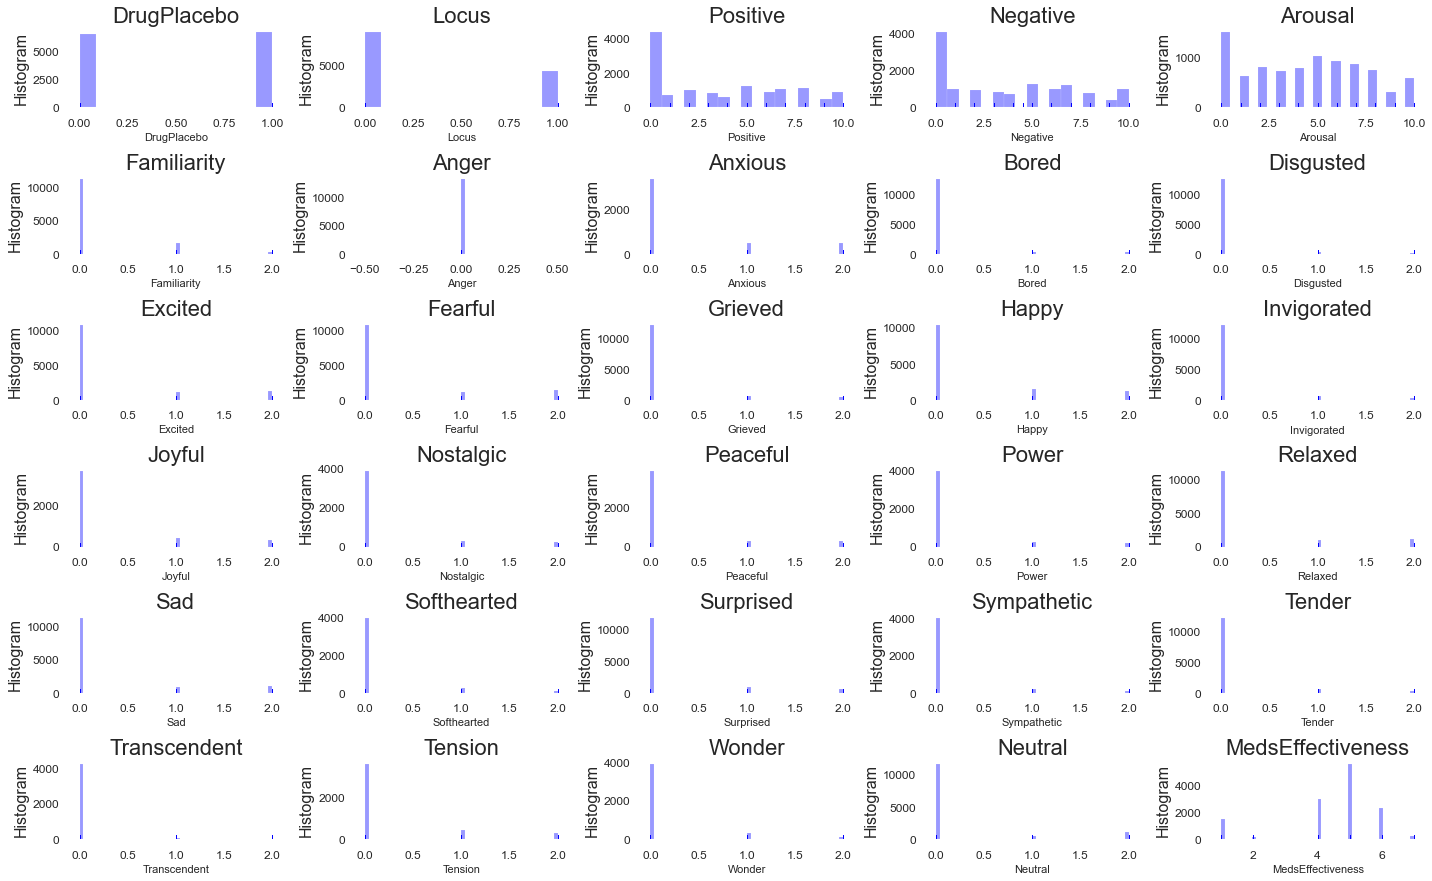

In [61]:
colList = list(model.columns)
colList.remove('FixedID')
print("There are", len(colList), "features to plot.")
    # There are 143 features to plot. -- lets plot them 30 at a time.

plt.figure(figsize=(20,20))
for i, column in enumerate(colList[0:30]):
    plt.subplot(10, 5, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**The three emotion ratings (positive, negative, arousal) are right skewed.**
* We'll try transforming these later on.

**People don't seem to rate any of the specific emotions highly.** 
* We'll come back to this in the last part of the analysis.

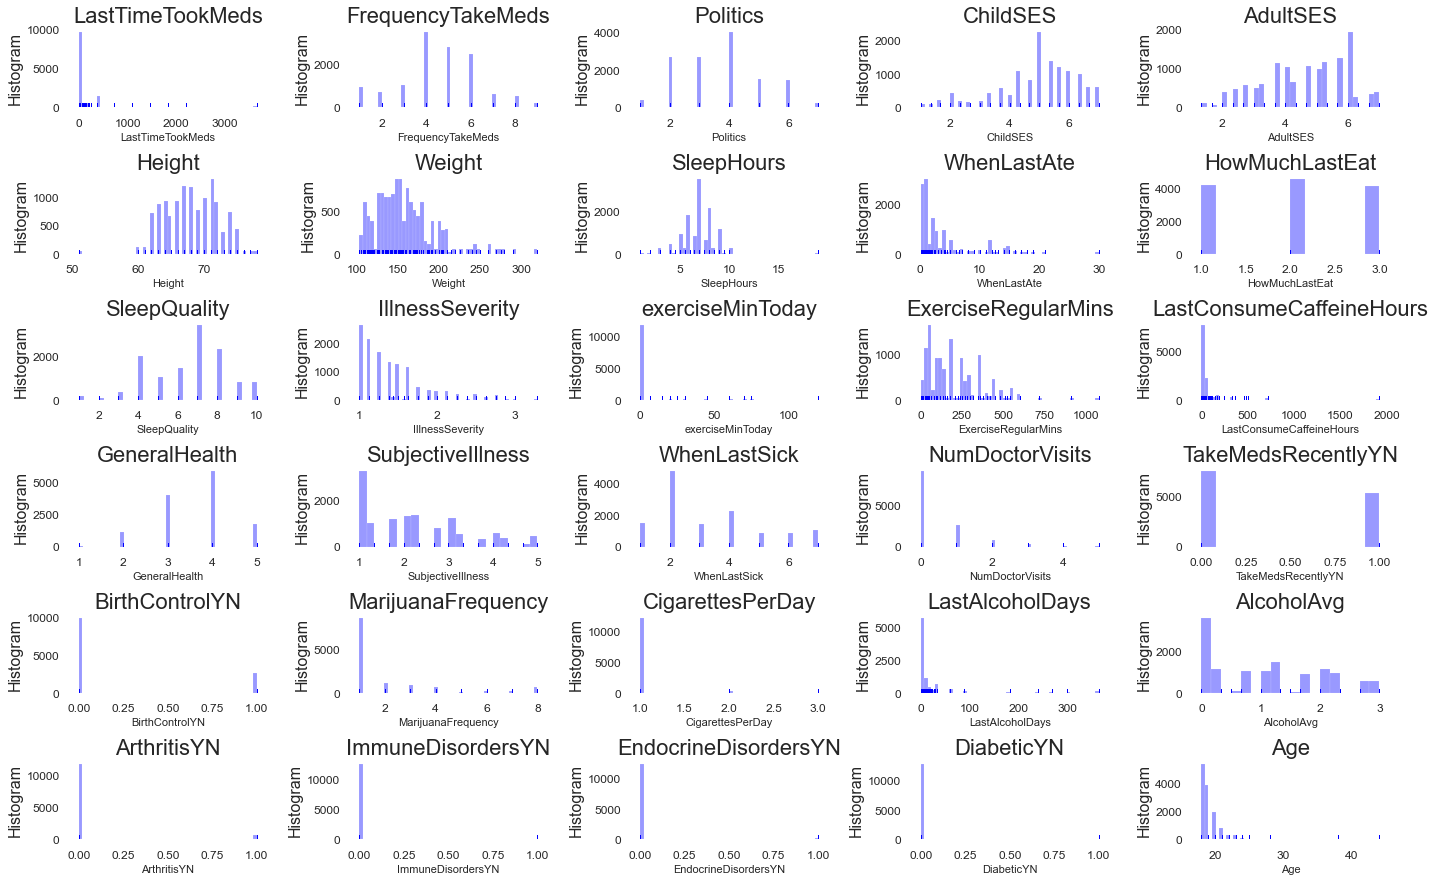

In [62]:
plt.figure(figsize=(20,20))
for i, column in enumerate(colList[30:60]):
    plt.subplot(10, 5, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**Some variables seem to have little variance, like *DiabeticYN* and *CigarettesPerDay*.**
* We'll look for outliers and variability in the next step.

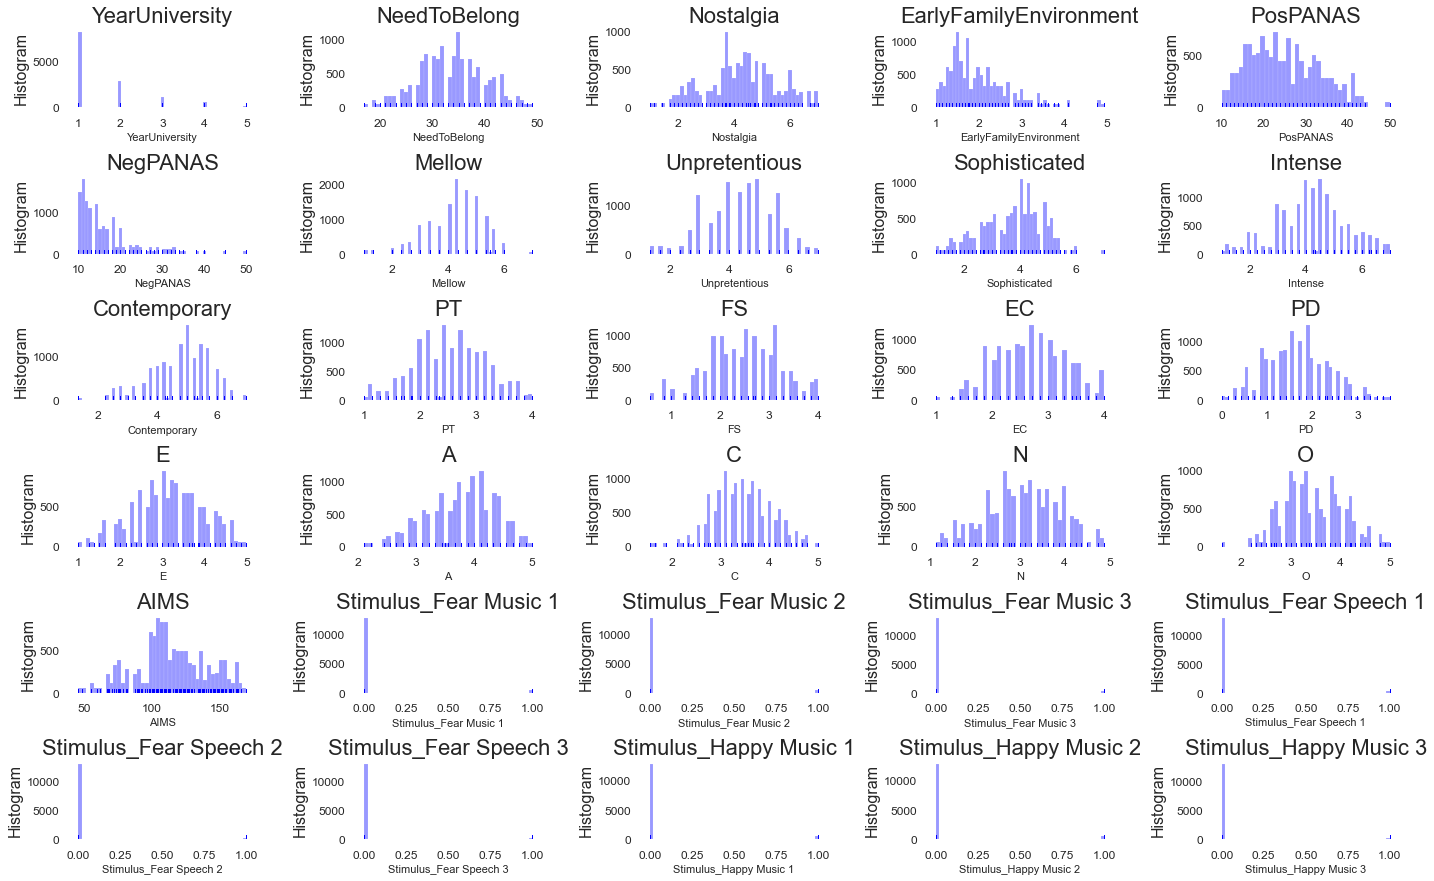

In [63]:
plt.figure(figsize=(20,20))
for i, column in enumerate(colList[60:90]):
    plt.subplot(10, 5, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**The psychographic variables, like *nostalgia*, *empathy* (PT, FS, EC, and PD), *personality* (E, A, C, N, and O), and *absorption in music* (AIMS) look reasonably normally distributed!**

The Stimulus distributions are not useful, as the number of each stimulus was predetermined.

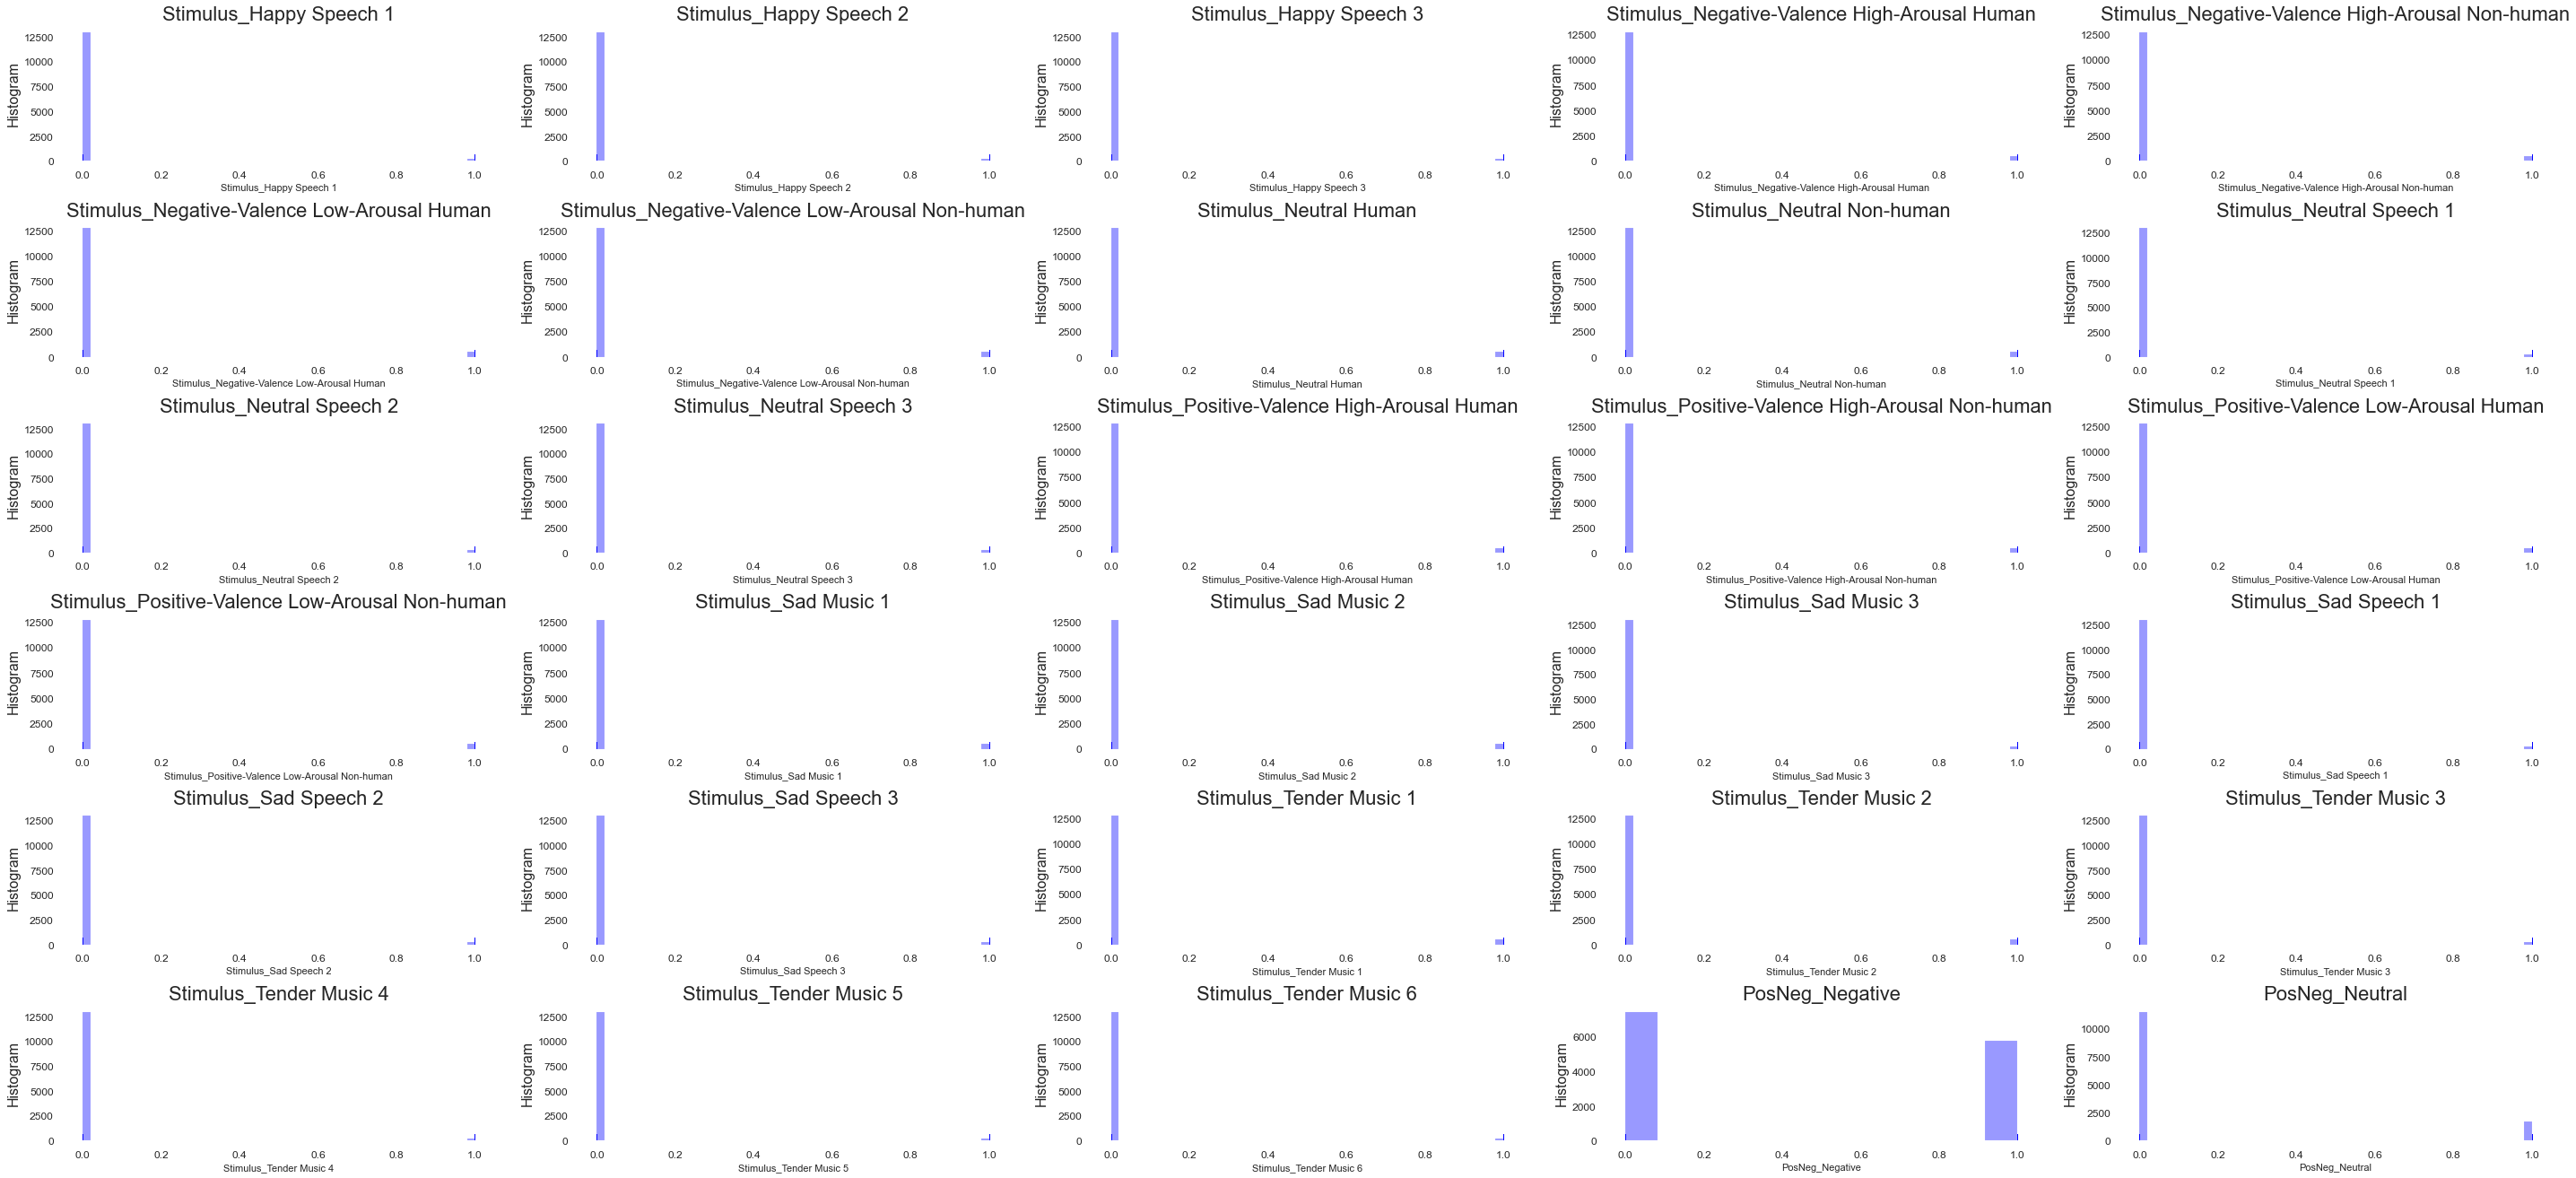

In [64]:
plt.figure(figsize=(40,30))
for i, column in enumerate(colList[90:120]):
    plt.subplot(10, 5, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

As stated above, the Stimulus distributions are not useful, as the number of each stimulus was predetermined.

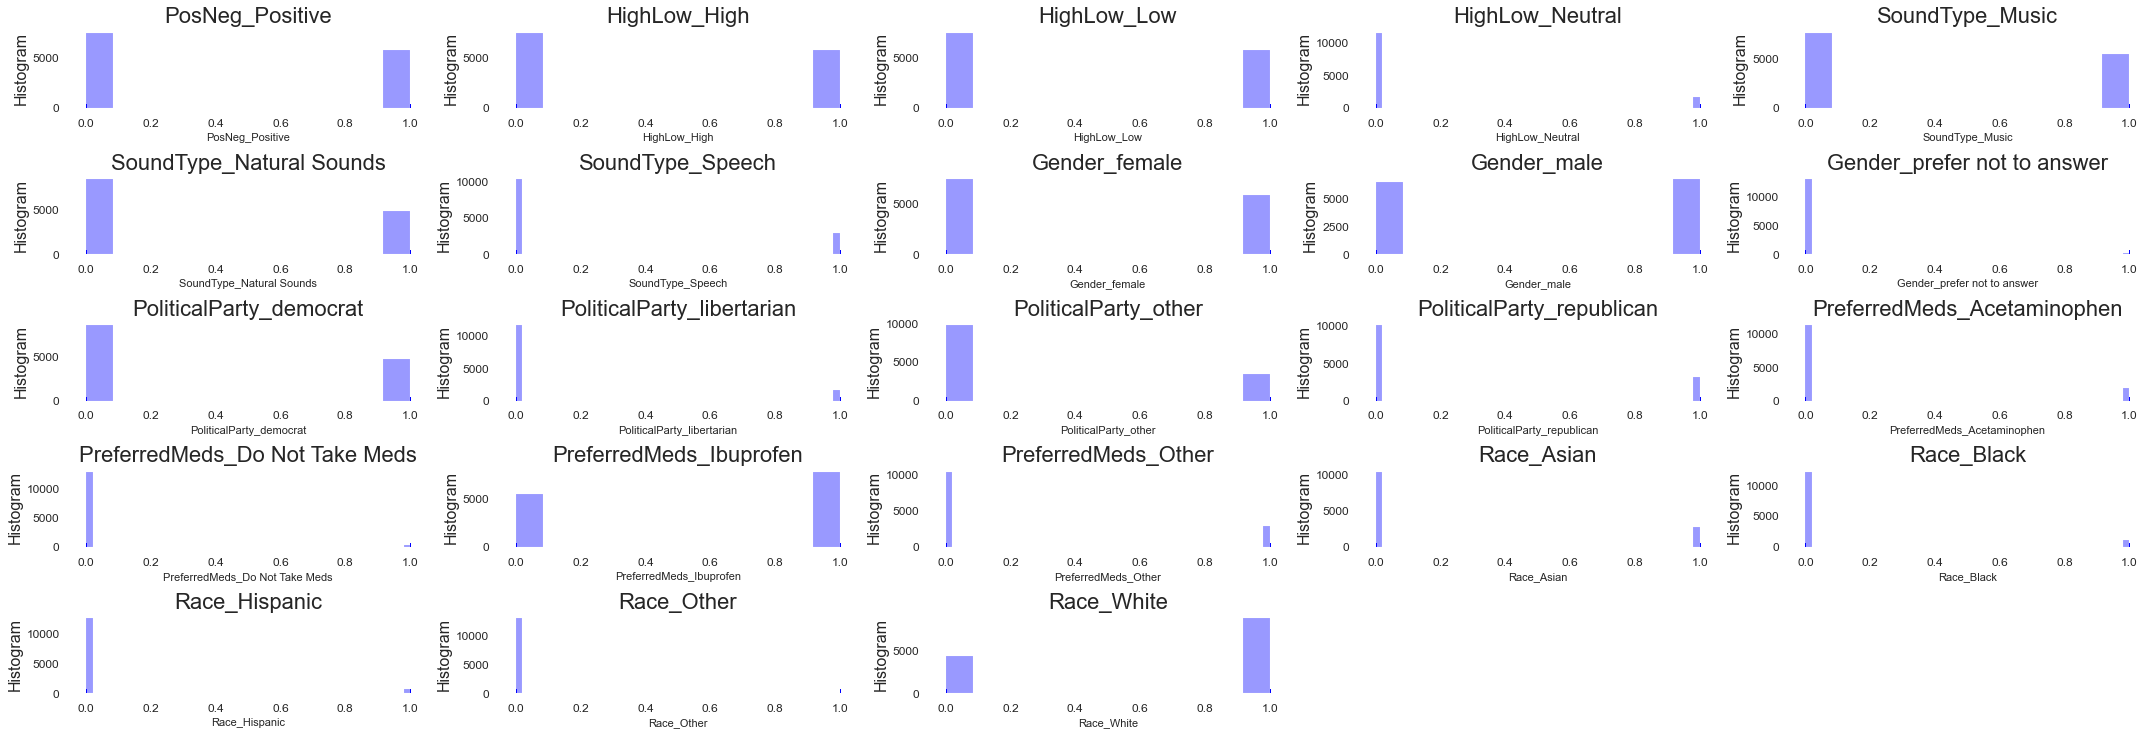

In [65]:
plt.figure(figsize=(30,20))
for i, column in enumerate(colList[120:150]):
    plt.subplot(10, 5, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**Some of the one-hot encoded distributions look skewed**
* We will investigate this more in the next section

## **3d. Feature Selection**
We do not want to include features with a high level of missingness in the model, as imputing these values can lead to bias.

Similarly, features where almost every observation is the same will not inform us about how emotion ratings differ between those who took the drug and those who took the placebo.

**Therefore, we will delete features with high level of missingness and very low variance**

### Look for variables that are missing > 10% of the data

In [66]:
null = pd.DataFrame(model.isnull().mean()*100)
null = null[null[0] > 0]
ten = null[null[0] >= 10]
View(ten)

**Other than the specific emotions (which were not included in both perceived and induced), only 2 features are missing more tan 10% of the data:**
* *Arousal* -- 32.8% missing.
* *LastAlcoholDays* -- 30.9% missing.

The arousal values are missing because participants were not asked to rate arousal for the induced emotion stimuli -- we will therefore keep it in the model as is.

We will delete ***LastAlcoholDays***, though, because of its missingness.


### Look for variables where one response accounts for 95-100% of the variance

In [67]:
for column in model.columns:
    test = model[column].value_counts(normalize = True).round(2)*100 >= 95
    if len(test[test == True]) >=1:
        print(column)

Anger
Bored
Disgusted
Transcendent
CigarettesPerDay
ImmuneDisordersYN
EndocrineDisordersYN
DiabeticYN
Stimulus_Fear Music 1
Stimulus_Fear Music 2
Stimulus_Fear Music 3
Stimulus_Fear Speech 1
Stimulus_Fear Speech 2
Stimulus_Fear Speech 3
Stimulus_Happy Music 1
Stimulus_Happy Music 2
Stimulus_Happy Music 3
Stimulus_Happy Speech 1
Stimulus_Happy Speech 2
Stimulus_Happy Speech 3
Stimulus_Negative-Valence High-Arousal Human
Stimulus_Negative-Valence High-Arousal Non-human
Stimulus_Negative-Valence Low-Arousal Human
Stimulus_Negative-Valence Low-Arousal Non-human
Stimulus_Neutral Human
Stimulus_Neutral Non-human
Stimulus_Neutral Speech 1
Stimulus_Neutral Speech 2
Stimulus_Neutral Speech 3
Stimulus_Positive-Valence High-Arousal Human
Stimulus_Positive-Valence High-Arousal Non-human
Stimulus_Positive-Valence Low-Arousal Human
Stimulus_Positive-Valence Low-Arousal Non-human
Stimulus_Sad Music 1
Stimulus_Sad Music 2
Stimulus_Sad Music 3
Stimulus_Sad Speech 1
Stimulus_Sad Speech 2
Stimulus_Sad Sp

We want to keep all the one-hot encoded variables and specific emotions for later analysis. 

**However, we will delete the following columns that had only one value for 95-100% of the observations:**
* CigarettesPerDay
* ImmuneDisordersYN
* EndocrineDisordersYN
* DiabeticYN

### Delete

In [68]:
delete = ['LastAlcoholDays', 'CigarettesPerDay', 'ImmuneDisordersYN', 'EndocrineDisordersYN', 'DiabeticYN']
model = model.drop(columns=delete)
print("model shape:", model.shape)    
    # model shape: (13218, 139)

model shape: (13218, 139)


## **3e. Outlier Detection**
For each feature, we should investigate the percent of outliers present. 

We will define ***outlier*** as **an observation that is more than 3 standard deviations outside of the mean (in either direction).**

In [69]:
colList = list(model.columns)
colList.remove('FixedID')

for i, column in enumerate(colList):
    # find number out outliers in the column
    num = model[model[column] > model[column].mean() + 3 * model[column].std()]
    
    # find the number of participants that contributed to the outliers 
    # (each person's response to the questionnaire is repeated 55 times) 
    people = int(len(num)/55)
    
    # find percent of people (# people/244 total participants) that contributed the outliers
    percent = int(people/244*100)
    if percent >= 5:
        print(column, "\n", percent, "% outliers \n")

Sad 
 7 % outliers 

Neutral 
 8 % outliers 

ArthritisYN 
 5 % outliers 

Race_Black 
 7 % outliers 

Race_Hispanic 
 5 % outliers 



The only non 'one-hot encoded' value or 'specific emotion value' is ***ArthritisYN*** (with 5% of the cases being outliers). We will still keep it in the analysis for now. 

## **3f. Transform Skewed Variables**
Recall that the three emotion ratings (the dependent variables) were right skewed. We will try transforming them to see if that helps the distribution before more normal.

We will use a **log(1+x) transformation**.

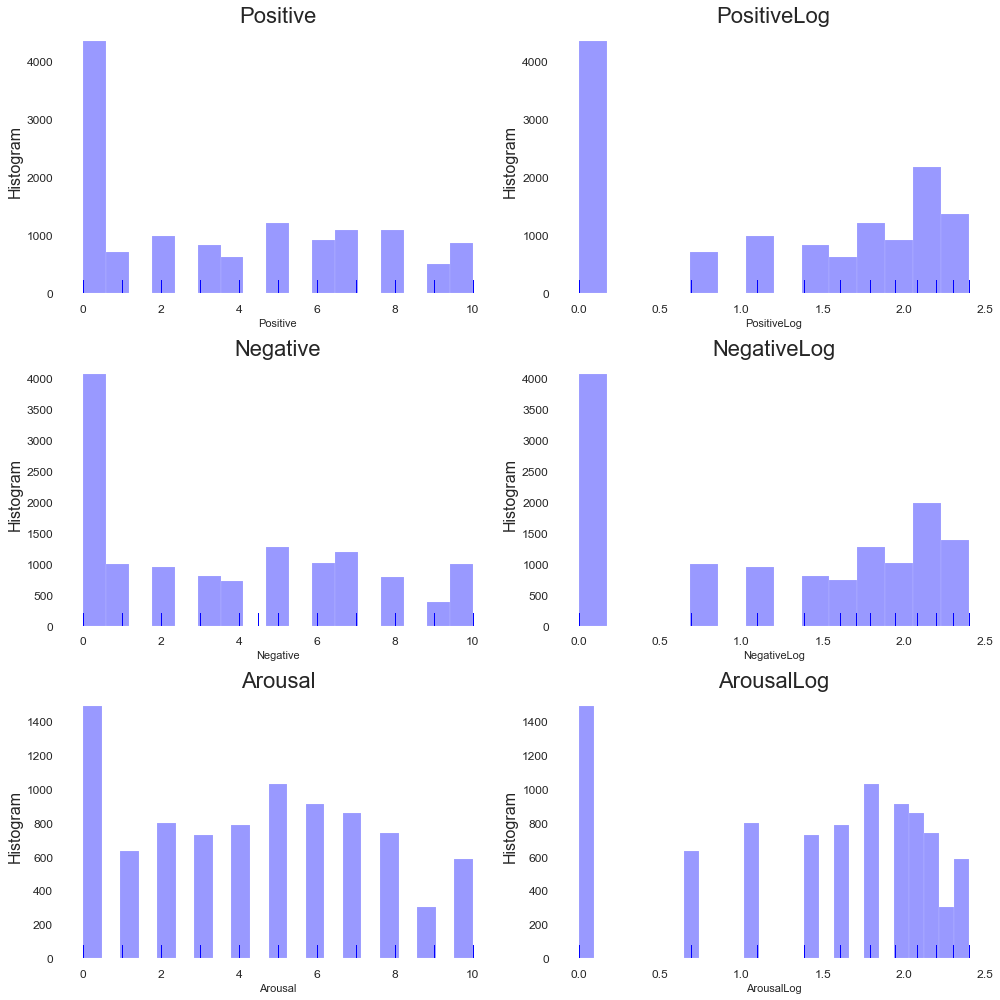

In [70]:
# Positive Emotion Ratings
posLog = np.log(model.Positive + 1)
model['PositiveLog'] = posLog

# Negative Emotion Ratings
negLog = np.log(model.Negative + 1)
model['NegativeLog'] = negLog

# Arousal Ratings
arLog = np.log(model.Arousal + 1)
model['ArousalLog'] = arLog

# Plot
transformed = ['Positive', 'PositiveLog', 'Negative', 'NegativeLog', 'Arousal', 'ArousalLog']
plt.figure(figsize=(14, 14))
for i, column in enumerate(transformed):
    plt.subplot(3, 2, i+1)
    sns.distplot(model[column], hist = True, rug = True, kde = False, color = "b")
    plt.title(column, size = 22)
    plt.ylabel('Histogram', fontsize=16)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# That didn't help -- delete the logged columns
model = model.drop(['PositiveLog', 'NegativeLog', 'ArousalLog'], axis=1)

**The transformation didn't help the skew so we return to the original values to aid in interpretability.**

## **3g. Impute missing values**

There are some new missing values (for example, when people completed the stimuli blocks but not the questionnaires, etc.) We will, once again, impute these missing values with the column median.

As discussed above, we will not impute the ***arousal*** values or the ***specific emotion values*(like Wonder and Sympathetic)**, as these values are missing because of the *a priori* study design.

In [71]:
View(pd.DataFrame(model.isnull().sum()))

# impute columns with missing values with the median for that column
colList = list(model.columns)
colList = [i for i in colList if i not in ('FixedID', 'Arousal')]
emotions = list(model.loc[:, 'Anger':'Neutral'].columns)
colList = [i for i in colList if i not in emotions]
model[colList] = model[colList].apply(lambda x: x.fillna(x.median()))

# check
View(pd.DataFrame(model.isnull().mean()*100))
    # only Arousal and specific emotions are > 0 -- good!

## **3h. Correlations**
We will look for high correlations that may lead to multicollinearity problems.

### Plot

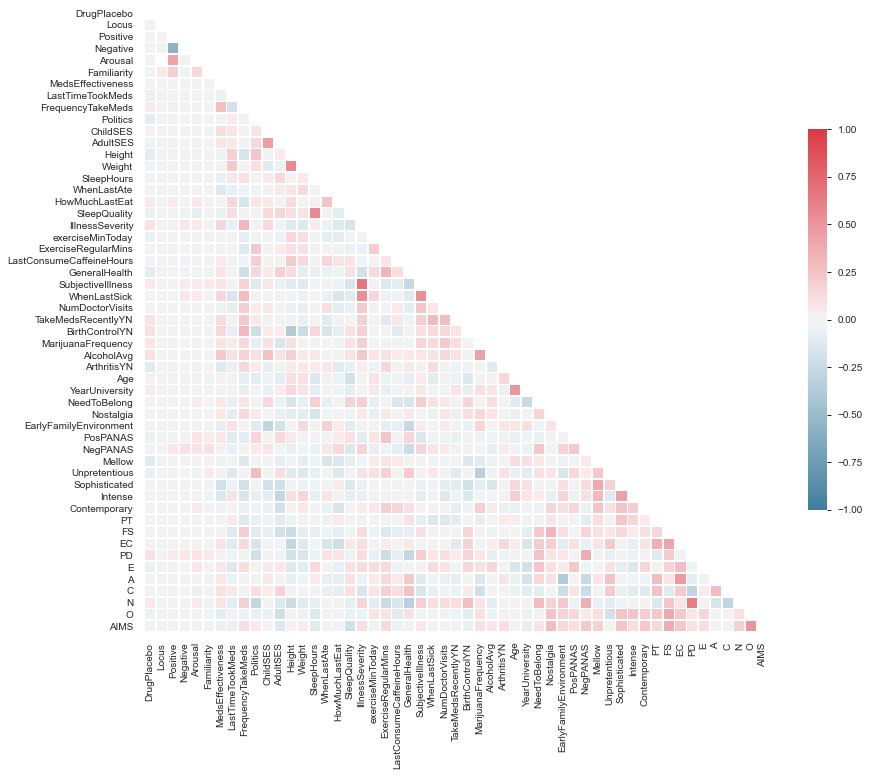

In [72]:
colList = list(model.columns)
colList.remove('FixedID')
colList = [i for i in colList if i not in emotions]

# don't look one-hot encoded values
colList = [ x for x in colList if "_" not in x ]
corr = model[colList].corr()
fig, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

**There are a few high correlations, but the variables seem to be mostly reasonably uncorrelated.**

**We will look for more details, next.**

### List high correlations

In [73]:
cor = model[colList].corr().abs().round(decimals=2)
corNew = cor.unstack()
corNew = corNew[(corNew != 1) & (corNew != 0)]
corNew = corNew.dropna()
corNew = corNew.sort_values(kind="quicksort", ascending = False)
corNew = pd.DataFrame(corNew)

print("maximum absolute value correlation: ", corNew.max()[0])
View(corNew)

maximum absolute value correlation:  0.68


**The highest correlation (absolute value) is 0.68, so we don't have to worry too much about multicollinearity.**

**Regularization (L1) will take care of that if needed.**

## **3i. View final dataframe and reset index**

### Summarize

In [74]:
model = model.sort_values(by=['FixedID'])
model.reset_index(inplace = True, drop = True) 
print("final model shape:", model.shape)
print("number of participants: ", len(model['FixedID'].unique()), "\n")

final model shape: (13218, 139)
number of participants:  244 



**The final dataframe consists of 139 features for 244 participants.**

### Profile

In [75]:
# pandas_profiling.ProfileReport(model)

# **4. Regression**
Now that we have completed feature engineering, we can use linear regression to investigate which features contribute to emotion ratings!

**Of course, we are the most interested in seeing whether those who took the drug give reduced (blunted) ratings, compared to those who took the placebo.**

**We will run a few models:**
1. Predicting *positive* emotion ratings
2. Predicting *negative* emotion ratings
3. Predicting *arousal* ratings
4. Predicting *all* emotion ratings

**For each of these models, we will run a few multiple linear regressions:**
1. Simple OLS model
2. OLS model with lasso regularization to penalize complexity
3. Hierarchical/mixed model (with participant ID as the random effect).
    
    *Using ID as a random effect allows us to account for differences among participants and hence perform a within-subjects analysis.*

## 4a. Predicting Positive Emotion Ratings

#### *Data prep*
We do not want every single column in these regression models. 

**The variables we do not need are the following:**
* Negative emotion atings and arousal ratings -- we are only focused on positive emotion ratings here.
* Specific stimulus names -- the features of each stimulus are encoded as Locus (perceived/induced), SoundType (music, speech, natural sounds), HighLow (arousal) and PosNeg (valence).
* Specific emotions -- these will be used in a separate analysis later on.

We also want to rename the Positive column to Ratings. This will allow us to combine the positive, negative, and arousal dataframes later on.

In [76]:
emotions = list(model.loc[:, 'Anger':'Neutral'].columns)

colList = list(model.columns)
colList = [i for i in colList if i not in ('Negative', 'Arousal')]
colList = [i for i in colList if i[:8] != 'Stimulus']
colList = [i for i in colList if i not in emotions]
    
positive = model[colList]
positive = positive.rename(columns={"Positive": "Ratings"})

print("entire dataframe shape: ", model.shape)
print("positive dataframe shape: ", positive.shape)

entire dataframe shape:  (13218, 139)
positive dataframe shape:  (13218, 77)


#### *X and Y*
* Y variable -- *Ratings*
* X variables -- *All other columns except FixedID (the random effect measured later)*

In [77]:
colList = list(positive.columns)
colList = [i for i in colList if i not in ('FixedID', 'Ratings')]

y = positive['Ratings']

X = positive[colList]
X = sm.add_constant(X)
View(pd.DataFrame(X.dtypes))

#### *OLS regression*
Note that interactions are already taken care of through the one-hot encoding

In [78]:
olsresult = sm.OLS(y, X).fit()
print(olsresult.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     226.5
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:56:08   Log-Likelihood:                -29848.
No. Observations:               13218   AIC:                         5.984e+04
Df Residuals:                   13147   BIC:                         6.037e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusions:
* **The measured variables explain 54% of the variance in positive emotion ratings (adjusted R^2 = 0.54)**
* **The ingestion of acetaminophen blunted ratings of positive emotions compared to the ingestion of a placebo.**

|	Name	|	Coefficient	|	p	|	Interpretation	|
|	------	|	------	|	------	|	------	|
| 	***DrugPlacebo***	| 	***-0.2338***	| 	***0***	| 	*Those who **took acetaminophen** rated positive emotions as **less intense** than those who took the placebo.* ***Namely, acetaminophen blunted the emotional responses.***	| 
| 	PosNeg_Positive	| 	2.9338	| 	0	| 	**Positively-valenced stimuli** resulted in comparatively **high** positive emotion ratings.	| 
| 	PosNeg_Negative	| 	-1.8991	| 	0	| 	**Negatively-valenced stimuli** resulted in comparatively **low** positive emotion ratings.	| 
| 	HighLow_High	| 	0.8216	| 	0	| 	Stimuli that exhibit **high arousal** resulted in comparatively **more intense** positive emotion ratings.	| 
| 	SoundType_Music	| 	0.7015	| 	0	| 	**Musical stimuli** resulted in comparatively **higher ratings of** positive emotion.	| 
| 	Familiarity	| 	0.4672	| 	0	| 	Those who are more **familiar** with the (musical) stimuli rated positive emotions as **more intense.**	| 
| 	A	| 	0.2752	| 	0	| 	Those who are more **agreeable** rated emotions as relatively **more positive** than those who score less high on this personality dimension.	| 
| 	PD	| 	0.2485	| 	0	| 	Those who score higher on the **Personal Distress component of empathy** rated emotions as relatively **more positive** than those who score less high on this trait.	| 
| 	FS	| 	-0.1584	| 	0	| 	Those who score higher on the **Fantasy component of empathy** rated emotions as relatively **less positive** than those who score less high on this trait.	| 
| 	Locus	| 	-0.1575	| 	0.001	| 	Compared to perceived emotion ratings, **induced emotion ratings** were **more positive**.	| 
| 	N	| 	-0.1498	| 	0	| 	Those who are more **neurotic** rated emotions as relatively **less positive** than those who score less high on this personality dimension.	| 
| 	Intense	| 	-0.1285	| 	0	| 	Those who **prefer "Intense" music** (Rock, Punk, Alternative, Heavy Metal) rated emotions as relatively **less positive** (broadly, in response to all stimuli) than those who do not like this genre of music.	| 
| 	E	| 	0.1282	| 	0	| 	Those who are more **extraverted** rated emotions as relatively **more positive** than those who score less high on this personality dimension.	| 
| 	Sophisticated	| 	0.1144	| 	0	| 	Those who **prefer "Sophisticated" music** (Blues, Jazz, Bluegrass, Folk, Classical, Gospel, Opera) rated emotions as relatively **more positive** (broadly, in response to all stimuli) than those who do not like this genre of music.	| 
| 	Nostalgia	| 	-0.0659	| 	0.001	| 	Those who scored high on **nostalgia** rated relatively **less intense** positive ratings (although this effect is small).	|



#### *OLS regression with lasso regularization*
There's no way to look at standard errors, p-values, R^2, etc. because the theory for these values is still being developed among statisticians.

In [79]:
lassomodel = sm.OLS(y, X)
lassoresult = lassomodel.fit_regularized('elastic_net', L1_wt = 1.0) 
    # L1_wt = 0.0 -- ridge (to 1.0 -- lasso)
View(pd.DataFrame(lassoresult.params))

#### Conclusions:
* **This didn't change very much from the original mode.**
* **This chart shows the "non-zero" variables from the original OLS --> these are the only (significant) features kept in the regularized model**
* **Note that I used an arbitrary cutoff of 0.1 coefficient value to count as significant.**

|	Features Remaining In the Model	|	OLS Coefficient	|	OLS **with lasso regularization** Coefficient	|
|	------	|	------	|	------	|
| 	***DrugPlacebo***	| 	***-0.2338***	| 	***-0.213441***	| 
| 	PosNeg_Positive	| 	2.9338	| 	2.679953	| 
| 	PosNeg_Negative	| 	-1.8991	| 	-2.152853	| 
| 	PosNeg_Neutral	| 	-0.3592	| 	-1.489466	| 
| 	Race_Other	| 	-0.7092	| 	-0.566435	| 
| 	Familiarity	| 	0.4672	| 	0.4724	| 
| 	PoliticalParty_other	| 	-1.0292	| 	-0.439776	| 
| 	SoundType_Music	| 	0.7015	| 	0.410356	| 
| 	Race_Asian	| 	0.3401	| 	0.401408	| 
| 	PoliticalParty_republican	| 	-0.8987	| 	-0.343314	| 
| 	HighLow_High	| 	0.8216	| 	0.304188	| 
| 	PreferredMeds_Other	| 	-0.9656	| 	-0.270893	| 
| 	Gender_male	| 	0.8519	| 	-0.262979	| 
| 	PD	| 	0.2485	| 	0.238791	| 
| 	TakeMedsRecentlyYN	| 	-0.1649	| 	-0.189407	| 
| 	Gender_female	| 	1.0504	| 	-0.179473	| 
| 	PreferredMeds_Acetaminophen	| 	-0.5405	| 	0.159463	| 
| 	Locus	| 	-0.1575	| 	-0.154902	| 
| 	PreferredMeds_Do Not Take Meds	| 	-0.7738	| 	-0.139533	| 
| 	N	| 	-0.1498	| 	-0.137826	| 
| 	FS	| 	-0.1584	| 	-0.134634	| 
| 	PoliticalParty_democrat	| 	-0.7095	| 	-0.124515	| 
| 	Intense	| 	-0.1285	| 	-0.11814	|

#### *Mixed Model*
FixedID (the participant ID numbers) will be used as the grouping variable (the random effect)

In [80]:
hierarchicalmodel = sm.MixedLM(y, X, positive['FixedID'])
hierarchicalresult = hierarchicalmodel.fit()
print(hierarchicalresult.summary())

                          Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           Ratings    
No. Observations:             13218             Method:                       REML       
No. Groups:                   244               Scale:                        4.9020     
Min. group size:              18                Likelihood:                   -29542.5375
Max. group size:              55                Converged:                    No         
Mean group size:              54.2                                                       
-----------------------------------------------------------------------------------------
                                 Coef.    Std.Err.    z    P>|z|    [0.025       0.975]  
-----------------------------------------------------------------------------------------
const                             24.794 743061.093  0.000 1.000 -1456348.186 1456397.774
DrugPlacebo                       -0

#### Conclusions:
* **The model did not converge**
* **Basically no features are significant in the mixed model (because they are so redundant with the questionnaire data)**

## 4b. Predicting Negative Emotion Ratings

#### *Data prep*

In [81]:
colList = list(model.columns)
colList = [i for i in colList if i not in ('Positive', 'Arousal')]
colList = [i for i in colList if i[:8] != 'Stimulus']
colList = [i for i in colList if i not in emotions]
    
negative = model[colList]
negative = negative.rename(columns={"Negative": "Ratings"})

print("entire dataframe shape: ", model.shape)
print("negative dataframe shape: ", negative.shape)

entire dataframe shape:  (13218, 139)
negative dataframe shape:  (13218, 77)


#### *X and Y*

In [82]:
colList = list(negative.columns)
colList = [i for i in colList if i not in ('FixedID', 'Ratings')]

y = negative['Ratings']

X = negative[colList]
X = sm.add_constant(X)
View(pd.DataFrame(X.dtypes))

#### *OLS regression*

In [83]:
olsresult = sm.OLS(y, X).fit()
print(olsresult.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     179.0
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:56:34   Log-Likelihood:                -30464.
No. Observations:               13218   AIC:                         6.107e+04
Df Residuals:                   13147   BIC:                         6.160e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusions:
* **The measured variables explain 49% of the variance in negative emotion ratings (adjusted R^2 = 0.49)**
* **The ingestion of acetaminophen blunted ratings of negative emotions compared to the ingestion of a placebo.**

|	Name	|	Coefficient	|	p	|	Interpretation	|
|	------	|	------	|	------	|	------	|
| 	***DrugPlacebo***	| 	***-0.1973***	| 	***0***	| 	*Those who **took acetaminophen** rated negative emotions as **less intense** than those who took the placebo.* ***Namely, acetaminophen blunted the emotional responses.***	| 
| 	PosNeg_Negative	| 	3.229	| 	0	| 	**Negatively-valenced stimuli** resulted in comparatively **high** negative emotion ratings.	| 
| 	PosNeg_Positive	| 	-1.5875	| 	0	| 	**Positively-valenced stimuli** resulted in comparatively **low** negative emotion ratings.	| 
| 	SoundType_Natural Sounds	| 	0.959	| 	0	| 	**Natural Sounds** resulted in comparatively **higher ratings** of negative emotion *(and its effect is comparatively large next to speech and especially compared to music)*	| 
| 	HighLow_High	| 	0.892	| 	0	| 	Stimuli that exhibit **high arousal** resulted in comparatively **more intense** negative emotion ratings.	| 
| 	HighLow_Low	| 	0.7495	| 	0	| 	Stimuli that exhibit **low arousal** resulted in comparatively **higher** negative emotion ratings *(but the effect is smaller than the high arousal music)*.	| 
| 	SoundType_Speech	| 	0.6445	| 	0	| 	**Speech** resulted in comparatively **higher ratings** of negative emotion *(and its effect is comparatively large with musical stimuli)*	| 
| 	SoundType_Music	| 	0.3946	| 	0.004	| 	**Musical stimuli** resulted in comparatively **higher ratings** of negative emotion *(but the effect is small compared to speech and natural sounds)*	| 
| 	Locus	| 	-0.2381	| 	0	| 	Compared to perceived emotion ratings, **induced emotion ratings** were **less negative**.	| 
| 	EC	| 	0.2329	| 	0	| 	Those who score higher on the **Empathic Concern component of empathy** rated emotions as relatively **more negative** than those who score less high on this trait.	| 
| 	PD	| 	0.226	| 	0	| 	Those who score higher on the **Personal Distress component of empathy** rated emotions as relatively **more negative** than those who score less high on this trait.	| 
| 	Intense	| 	-0.1078	| 	0	| 	Those who **prefer "Intense" music** (Rock, Punk, Alternative, Heavy Metal) rated emotions as relatively **less negative** (broadly, in response to all stimuli) than those who do not like this genre of music.	| 
| 	Unpretentious	| 	-0.0967	| 	0.001	| 	Those who **prefer "Unpretentious" music** (Pop, Country, Religious) rated emotions as relatively **less negative** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	| 
| 	N	| 	-0.0835	| 	0.047	| 	Those who are more **neurotic** rated emotions as relatively **more negative** than those who score less high on this personality dimension (although this effect is small).	| 
| 	Mellow	| 	0.0769	| 	0.007	| 	Those who **prefer "Mellow" music** (Dance/Electronica, New Age, World) rated emotions as relatively **more negative** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	| 
| 	Nostalgia	| 	-0.0428	| 	0.041	| 	Those who scored high on **nostalgia** rated relatively **less intense** negative ratings (although this effect is small).	|

#### *OLS regression with lasso regularization*

In [84]:
lassomodel = sm.OLS(y, X)
lassoresult = lassomodel.fit_regularized('elastic_net', L1_wt = 1.0) 
View(pd.DataFrame(lassoresult.params))

#### Conclusions:
* **This didn't change very much from the original mode.**
* **This chart shows the "non-zero" variables from the original OLS --> these are the only (significant) features kept in the regularized model**
* **Note that I used an arbitrary cutoff of 0.1 coefficient value to count as significant.**

|	Features Remaining In the Model	|	OLS Coefficient	|	OLS **with lasso regularization** Coefficient	|
|	------	|	------	|	------	|
| 	***DrugPlacebo***	| 	***-0.2338***	| 	***-0.170217***	| 
| 	PosNeg_Negative	| 	-1.8991	| 	2.784016	| 
| 	PosNeg_Positive	| 	2.9338	| 	-2.03266	| 
| 	PreferredMeds_Do Not Take Meds	| 	-0.7738	| 	-0.752959	| 
| 	PoliticalParty_other	| 	-1.0292	| 	-0.588811	| 
| 	Race_Other	| 	-0.7092	| 	-0.56928	| 
| 	PosNeg_Neutral	| 	-0.3592	| 	-0.552684	| 
| 	PoliticalParty_democrat	| 	-0.7095	| 	-0.357943	| 
| 	PoliticalParty_republican	| 	-0.8987	| 	-0.340561	| 
| 	SoundType_Music	| 	0.7015	| 	-0.262282	| 
| 	Race_Asian	| 	0.3401	| 	0.257602	| 
| 	Locus	| 	-0.1575	| 	-0.236797	| 
| 	TakeMedsRecentlyYN	| 	-0.1649	| 	-0.192641	| 
| 	Gender_female	| 	1.0504	| 	0.183484	| 
| 	Gender_male	| 	0.8519	| 	-0.183096	| 
| 	Race_Hispanic	| 	-0.2477	| 	0.172875	| 
| 	PreferredMeds_Other	| 	-0.9656	| 	-0.16225	| 
| 	HowMuchLastEat	| 	0.1088	| 	0.150585	| 
| 	PD	| 	0.2485	| 	0.146022	| 
| 	Intense	| 	-0.1285	| 	-0.119339	| 
| 	PreferredMeds_Acetaminophen	| 	-0.5405	| 	0.117664	| 
| 	WhenLastSick	| 	0.0635	| 	0.094308	| 
| 	N	| 	-0.1498	| 	-0.092503	| 
| 	Politics	| 	0.0839	| 	0.080004	| 
| 	A	| 	0.2752	| 	-0.074981	| 
| 	HighLow_High	| 	0.8216	| 	0.07116	| 
| 	PreferredMeds_Ibuprofen	| 	-0.6816	| 	0.063047	| 
| 	E	| 	0.1282	| 	-0.055616	| 
| 	ChildSES	| 	0.0483	| 	-0.049005	| 
| 	FS	| 	-0.1584	| 	-0.047957	| 
| 	NumDoctorVisits	| 	0.0922	| 	0.047311	| 
| 	Nostalgia	| 	-0.0659	| 	-0.046546	| 
| 	NegPANAS	| 	0.0219	| 	0.033516	| 
| 	AdultSES	| 	-0.0722	| 	0.030117	| 
| 	SleepHours	| 	-0.0782	| 	0.022598	| 
| 	Familiarity	| 	0.4672	| 	0.01509	| 
| 	PosPANAS	| 	0.0083	| 	0.011698	|

#### *Mixed Model*

In [85]:
hierarchicalmodel = sm.MixedLM(y, X, negative['FixedID'])
hierarchicalresult = hierarchicalmodel.fit()
print(hierarchicalresult.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Ratings    
No. Observations:            13218              Method:                        REML       
No. Groups:                  244                Scale:                         5.3771     
Min. group size:             18                 Likelihood:                    -30153.4846
Max. group size:             55                 Converged:                     No         
Mean group size:             54.2                                                         
------------------------------------------------------------------------------------------
                                Coef.    Std.Err.    z    P>|z|     [0.025       0.975]   
------------------------------------------------------------------------------------------
const                            6.683 2059769.340  0.000 1.000  -4037067.041  4037080.406
DrugPlacebo               

#### Conclusions:
* **The model did not converge**
* **Basically no features are significant in the mixed model (because they are so redundant with the questionnaire data)**

## 4c. Predicting Arousal Ratings

#### *Data prep*

In [86]:
colList = list(model.columns)
colList = [i for i in colList if i not in ('Positive', 'Negative')]
colList = [i for i in colList if i[:8] != 'Stimulus']
colList = [i for i in colList if i not in emotions]
    
arousal = model[colList]
arousal = arousal.rename(columns={"Arousal": "Ratings"})
print("arousal dataframe shape: ", arousal.shape)
arousal = arousal.dropna()

print("entire dataframe shape: ", model.shape)
print("arousal dataframe shape: ", arousal.shape)

arousal dataframe shape:  (13218, 77)
entire dataframe shape:  (13218, 139)
arousal dataframe shape:  (8880, 77)


#### *X and Y*
Note that we also delete the ***Locus*** (Perceived or Induced) column because all arousal ratings are related to perceived emotion.

In [87]:
colList = list(arousal.columns)
colList = [i for i in colList if i not in ('FixedID', 'Ratings')]

y = arousal['Ratings']

X = arousal[colList]
X = X.drop(columns=['Locus'])
X = sm.add_constant(X)
View(pd.DataFrame(X.dtypes))

#### *OLS regression*

In [88]:
olsresult = sm.OLS(y, X).fit()
print(olsresult.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     81.78
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:57:01   Log-Likelihood:                -20454.
No. Observations:                8880   AIC:                         4.105e+04
Df Residuals:                    8810   BIC:                         4.154e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusions:
* **The measured variables explain 39% of the variance in the arousal ratings (adjusted R^2 = 0.39)**
* **There was *no difference* in arousal ratings between those who took acetaminophen and those who took a placebo.**

|	Name	|	Coefficient	|	p	|	Interpretation	|
|	------	|	------	|	------	|	------	|
| 	HighLow_High	| 	2.4821	| 	0	| 	Stimuli that exhibit **high arousal** resulted in comparatively **more energetic** ratings.	| 
| 	PosNeg_Positive	| 	1.2796	| 	0	| 	**Positively-valenced stimuli** resulted in comparatively **high energy** ratings.	| 
| 	SoundType_Natural Sounds	| 	1.122	| 	0	| 	**Natural Sounds** resulted in comparatively **higher energy** ratings *(and its effect is comparatively large next to music and especially compared to speech, which is not significant)*	| 
| 	SoundType_Music	| 	0.748	| 	0	| 	**Musical stimuli** resulted in comparatively **higher energy** ratings *(compared to speech, which was non-significant)*	| 
| 	PosNeg_Negative	| 	0.7421	| 	0	| 	**Negatively-valenced stimuli** resulted in comparatively **higher energy**  ratings.	| 
| 	Familiarity	| 	0.6654	| 	0	| 	Those who are more **familiar** with the (musical) stimuli rated the stimuli as being **higher in energy.**	| 
| 	HighLow_Low	| 	-0.4604	| 	0.006	| 	Stimuli that exhibit **low arousal** resulted in comparatively **lower energy** ratings.	| 
| 	E	| 	0.2895	| 	0	| 	Those who are more **extraverted** rated emotions as relatively **more energetic** than those who score less high on this personality dimension.	| 
| 	C	| 	-0.2885	| 	0	| 	Those who are more **conscientious** rated emotions as relatively **less energetic** than those who score less high on this personality dimension.	| 
| 	PD	| 	0.2692	| 	0	| 	Those who score higher on the **Personal Distress component of empathy** rated emotions as relatively **more energetic** than those who score less high on this trait.	| 
| 	EC	| 	0.1969	| 	0.003	| 	Those who score higher on the **Empathic Concern component of empathy** rated emotions as relatively **more energetic** than those who score less high on this trait.	| 
| 	A	| 	0.1713	| 	0.009	| 	Those who are more **agreeable** rated emotions as relatively **more energetic** than those who score less high on this personality dimension.	| 
| 	FS	| 	-0.1671	| 	0.001	| 	Those who score higher on the **Fantasy component of empathy** rated emotions as relatively **less energetic** than those who score less high on this trait.	| 
| 	Unpretentious	| 	-0.1594	| 	0	| 	Those who **prefer "Unpretentious" music** (Pop, Country, Religious) rated emotions as relatively **less energetic** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	| 
| 	Contemporary	| 	0.1279	| 	0	| 	Those who **prefer "Contemporary" music** (Rap/Hip Hop, Soul/R&B, Funk, Reggae) rated emotions as relatively **more energetic** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	| 
| 	Sophisticated	| 	0.1047	| 	0.003	| 	Those who **prefer "Sophisticated" music** (Blues, Jazz, Bluegrass, Folk, Classical, Gospel, Opera) rated emotions as relatively **more energetic** (broadly, in response to all stimuli) than those who do not like this genre of music.	| 
| 	Nostalgia	| 	-0.0533	| 	0.037	| 	Those who scored high on **nostalgia** rated the stimuli aas being relatively **less energetic** than those who score low on this trait (although this effect is small).	|

#### *OLS regression with lasso regularization*

In [89]:
lassomodel = sm.OLS(y, X)
lassoresult = lassomodel.fit_regularized('elastic_net', L1_wt = 1.0) 
View(pd.DataFrame(lassoresult.params))

#### Conclusions:
* **This didn't change very much from the original mode.**
* **This chart shows the "non-zero" variables from the original OLS --> these are the only (significant) features kept in the regularized model**
* **Note that I used an arbitrary cutoff of 0.1 coefficient value to count as significant.**

|	Features Remaining In the Model	|	OLS Coefficient	|	OLS **with lasso regularization** Coefficient	|
|	------	|	------	|	------	|
| 	PosNeg_Neutral	| 	-0.3712	| 	-2.166824	| 
| 	HighLow_High	| 	2.4821	| 	1.47148	| 
| 	HighLow_Low	| 	-0.4604	| 	-1.47148	| 
| 	PosNeg_Positive	| 	1.2796	| 	0.865751	| 
| 	Familiarity	| 	0.6654	| 	0.686584	| 
| 	Race_Black	| 	0.5499	| 	0.609665	| 
| 	SoundType_Natural Sounds	| 	1.122	| 	0.589999	| 
| 	PoliticalParty_other	| 	-1.5415	| 	-0.542389	| 
| 	Gender_male	| 	1.01	| 	-0.517634	| 
| 	PreferredMeds_Do Not Take Meds	| 	-1.4631	| 	-0.470649	| 
| 	ArthritisYN	| 	0.3384	| 	0.393543	| 
| 	Gender_female	| 	1.1362	| 	-0.362125	| 
| 	PoliticalParty_libertarian	| 	-0.485	| 	0.351171	| 
| 	Race_Asian	| 	0.3715	| 	0.343275	| 
| 	PosNeg_Negative	| 	0.7421	| 	0.328635	| 
| 	PoliticalParty_republican	| 	-1.212	| 	-0.32835	| 
| 	PoliticalParty_democrat	| 	-1.203	| 	-0.315477	| 
| 	C	| 	-0.2885	| 	-0.312441	| 
| 	EC	| 	0.1969	| 	0.251219	| 
| 	PreferredMeds_Acetaminophen	| 	-0.7674	| 	0.217798	| 
| 	PreferredMeds_Other	| 	-1.2053	| 	-0.213326	| 
| 	SoundType_Music	| 	0.748	| 	0.208025	| 
| 	HowMuchLastEat	| 	0.1787	| 	0.201207	| 
| 	A	| 	0.1713	| 	-0.193694	| 
| 	FS	| 	-0.1671	| 	-0.180844	| 
| 	EarlyFamilyEnvironment	| 	-0.0971	| 	-0.172594	| 
| 	PD	| 	0.2692	| 	0.154598	| 
| 	AlcoholAvg	| 	0.1291	| 	0.144398	| 
| 	Unpretentious	| 	-0.1594	| 	-0.127286	| 
| 	E	| 	0.2895	| 	0.124883	| 
| 	Sophisticated	| 	0.1047	| 	0.105058	|

#### *Mixed Model*

In [90]:
hierarchicalmodel = sm.MixedLM(y, X, arousal['FixedID'])
hierarchicalresult = hierarchicalmodel.fit()
print(hierarchicalresult.summary())

                         Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           Ratings    
No. Observations:            8880              Method:                       REML       
No. Groups:                  240               Scale:                        5.1277     
Min. group size:             37                Likelihood:                   -20122.0205
Max. group size:             37                Converged:                    No         
Mean group size:             37.0                                                       
----------------------------------------------------------------------------------------
                                Coef.    Std.Err.    z    P>|z|    [0.025       0.975]  
----------------------------------------------------------------------------------------
const                           -1.845                                                  
DrugPlacebo                     -0.105       0.

#### Conclusions:
* **The model did not converge**
* **Basically no features are significant in the mixed model (because they are so redundant with the questionnaire data)**

## 4d. Predicting All Ratings

#### *Data prep*
Here, we combine the *positive*, *negative*, and *arousal* dataframes into a single dataframe.

In [91]:
# add column about rating types
positive['RatingType'] = "Positive"
negative['RatingType'] = "Negative"
arousal['RatingType'] = "Arousal"

# check shapes
print("positive shape:", positive.shape)
print("negative shape:", negative.shape)
print("arousal shape:", arousal.shape, "\n")

# make sure column names are the same
print("pos/neg colnames: ", positive.columns == negative.columns, "\n")
print("pos/ar colnames: ", positive.columns == arousal.columns, "\n")
print("ar/neg colnames: ", arousal.columns == negative.columns, "\n")

# rbind
alldata = pd.concat([positive, negative, arousal])
print("alldata shape:", alldata.shape)

# dummify RatingType
alldata = pd.get_dummies(alldata, columns=['RatingType'])

positive shape: (13218, 78)
negative shape: (13218, 78)
arousal shape: (8880, 78) 

pos/neg colnames:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] 

pos/ar colnames:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True

#### *X and Y*

In [92]:
colList = list(alldata.columns)
colList = [i for i in colList if i not in ('FixedID', 'Ratings')]

y = alldata['Ratings']

X = alldata[colList]
X = sm.add_constant(X)
View(pd.DataFrame(X.dtypes))

#### *OLS regression*

In [93]:
olsresult = sm.OLS(y, X).fit()
print(olsresult.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     50.46
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:57:19   Log-Likelihood:                -91076.
No. Observations:               35316   AIC:                         1.823e+05
Df Residuals:                   35243   BIC:                         1.829e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusions:
* **The measured variables explain 9% of the variance in overall emotion ratings (adjusted R^2 = 0.09)**
* **The ingestion of acetaminophen--overall--blunted ratings of positive emotions compared to the ingestion of a placebo.**
* **The low variance explained means that people used there is little similarities in how people used the three types of scales (positive emotions, negative emotions, and arousal).** 
* **It's likely that there's effects going in opposite directions--for example, people use the opposite criteria to judge positive and negative emotion ratings--so it makes sense the R^2 is much closer to 0.**
* **The order of the features (in terms of absolute values of the coefficients) is very similar to the order that they are entered into the equation during the regression. This hints that the feature importances can't be determined reliably.**

|	Name	|	Coefficient	|	p	|	Interpretation	|
|	------	|	------	|	------	|	------	|
| 	***DrugPlacebo***		***-0.1878***		***0***	| 	*Those who **took acetaminophen** rated emotions as **lower overall** compared to those who took the placebo.* ***Namely, acetaminophen blunted the emotional responses.***	| 
|	HighLow_High	|	1.2057	|	0	|	Stimuli that exhibit **high arousal** resulted in comparatively **higher overall ratings**.	|
|	RatingType_Arousal	|	0.8362	|	0	|	**Arousal ratings** were overall comparatively high in number (compared to positive and negative emotion ratings).	|
|	PosNeg_Positive	|	0.7715	|	0	|	**Positively-valenced stimuli** resulted in comparatively **higher overall ratings**.	|
|	PosNeg_Negative	|	0.6284	|	0	|	**Negatively-valenced stimuli** resulted in comparatively **higher overall ratings** (but not as much as positively-valenced stimuli).	|
|	SoundType_Natural Sounds	|	0.6139	|	0	|	**Natural Sounds** resulted in comparatively **higher overall ratings**(compared to music and especially compared to speech, which wasn't significant)*	|
|	SoundType_Music	|	0.5603	|	0	|	**Natural Sounds** resulted in comparatively **higher overall ratings**(compared to speech, which wasn't significant)*	|
|	Locus	|	-0.3237	|	0	|	Compared to perceived emotion ratings, **induced emotion ratings** were **lower in overall score**.	|
|	Familiarity	|	0.3066	|	0	|	Those who are more **familiar** with the (musical) stimuli rated stimuli **comparatively higher overall** compared to people less familiar with the music.	|
|	PD	|	0.2441	|	0	|	Those who score higher on the **Personal Distress component of empathy** rated emotions as relatively **higher overall** than those who score less high on this trait.	|
|	RatingType_Positive	|	0.207	|	0.03	|	**Positive emotion ratings** were overall comparatively high in number (compared to negative ratings).	|
|	HighLow_Low	|	0.1942	|	0.039	|	Stimuli that exhibit **low arousal** resulted in comparatively **high overall ratings** (but the effect is smaller than the high arousal music).	|
|	RatingType_Negative	|	0.1939	|	0.042	|	**Negative emotion ratings** were overall comparatively high in number (but low compared to arousal ratings and positive emotion ratings).	|
|	A	|	0.1491	|	0.001	|	Those who are more **agreeable** rated emotions as relatively **higher overall** than those who score less high on this personality dimension.	|
|	E	|	0.1284	|	0	|	Those who are more **extraverted** rated emotions as relatively **higher overall** than those who score less high on this personality dimension.	|
|	FS	|	-0.1174	|	0	|	Those who score higher on the **Fantasy component of empathy** rated emotions as relatively **lower overall** than those who score less high on this trait.	|
|	EC	|	0.1045	|	0.017	|	Those who score higher on the **Empathic Concern component of empathy** rated emotions as relatively **higher overall** than those who score less high on this trait.	|
|	N	|	-0.0967	|	0.004	|	Those who are more **neurotic** rated emotions as relatively **lower overall** than those who score less high on this personality dimension.	|
|	Unpretentious	|	-0.0901	|	0	|	Those who **prefer "Unpretentious" music** (Pop, Country, Religious) rated emotions as relatively **lower overall** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	|
|	Intense	|	-0.0838	|	0	|	Those who **prefer "Intense" music** (Rock, Punk, Alternative, Heavy Metal) rated emotions as relatively **lower overall** (broadly, in response to all stimuli) than those who do not like this genre of music.	|
|	Sophisticated	|	0.0832	|	0	|	Those who **prefer "Sophisticated" music** (Blues, Jazz, Bluegrass, Folk, Classical, Gospel, Opera) rated emotions as relatively **higher overall** (broadly, in response to all stimuli) than those who do not like this genre of music.	|
|	Contemporary	|	0.0599	|	0.01	|	Those who **prefer "Contemporary" music** (Rap/Hip Hop, Soul/R&B, Funk, Reggae) rated emotions as relatively **higher overall** (broadly, in response to all stimuli) than those who do not like this genre of music (although this effect is small).	|
|	Nostalgia	|	-0.0545	|	0.001	|	Those who scored high on **nostalgia** rated relatively **lower overall** (although this effect is small).	|

#### *OLS regression with lasso regularization*

In [94]:
lassomodel = sm.OLS(y, X)
lassoresult = lassomodel.fit_regularized('elastic_net', L1_wt = 1.0) 
View(pd.DataFrame(lassoresult.params))

#### Conclusions:
* **This didn't change very much from the original mode.**
* **This chart shows the "non-zero" variables from the original OLS --> these are the only (significant) features kept in the regularized model**
* **Note that I used an arbitrary cutoff of 0.1 coefficient value to count as significant.**

|	Features Remaining In the Model	|	OLS Coefficient	|	OLS **with lasso regularization** Coefficient	|
|	------	|	------	|	------	|
| 	***DrugPlacebo***	| 	***-0.1878***	| 	***-0.162255***	| 
| 	RatingType_Arousal	| 	0.8362	| 	0.871276	| 
| 	Gender_prefer not to answer	| 	0.8962	| 	-0.617293	| 
| 	PoliticalParty_other	| 	-1.3326	| 	-0.524402	| 
| 	HighLow_High	| 	1.2057	| 	0.505651	| 
| 	HighLow_Low	| 	0.1942	| 	-0.505651	| 
| 	PosNeg_Positive	| 	0.7715	| 	0.463598	| 
| 	PreferredMeds_Do Not Take Meds	| 	-1.3271	| 	-0.451093	| 
| 	PoliticalParty_republican	| 	-1.1059	| 	-0.343582	| 
| 	Race_Asian	| 	0.2579	| 	0.332973	| 
| 	Locus	| 	-0.3237	| 	-0.322413	| 
| 	PosNeg_Negative	| 	0.6284	| 	0.320646	| 
| 	Familiarity	| 	0.3066	| 	0.317096	| 
| 	ArthritisYN	| 	0.288	| 	0.314295	| 
| 	Gender_male	| 	1.2206	| 	-0.293518	| 
| 	PoliticalParty_democrat	| 	-1.0349	| 	-0.256109	| 
| 	RatingType_Positive	| 	0.207	| 	0.242152	| 
| 	Race_Other	| 	-0.4925	| 	-0.231538	| 
| 	RatingType_Negative	| 	0.1939	| 	0.229102	| 
| 	PreferredMeds_Other	| 	-1.1098	| 	-0.212399	| 
| 	PD	| 	0.2441	| 	0.182542	| 
| 	PoliticalParty_libertarian	| 	-0.5747	| 	0.178751	| 
| 	TakeMedsRecentlyYN	| 	-0.1478	| 	-0.167184	| 
| 	EC	| 	0.1045	| 	0.165425	| 
| 	SoundType_Natural Sounds	| 	0.6139	| 	0.158922	| 
| 	PreferredMeds_Acetaminophen	| 	-0.7306	| 	0.155727	| 
| 	HowMuchLastEat	| 	0.157	| 	0.145694	| 
| 	FS	| 	-0.1174	| 	-0.113215	| 
| 	AlcoholAvg	| 	0.1075	| 	0.106252	| 
| 	SoundType_Music	| 	0.5603	| 	0.10102	|

#### *Mixed Model*

In [95]:
# hierarchicalmodel = sm.MixedLM(y, X, alldata['FixedID'])
# hierarchicalresult = hierarchicalmodel.fit()
# print(hierarchicalresult.summary())

#### Conclusions:
* **The model did not converge --> the matrix was singular**
* **Basically no features are significant in the mixed model (because they are so redundant with the questionnaire data)**

## 4e. Predicting Drug vs. Placebo from a Logisitic Regression
In order to use people's ratings to predict whether they were given the drug or a placebo, we have to change the data back to a wide format. 

Namely, there should be one row for each participant.

### Turn one-hot encoded stimuli back into a single column
First, we have to turn all the one-hot encoded values back to a single categorical column.

In [112]:
colList = list(model.columns)
new = model[colList]
print(model.shape)
print(new.shape)

# find instances of where "1" is in a cell in the dataframe
row, col = np.where(new.values == 1)

# replace the column index with the column name
colname = new.columns[col]

# make a dataframe of all these values
vals = pd.DataFrame()
vals['row'] = row
vals['cols'] = colname

(13218, 139)
(13218, 139)


#### *Stimulus*

In [113]:
stimList = list(vals['cols'])
stimList = [i for i in stimList if i[:8] == 'Stimulus']
stim = vals[vals['cols'].isin(stimList)]
stim = stim.set_index('row')
new['Stimulus'] = stim['cols']
new['Stimulus'] = new['Stimulus'].replace(r'^.*Stimulus_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "Stimulus_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *PosNeg*

In [114]:
posnegList = list(vals['cols'])
posnegList = [i for i in posnegList if i[:6] == 'PosNeg']
posneg = vals[vals['cols'].isin(posnegList)]
posneg = posneg.set_index('row')
new['PosNeg'] = posneg['cols']
new['PosNeg'] = new['PosNeg'].replace(r'^.*PosNeg_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "PosNeg_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *HighLow*

In [115]:
highlowList = list(vals['cols'])
highlowList = [i for i in highlowList if i[:7] == 'HighLow']
highlow = vals[vals['cols'].isin(highlowList)]
highlow = highlow.set_index('row')
new['HighLow'] = highlow['cols']
new['HighLow'] = new['HighLow'].replace(r'^.*HighLow_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "HighLow_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *SoundType*

In [116]:
soundtypeList = list(vals['cols'])
soundtypeList = [i for i in soundtypeList if i[:9] == 'SoundType']
soundtype = vals[vals['cols'].isin(soundtypeList)]
soundtype = soundtype.set_index('row')
new['SoundType'] = soundtype['cols']
new['SoundType'] = new['SoundType'].replace(r'^.*SoundType_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "SoundType_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *PoliticalParty*

In [117]:
ppList = list(vals['cols'])
ppList = [i for i in ppList if i[:14] == 'PoliticalParty']
pp = vals[vals['cols'].isin(ppList)]
pp = pp.set_index('row')
new['PoliticalParty'] = pp['cols']
new['PoliticalParty'] = new['PoliticalParty'].replace(r'^.*PoliticalParty_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "PoliticalParty_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *PreferredMeds*

In [118]:
medsList = list(vals['cols'])
medsList = [i for i in medsList if i[:13] == 'PreferredMeds']
meds = vals[vals['cols'].isin(medsList)]
meds = meds.set_index('row')
new['PreferredMeds'] = meds['cols']
new['PreferredMeds'] = new['PreferredMeds'].replace(r'^.*PreferredMeds_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "PreferredMeds_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *Gender*

In [119]:
genderList = list(vals['cols'])
genderList = [i for i in genderList if i[:6] == 'Gender']
gender = vals[vals['cols'].isin(genderList)]
gender = gender.set_index('row')
new['Gender'] = gender['cols']
new['Gender'] = new['Gender'].replace(r'^.*Gender_', '', regex=True)

# delete stimulus one-hot encoded cols
newList = list(new.columns)
newList = [ x for x in newList if "Gender_" not in x ]
new = new[newList]

# reset index
new.reset_index(inplace = True, drop = True) 

#### *Rearrange columns*

In [120]:
new = new.iloc[:, np.r_[0,1,82:86,2:82,86:89]]
print(new.shape)
View(new.head(1).T)

(13218, 89)


### Separate into perceived/induced/questionnaires
We need to separate the three study components (perceived emotion ratings, induced emotion ratings, and questionnaire responses) into separate dataframes.

**Each of these dataframes should have 244 rows--one for each participant.**

#### *Questionnaires*
First, we need to pull out all of the questions from the questionnaires.

In [187]:
wideQ = new.loc[:,'MedsEffectiveness':'Gender']
wideQ['FixedID'] = pd.to_numeric(new['FixedID'])
wideQ['DrugPlacebo'] = new['DrugPlacebo']
wideQ = wideQ.iloc[:, np.r_[55,56,0:55]]
wideQ = wideQ.drop_duplicates()
wideQ = wideQ.sort_values(by=['FixedID'])
wideQ.reset_index(inplace = True, drop = True) 
print("wideQ shape: ", wideQ.shape)

wideQ.head(5)

wideQ shape:  (244, 57)


FixedID  DrugPlacebo  MedsEffectiveness  LastTimeTookMeds  \
0      1.0            0                4.0            1095.0   
1      2.0            1                4.0             365.0   
2      3.0            0                1.0               1.0   
3      4.0            1                1.0            3650.0   
4      5.0            0                5.0             180.0   

   FrequencyTakeMeds  Politics  ChildSES  AdultSES  Height  Weight  ...    O  \
0                1.0       3.0  4.666667  4.000000    73.0   163.0  ...  3.0   
1                4.0       5.0  6.000000  5.333333    69.0   168.0  ...  3.9   
2                5.0       3.0  4.333333  2.666667    71.0   145.0  ...  4.6   
3                1.0       3.0  5.333333  6.000000    71.0   168.0  ...  3.3   
4                4.0       4.0  4.666667  5.666667    72.0   160.0  ...  4.4   

    AIMS  Race_Asian  Race_Black  Race_Hispanic  Race_Other  Race_White  \
0   98.0           1           0              0           0           0   
1  114.0           0           0              0           0           1   
2  105.0           0           0              0           0           1   
3  102.0           1           0              0           0           0   
4  158.0           0           1              0           0           0   

   PoliticalParty     PreferredMeds  Gender  
0           other             Other    male  
1     libertarian             Other    male  
2           other         Ibuprofen    male  
3        democrat  Do Not Take Meds    male  
4     libertarian         Ibuprofen    male  

[5 rows x 57 columns]

#### *Perceived*
Next, we need to extract all of the perceived emotion information. 

**We ideally want there to be several columns per stimulus. For Fear Music 1, for example:**
* Perceived_Positive_Fear Music 1
* Perceived_Negative_Fear Music 1
* Perceived_Arousal_Fear Music 1
* Perceived_Familiarity_Fear Music 1


In order to create these columns, we need to first stack all of the ratings (positive, negative, arousal, familiarity) on top of each other under a single column: ***Ratings***. That's what is done here.

In [188]:
# positive
p = new[new['Locus'] == 0]
p = p[['FixedID', 'DrugPlacebo', 'Stimulus', 'Positive']]
p['FixedID'] = pd.to_numeric(p['FixedID'])
p['Locus'] = "Perceived"
p['RatingType'] = "Positive"
p = p.rename(columns={"Positive": "Rating"})

# negative
n = new[new['Locus'] == 0]
n = n[['FixedID', 'DrugPlacebo', 'Stimulus', 'Negative']]
n['FixedID'] = pd.to_numeric(n['FixedID'])
n['Locus'] = "Perceived"
n['RatingType'] = "Negative"
n = n.rename(columns={"Negative": "Rating"})

# arousal
a = new[new['Locus'] == 0]
a = a[['FixedID', 'DrugPlacebo', 'Stimulus', 'Arousal']]
a['FixedID'] = pd.to_numeric(a['FixedID'])
a['Locus'] = "Perceived"
a['RatingType'] = "Arousal"
a = a.rename(columns={"Arousal": "Rating"})

# familiarity
f = new[new['Locus'] == 0]
f = f[['FixedID', 'DrugPlacebo', 'Stimulus', 'Familiarity']]
f['FixedID'] = pd.to_numeric(f['FixedID'])
f['Locus'] = "Perceived"
f['RatingType'] = "Familiarity"
f = f.rename(columns={"Familiarity": "Rating"})

# rbind
wideP = pd.concat([p, n, a, f])
wideP = wideP.sort_values(by=['FixedID'])
wideP.reset_index(inplace = True, drop = True) 

print("wideP:", wideP.shape)
wideP.head(5)

wideP: (35520, 6)


FixedID  DrugPlacebo          Stimulus  Rating      Locus   RatingType
0      1.0            0  Neutral Speech 2     1.0  Perceived     Positive
1      1.0            0    Tender Music 5     0.0  Perceived  Familiarity
2      1.0            0     Fear Speech 1     0.0  Perceived  Familiarity
3      1.0            0    Happy Speech 3     0.0  Perceived  Familiarity
4      1.0            0  Neutral Speech 1     0.0  Perceived  Familiarity

#### *Induced*
We repeat the above process for induced emotion. 

*Note that there are no arousal ratings for induced emotion.*

In [189]:
# positive
p = new[new['Locus'] == 1]
p = p[['FixedID', 'DrugPlacebo', 'Stimulus', 'Positive']]
p['FixedID'] = pd.to_numeric(p['FixedID'])
p['Locus'] = "Induced"
p['RatingType'] = "Positive"
p = p.rename(columns={"Positive": "Rating"})

# negatikve
n = new[new['Locus'] == 1]
n = n[['FixedID', 'DrugPlacebo', 'Stimulus', 'Negative']]
n['FixedID'] = pd.to_numeric(n['FixedID'])
n['Locus'] = "Induced"
n['RatingType'] = "Negative"
n = n.rename(columns={"Negative": "Rating"})

# familiarity
f = new[new['Locus'] == 1]
f = f[['FixedID', 'DrugPlacebo', 'Stimulus', 'Familiarity']]
f['FixedID'] = pd.to_numeric(f['FixedID'])
f['Locus'] = "Induced"
f['RatingType'] = "Familiarity"
f = f.rename(columns={"Familiarity": "Rating"})

# rbind
wideI = pd.concat([p, n, f])
wideI = wideI.sort_values(by=['FixedID'])
wideI.reset_index(inplace = True, drop = True) 

print("wideI:", wideI.shape)
wideI.head(5)

wideI: (13014, 6)


FixedID  DrugPlacebo                                 Stimulus  Rating  \
0      1.0            0                             Fear Music 2     2.0   
1      1.0            0                           Tender Music 1     6.0   
2      1.0            0                            Happy Music 2     3.0   
3      1.0            0                            Neutral Human     6.0   
4      1.0            0  Positive-Valence High-Arousal Non-human     3.0   

     Locus RatingType  
0  Induced   Positive  
1  Induced   Negative  
2  Induced   Negative  
3  Induced   Negative  
4  Induced   Negative

#### *Make Wide P and I dataframe*
Next, we stack the induced and perceived dataframes on top of each other. Then, we unstack them in order to make the wide dataframe. 

The resulting dataframe will have 244 rows--one for each participant.

**For each stimulus, there are 7 ratings. For example:**
* Induced_Positive_Fear Music 1
* Induced_Negative_Fear Music 1
* Induced_Familiarity_Fear Music 1
* Perceived_Positive_Fear Music 1
* Perceived_Negative_Fear Music 1
* Perceived_Arousal_Fear Music 1
* Perceived_Familiarity_Fear Music 1

In [190]:
# rbind
widePI = pd.concat([wideP, wideI])
widePI = widePI.sort_values(by=['FixedID'])
widePI.reset_index(inplace = True, drop = True) 

# unstack
widePI = widePI.set_index(['FixedID', 'DrugPlacebo', 'Stimulus', 'RatingType', 'Locus']).unstack(level = 4)
widePI.columns = pd.Index(widePI.columns).str.join("_")
widePI = pd.DataFrame(widePI.to_records())

widePI = widePI.set_index(['FixedID', 'DrugPlacebo', 'Stimulus', 'RatingType']).unstack(level = 3)
widePI.columns = pd.Index(widePI.columns).str.join("_")
widePI = pd.DataFrame(widePI.to_records())

widePI = widePI.set_index(['FixedID', 'DrugPlacebo', 'Stimulus']).unstack(level = 2)
widePI.columns = pd.Index(widePI.columns).str.join("_")
widePI = pd.DataFrame(widePI.to_records())

# remove "Rating_" from columns
widePI.columns = widePI.columns.str.lstrip('Rating_')

# examine
nans = pd.DataFrame(widePI.isnull().sum())
nans[0].unique()

# delete columns with all nans (means they weren't part of the study)
widePI = widePI.dropna(thresh=len(widePI)-5, axis=1)
View(pd.DataFrame(widePI.isnull().sum()))

# look at rest of nans
null = widePI[widePI.isnull().any(axis=1)]
print("null shape:", null.shape)
View(null.T)
    # nans all come from 7 participants: 
    # 4 did the induced, but not perceived block and 3 did the perceived, but not induced block
    
# impute missing values with median for that column
colList = list(widePI.columns)
colList = [i for i in colList if i not in ('FixedID')]
widePI[colList] = widePI[colList].apply(lambda x: x.fillna(x.median()))

# check
null = pd.DataFrame(widePI.isnull().sum() > 0)
print("null values: ", null[null[0] == True])
    # no missing values now
print("widePI shape:", widePI.shape)

# reset indices
widePI.reset_index(inplace = True, drop = True) 
widePI.head(5)

null shape: (7, 204)
null values:  Empty DataFrame
Columns: [0]
Index: []
widePI shape: (244, 204)


FixedID  DrugPlacebo  Induced_Familiarity_Fear Music 1  \
0      1.0            0                               0.0   
1      2.0            1                               0.0   
2      3.0            0                               0.0   
3      4.0            1                               2.0   
4      5.0            0                               0.0   

   Induced_Familiarity_Fear Music 2  Induced_Familiarity_Happy Music 1  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               1.0                                1.0   
4                               0.0                                0.0   

   Induced_Familiarity_Happy Music 2  \
0                                2.0   
1                                0.0   
2                                0.0   
3                                2.0   
4                                0.0   

   Induced_Familiarity_Negative-Valence High-Arousal Human  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Induced_Familiarity_Negative-Valence High-Arousal Non-human  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Induced_Familiarity_Negative-Valence Low-Arousal Human  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   Induced_Familiarity_Negative-Valence Low-Arousal Non-human  ...  \
0                                                0.0           ...   
1                                                0.0           ...   
2                                                0.0           ...   
3                                                0.0           ...   
4                                                0.0           ...   

   Perceived_Positive_Sad Music 3  Perceived_Positive_Sad Speech 1  \
0                             4.0                              5.0   
1                             5.0                              0.0   
2                             1.0                              0.0   
3                             5.0                              3.0   
4                             1.0                              0.0   

   Perceived_Positive_Sad Speech 2  Perceived_Positive_Sad Speech 3  \
0                              0.0                              4.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              2.0                              1.0   
4                              0.0                              1.0   

   Perceived_Positive_Tender Music 1  Perceived_Positive_Tender Music 2  \
0                                7.0                                5.0   
1                                5.0                                8.0   
2                                3.0                                4.0   
3                                7.0                                7.0   
4                                6.0                                4.0   

   Perceived_Positive_Tender Music 3  Perceived_Positive_Tender Music 4  \
0                 

#### *Combine Wide Questionnaires, Perceived, and Induced into one dataframe*
Finally, we create the wide dataframe with info about the questionnaires, perceived, and induced blocks.

In [195]:
# check that the number of rows (which is the number of participants) is the same
print("shapes equal? ", wideQ.shape[0] == widePI.shape[0])

# merge
wide = pd.merge(wideQ, widePI, on=['FixedID', 'DrugPlacebo'])
print("wide shape: ", wide.shape)
wide.head(5)

shapes equal?  True
wide shape:  (244, 259)


FixedID  DrugPlacebo  MedsEffectiveness  LastTimeTookMeds  \
0      1.0            0                4.0            1095.0   
1      2.0            1                4.0             365.0   
2      3.0            0                1.0               1.0   
3      4.0            1                1.0            3650.0   
4      5.0            0                5.0             180.0   

   FrequencyTakeMeds  Politics  ChildSES  AdultSES  Height  Weight  ...  \
0                1.0       3.0  4.666667  4.000000    73.0   163.0  ...   
1                4.0       5.0  6.000000  5.333333    69.0   168.0  ...   
2                5.0       3.0  4.333333  2.666667    71.0   145.0  ...   
3                1.0       3.0  5.333333  6.000000    71.0   168.0  ...   
4                4.0       4.0  4.666667  5.666667    72.0   160.0  ...   

   Perceived_Positive_Sad Music 3  Perceived_Positive_Sad Speech 1  \
0                             4.0                              5.0   
1                             5.0                              0.0   
2                             1.0                              0.0   
3                             5.0                              3.0   
4                             1.0                              0.0   

   Perceived_Positive_Sad Speech 2  Perceived_Positive_Sad Speech 3  \
0                              0.0                              4.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              2.0                              1.0   
4                              0.0                              1.0   

   Perceived_Positive_Tender Music 1  Perceived_Positive_Tender Music 2  \
0                                7.0                                5.0   
1                                5.0                                8.0   
2                                3.0                                4.0   
3                                7.0                                7.0   
4                                6.0                                4.0   

   Perceived_Positive_Tender Music 3  Perceived_Positive_Tender Music 4  \
0                                6.0                                4.0   
1                               10.0                               10.0   
2                                2.0                                1.0   
3                                6.0                                5.0   
4                                7.0                                4.0   

   Perceived_Positive_Tender Music 5  Perceived_Positive_Tender Music 6  
0                                5.0                                5.0  
1                               10.0                                5.0  
2                                4.0                                2.0  
3                                6.0                                7.0  
4                                7.0                                3.0  

[5 rows x 259 columns]

### Logistic Regression predicting Drug vs. Placebo
Now we can perform logistic regression, with DrugPlacebo as the dependent variable.

#### *Correlations*
Examining correlations for multicollinearity purposes.

In [192]:
colList = list(wide.columns)
colList.remove('FixedID')

cor = wide[colList].corr().abs().round(decimals=2)
corNew = cor.unstack()
corNew = corNew[(corNew != 1) & (corNew != 0)]
corNew = corNew.dropna()
corNew = corNew.sort_values(kind="quicksort", ascending = False)
corNew = pd.DataFrame(corNew)
View(corNew)

#### *Regression with L1 regularization*
Because there's so many columns (especially compared to rows), we need to use a regularization parameter. L1 regularization is the best fit, since it can fit feature values to 0.

In [203]:
# x and y
wide = pd.get_dummies(wide, columns=['Gender', 'PoliticalParty', 'PreferredMeds'])
wide = wide.astype(np.float64)
colList = list(wide.columns)
colList = [i for i in colList if i not in ('FixedID', 'DrugPlacebo')]

X = wide[colList]
X = sm.add_constant(X)
y = wide['DrugPlacebo']
    
# # logistic regression with L1 regularization
# lassomodel = sm.Logit(y, X)
# lassoresult = lassomodel.fit_regularized(method = 'l1') 
# View(pd.DataFrame(lassoresult.params))

#### Conclusions:
* **The model did not converge, even with regularization**
* **The matrix was singular, indicating that some features perfectly predict others**
* **Therefore, the logistic regression cannot be carried out in this forma**


 # **3. Are Emotion Terms Used Differently**
The last goal of this analysis is to test whether those who ingested acetaminophen and those who took a placebo believe the same emotions apply to the stimuli.

**Recall that participants were asked to answer the following questions about the specific emotions:**
* Identify which emotion(s) the audio file [*represents* or *makes you feel*] by checking the appropriate emotion(s) from the following list. You may select as few or as many as you like
* Given this list of emotion terms you chose, which one(s), if any, strongly apply?

**These responses were coded on a 3-point scale:**
* Does not apply = 0
* Applies = 1
* Strongly applies = 2

**We will investigate this question graphically.**

## **3a. Make dataframe**
First we need to make a dataframe with all the specific emotion ratings.

In [215]:
emotionsList = [i for i in list(new.columns) if i not in ('FixedID', 'EarlyFamilyEnvironment', 'Gender', 'PoliticalParty', 'PreferredMeds')]
emotions = new[emotionsList]
emotions = emotions.drop(columns = list(emotions.loc[:, 'MedsEffectiveness':'YearUniversity'].columns))
emotions = emotions.drop(columns = list(emotions.loc[:, 'Race_Asian':'Race_White'].columns))

# rename for convenience
emotions['DrugPlacebo'].replace(0, "Placebo", inplace=True)
emotions['DrugPlacebo'].replace(1, "Drug", inplace=True)
emotions['Locus'].replace(0, "Perceived", inplace=True)
emotions['Locus'].replace(1, "Induced", inplace=True)

# Make arrays for graphs
perceived = emotions[emotions['Locus']=="Perceived"]
induced = emotions[emotions['Locus']=="Induced"]

print("perceived shape: ", perceived.shape)
print("induced shape: ", induced.shape)
print("emotions shape: ", emotions.shape)

View(emotions.head(5))

perceived shape:  (8880, 52)
induced shape:  (4338, 52)
emotions shape:  (13218, 52)


## **3b. Plot distributions of Drug vs Placebo**
In order to compare the specific emotions rated by those who took the drug vs. those who took the placebo, an exploratory graph can give us a lot of information. We will first do this with the perceived emotion ratings and then with the induced emotion ratings.

### Perceived Emotion
#### *Dataframe creation*
There were fewer emotions examined in the perceived emotions section. We will delete the ones not studied first.

In [218]:
cols = list(perceived.loc[:, 'Anger':'Neutral'].columns)
notstudied = pd.DataFrame(perceived.isnull().mean()*100)
notstudied = notstudied[notstudied[0] > 0]
delete = list(notstudied.index)
perceived = perceived.drop(columns = list(notstudied.index))

placebo = perceived[perceived['DrugPlacebo']=="Placebo"]
drug = perceived[perceived['DrugPlacebo']=="Drug"]

#### *Means*
Examine the means of emotions from drug conditions vs. placebo conditions.

*Note: The possible range is from 0-2, NOT from 0-1!*

In [223]:
meansP = pd.DataFrame()
meansP['Drug'] = drug[cols].mean().round(2)
meansP['Placebo'] = placebo[cols].mean().round(2)
meansP.T

Anger  Bored  Disgusted  Excited  Fearful  Grieved  Happy  \
Drug       0.0   0.07       0.06     0.32     0.32     0.13   0.34   
Placebo    0.0   0.08       0.05     0.30     0.31     0.12   0.33   

         Invigorated  Relaxed   Sad  Surprised  Tender  Neutral  
Drug            0.13     0.27  0.25       0.19    0.11     0.23  
Placebo         0.12     0.27  0.23       0.19    0.11     0.23

#### *Percents*
Examine the percent of time the emotion term applipercent of time the emotion term applies or strongly applieses or strongly applies to the stimuli.

In [224]:
cols = list(perceived.loc[:, 'Anger':'Neutral'].columns)

percentAppliesP = pd.DataFrame()
for column in cols:
    percentAppliesP.loc[column, 'Drug'] = 100 - (len(drug[column].loc[drug[column] == 0])/len(drug)*100)
    percentAppliesP.loc[column, 'Placebo'] = 100 - (len(placebo[column].loc[placebo[column] == 0])/len(placebo)*100)
percentAppliesP.T

Anger     Bored  Disgusted    Excited    Fearful   Grieved  \
Drug       0.0  4.623632   4.645968  20.348448  20.303775  9.157918   
Placebo    0.0  5.677947   3.497615  19.486714  19.327731  8.289802   

             Happy  Invigorated    Relaxed        Sad  Surprised    Tender  \
Drug     23.051150     9.693992  17.310699  16.149207  13.647532  8.018763   
Placebo  22.711787     8.539632  16.715876  14.467409  13.059278  7.903702   

           Neutral  
Drug     13.535850  
Placebo  13.309107

#### *Summary Table*
**Next, we will make a summary table comparing the following features of the emotions:**
* Sum of the emotion terms (for each emotion, summing the 0s, 1s, and 2s)
* Mean of the emotion terms (with a possible range of 0-2)
* The SD of the emotion terms
* The percent of people who said each term "Applies" to the stimuli
* The percent of people who said each term "Strongly applies" to the stimuli
* Whether the person doing the ratings ingested the drug or placebo
* The emotion in question


In [222]:
placeboSummary = pd.DataFrame()
placeboSummary['Sum'] = placebo[cols].sum()
placeboSummary['Mean'] = placebo[cols].mean()
placeboSummary['SD'] = placebo[cols].std()

for column in cols:
    placeboSummary.loc[column, 'Does Not Apply'] = len(placebo[column].loc[placebo[column] == 0])/len(placebo)*100
    placeboSummary.loc[column, 'Applies'] = len(placebo[column].loc[placebo[column] == 1])/len(placebo)*100
    placeboSummary.loc[column, 'Strongly Applies'] = len(placebo[column].loc[placebo[column] == 2])/len(placebo)*100

placeboSummary['DrugPlacebo'] = "Placebo"
placeboSummary['Emotion'] = placeboSummary.index

# make drug summary table
drugSummary = pd.DataFrame()
drugSummary['Sum'] = drug[cols].sum()
drugSummary['Mean'] = drug[cols].mean()
drugSummary['SD'] = drug[cols].std()

for column in cols:
    drugSummary.loc[column, 'Does Not Apply'] = len(drug[column].loc[drug[column] == 0])/len(drug)*100
    drugSummary.loc[column, 'Applies'] = len(drug[column].loc[drug[column] == 1])/len(drug)*100
    drugSummary.loc[column, 'Strongly Applies'] = len(drug[column].loc[drug[column] == 2])/len(drug)*100

drugSummary['DrugPlacebo'] = "Drug"
drugSummary['Emotion'] = drugSummary.index

# rbind
perceivedSummary = pd.concat([placeboSummary, drugSummary])
print("perceivedSummary shape:", perceivedSummary.shape)
print(drugSummary.shape[0] + placeboSummary.shape[0])

# transform to long format
perceivedSummary = pd.melt(perceivedSummary, id_vars=['Emotion', 'DrugPlacebo', 'Mean', 'SD'], 
                           value_vars=['Applies', 'Strongly Applies'])

perceivedSummary.sample(5)

perceivedSummary shape: (26, 8)
26


Emotion DrugPlacebo      Mean        SD          variable     value
12    Neutral     Placebo  0.229843  0.608772           Applies  3.633886
27      Bored     Placebo  0.084261  0.363529  Strongly Applies  2.748126
23  Surprised        Drug  0.190083  0.511101           Applies  8.286799
50     Tender        Drug  0.111459  0.402012  Strongly Applies  3.127094
4     Fearful     Placebo  0.311379  0.671362           Applies  7.517602

#### *Plot*

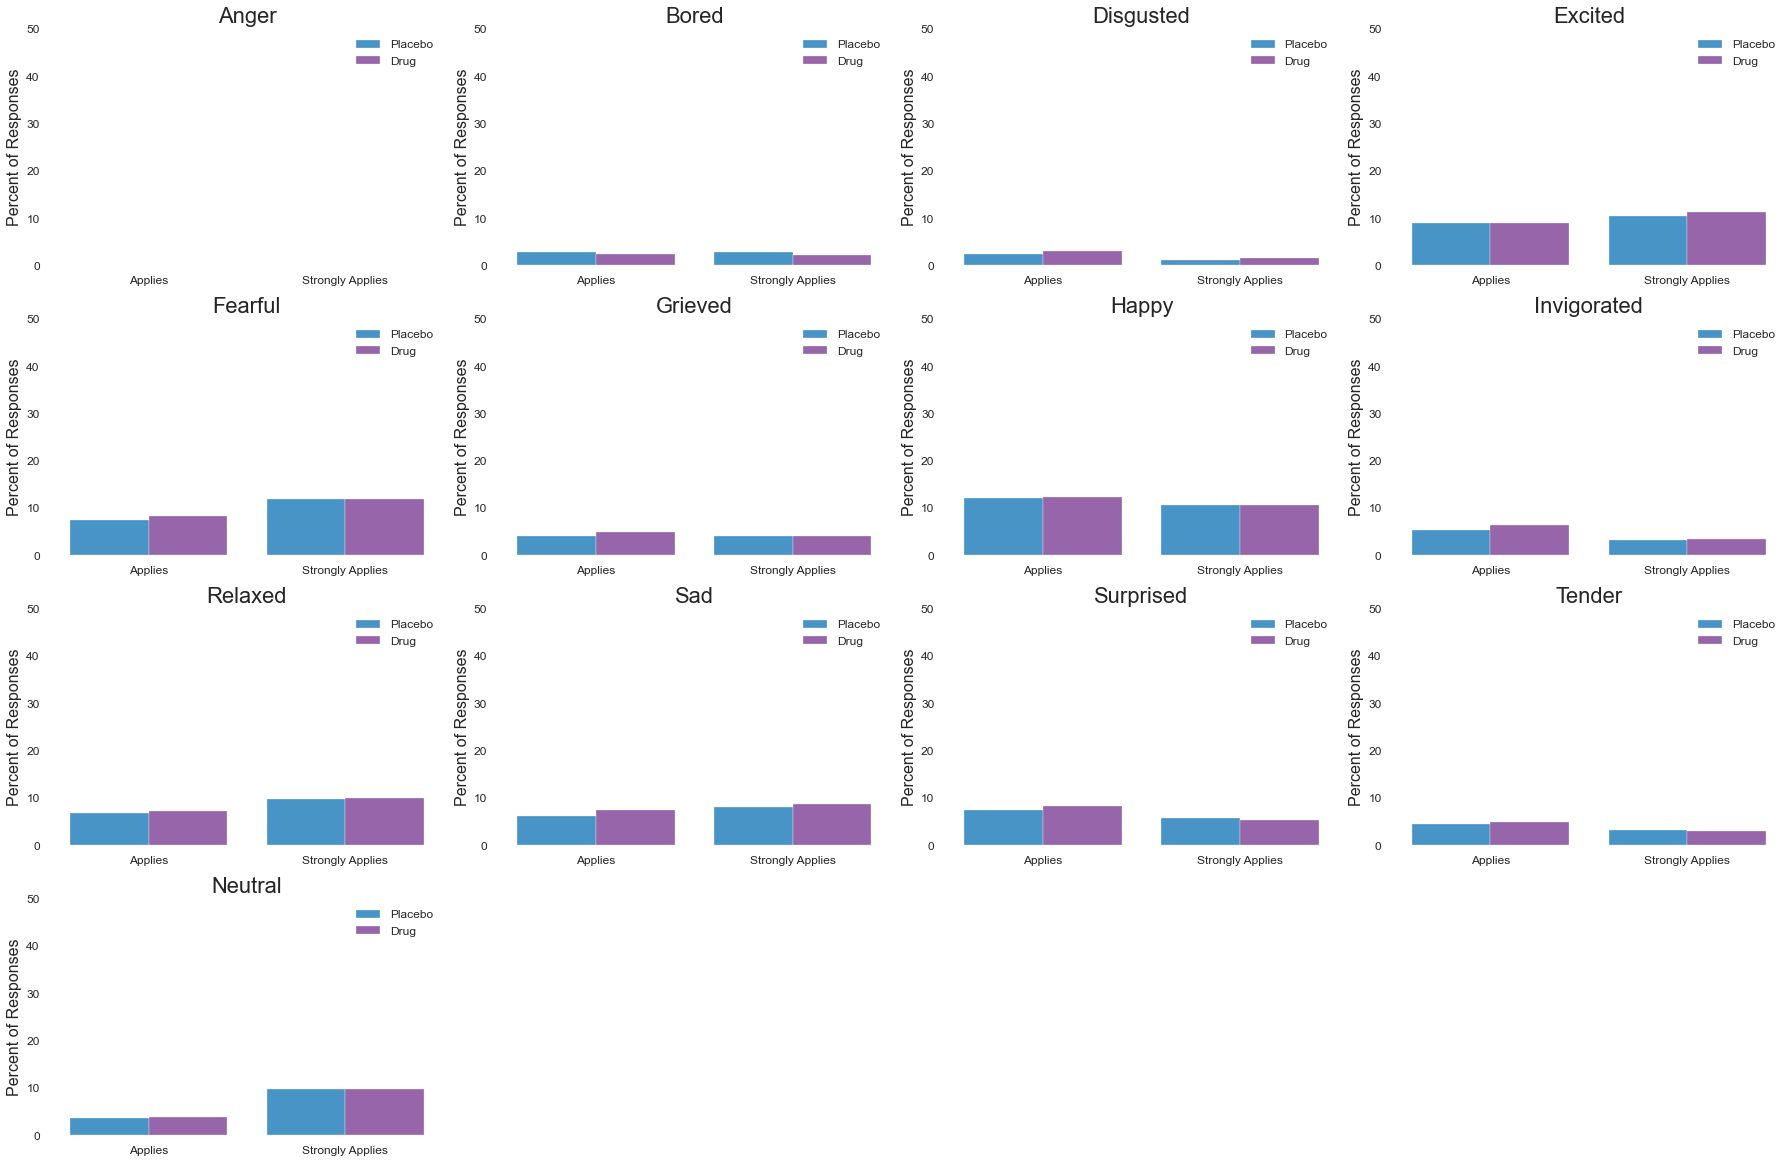

In [227]:
colors = ["#3498db", "#9b59b6"]

plt.figure(figsize=(25,20))
for i, emotion in enumerate(list(perceivedLong['Emotion'].unique())):
    plt.subplot(5, 4, i+1)
    sns.barplot(x="variable", y="value", hue="DrugPlacebo", data=perceivedLong[perceivedLong['Emotion'] == emotion], palette=colors)
    plt.title(emotion, size = 22)
    plt.xlabel('')
    plt.ylabel('Percent of Responses', fontsize=16)
    plt.tight_layout()
    plt.ylim(0, 50)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(loc = 1, prop={'size': 12})
plt.show()

#### **Conclusions**:
* There doesn't seem to be much of a difference between the placebo and drug conditions. 
* I will not follow up with statistical tests.

### Induced Emotion
#### *Dataframe creation*

In [228]:
cols = list(induced.loc[:, 'Anger':'Neutral'].columns)

placebo = induced[induced['DrugPlacebo']=="Placebo"]
drug = induced[induced['DrugPlacebo']=="Drug"]

#### *Means*

In [230]:
meansI = pd.DataFrame()
meansI['Drug'] = drug[cols].mean().round(2)
meansI['Placebo'] = placebo[cols].mean().round(2)
meansI.T

Anger  Anxious  Bored  Disgusted  Excited  Fearful  Grieved  Happy  \
Drug       0.0     0.37   0.06       0.05     0.25     0.27     0.10   0.26   
Placebo    0.0     0.30   0.06       0.06     0.24     0.27     0.08   0.25   

         Invigorated  Joyful  ...  Relaxed   Sad  Softhearted  Surprised  \
Drug             0.1    0.24  ...     0.20  0.20         0.11       0.08   
Placebo          0.1    0.23  ...     0.17  0.17         0.10       0.06   

         Sympathetic  Tender  Transcendent  Tension  Wonder  Neutral  
Drug            0.09    0.07          0.04     0.25    0.15     0.19  
Placebo         0.10    0.08          0.04     0.24    0.12     0.18  

[2 rows x 23 columns]

#### *Percents*

In [231]:
cols = list(induced.loc[:, 'Anger':'Neutral'].columns)

percentAppliesI = pd.DataFrame()
for column in cols:
    percentAppliesI.loc[column, 'Drug'] = 100 - (len(drug[column].loc[drug[column] == 0])/len(drug)*100)
    percentAppliesI.loc[column, 'Placebo'] = 100 - (len(placebo[column].loc[placebo[column] == 0])/len(placebo)*100)
percentAppliesI.T

Anger    Anxious     Bored  Disgusted    Excited    Fearful  \
Drug       0.0  24.453552  3.825137   4.326047  17.167577  17.896175   
Placebo    0.0  20.168067  4.435107   4.154995  16.246499  18.300654   

          Grieved      Happy  Invigorated     Joyful  ...    Relaxed  \
Drug     7.331512  19.171220     7.786885  16.985428  ...  14.162113   
Placebo  6.255836  18.347339     6.956116  16.059757  ...  11.811391   

               Sad  Softhearted  Surprised  Sympathetic    Tender  \
Drug     13.433515     8.788707   6.375228     7.012750  5.828780   
Placebo  11.998133     7.889823   4.948646     7.002801  5.929038   

         Transcendent    Tension     Wonder    Neutral  
Drug         3.051002  17.850638  11.794171  11.520947  
Placebo      2.941176  16.293184   9.103641  11.204482  

[2 rows x 23 columns]

#### *Summary Table*

In [229]:
# make placebo summary table
placeboSummary = pd.DataFrame()
placeboSummary['Sum'] = placebo[cols].sum()
placeboSummary['Mean'] = placebo[cols].mean()
placeboSummary['SD'] = placebo[cols].std()

for column in cols:
    placeboSummary.loc[column, 'Does Not Apply'] = len(placebo[column].loc[placebo[column] == 0])/len(placebo)*100
    placeboSummary.loc[column, 'Applies'] = len(placebo[column].loc[placebo[column] == 1])/len(placebo)*100
    placeboSummary.loc[column, 'Strongly Applies'] = len(placebo[column].loc[placebo[column] == 2])/len(placebo)*100

placeboSummary['DrugPlacebo'] = "Placebo"
placeboSummary['Emotion'] = placeboSummary.index

# make drug summary table
drugSummary = pd.DataFrame()
drugSummary['Sum'] = drug[cols].sum()
drugSummary['Mean'] = drug[cols].mean()
drugSummary['SD'] = drug[cols].std()

for column in cols:
    drugSummary.loc[column, 'Does Not Apply'] = len(drug[column].loc[drug[column] == 0])/len(drug)*100
    drugSummary.loc[column, 'Applies'] = len(drug[column].loc[drug[column] == 1])/len(drug)*100
    drugSummary.loc[column, 'Strongly Applies'] = len(drug[column].loc[drug[column] == 2])/len(drug)*100

drugSummary['DrugPlacebo'] = "Drug"
drugSummary['Emotion'] = drugSummary.index

# rbind
inducedSummary = pd.concat([placeboSummary, drugSummary])
print("inducedSummary shape:", inducedSummary.shape)
print(drugSummary.shape[0] + placeboSummary.shape[0])

#  transform to long format
inducedLong = pd.melt(inducedSummary, id_vars=['Emotion', 'DrugPlacebo', 'Mean', 'SD'], 
                      value_vars=['Applies', 'Strongly Applies'])

inducedLong.sample(5)

inducedSummary shape: (46, 8)
46


Emotion DrugPlacebo      Mean        SD          variable     value
77  Invigorated        Drug  0.099271  0.363706  Strongly Applies  2.140255
40  Sympathetic        Drug  0.094718  0.367407           Applies  4.553734
38  Softhearted        Drug  0.114754  0.394196           Applies  6.102004
27      Excited        Drug  0.246357  0.578948           Applies  9.699454
20      Tension     Placebo  0.236228  0.571987           Applies  8.963585

#### *Plot*

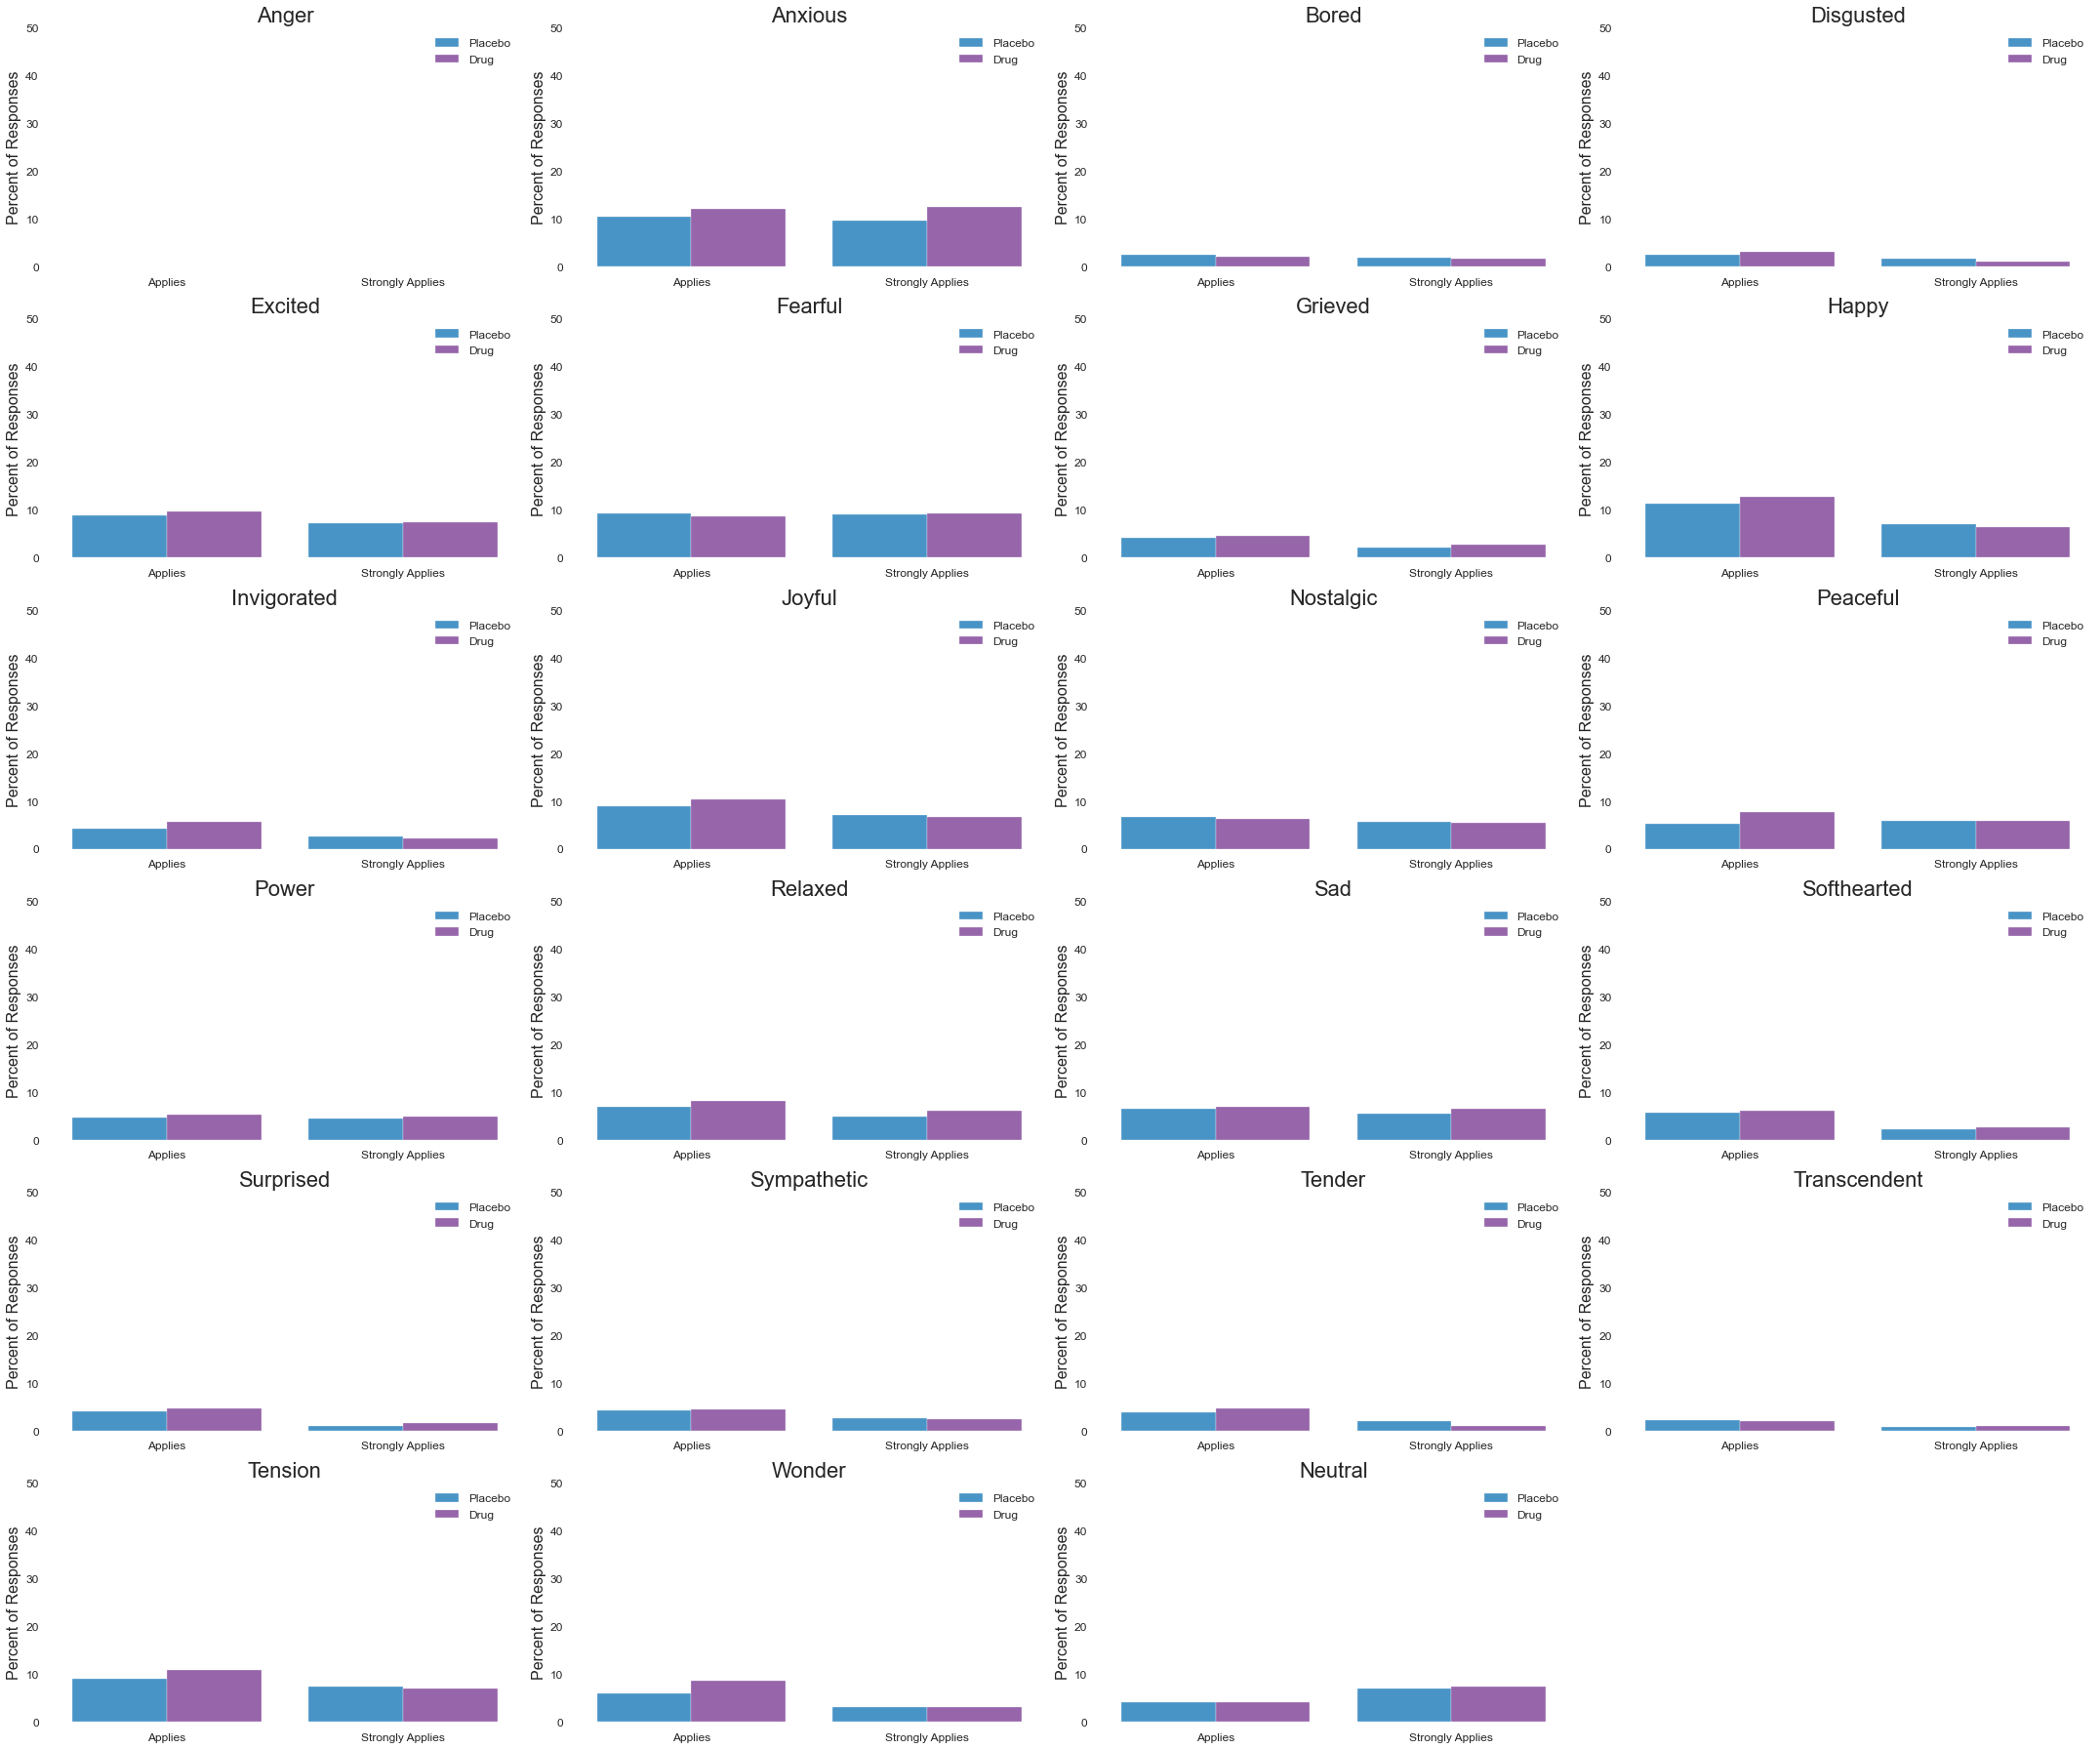

In [232]:
colors = ["#3498db", "#9b59b6"]

plt.figure(figsize=(30,25))
for i, emotion in enumerate(list(inducedLong['Emotion'].unique())):
    plt.subplot(6, 4, i+1)
    sns.barplot(x="variable", y="value", hue="DrugPlacebo", data=inducedLong[inducedLong['Emotion'] == emotion], palette=colors)
    plt.title(emotion, size = 22)
    plt.xlabel('')
    plt.ylabel('Percent of Responses', fontsize=16)
    plt.tight_layout()
    plt.ylim(0, 50)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(loc = 1, prop={'size': 12})
plt.show()

#### **Conclusions**:
* There doesn't seem to be much of a difference between the placebo and drug conditions. 
* I will not follow up with statistical tests.

# **4. Post-Hoc Tests**

In [ ]:
# look at induced emotion ratings (and specific emotions) for:
    # different IRI scores 
    # music preferences 
    # PANAS
    # Big5
    # AIMS
    # NeedToBelong
    # Nostalgia